# Create Plots

## 0. Import necessary packages

In [ ]:
import matsim
import os 
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from collections import defaultdict
import plotly
import kaleido
%matplotlib inline
import xml.etree.ElementTree as ET
import gzip

## 1. Runtime

In [283]:
# Runtime 
rt = pd.DataFrame(pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/runtimes_1_to_100pct_correct.csv"))

In [284]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

rt_case1 = []
rt_case2 = []
rt_case3 = []
rt_case4 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                rt_case2.append(np.mean(rt[(rt["sample_size"]== sample_size_string) & (rt["alpha"]==1.0) & (rt["stuck_time"]==sT_default) & (rt["global_seed"]=="default")]["runtime"]))
                # case 4
                rt_case4.append(np.mean(rt[(rt["sample_size"]== sample_size_string) & (rt["alpha"]==1.0) & (rt["stuck_time"]==sT_adjusted) & (rt["global_seed"]=="default")]["runtime"]))
            else:
                #case 2
                rt_case2.append(np.mean(rt[(rt["sample_size"]== sample_size_string) & (rt["alpha"]==float(alpha)) & (rt["stuck_time"]==sT_default) & (rt["global_seed"]=="default")]["runtime"]))
                # case 4
                rt_case4.append(np.mean(rt[(rt["sample_size"]== sample_size_string) & (rt["alpha"]==float(alpha)) & (rt["stuck_time"]==sT_adjusted) & (rt["global_seed"]=="default")]["runtime"]))
        else:
            rt_case1.append(np.mean(rt[(rt["sample_size"]==sample_size_string) & (rt["alpha"]==float(alpha)) & (rt["stuck_time"]==sT_default) & (rt["global_seed"]=="default")]["runtime"]))
            rt_case3.append(np.mean(rt[(rt["sample_size"]==sample_size_string) & (rt["alpha"]==float(alpha)) & (rt["stuck_time"]==sT_adjusted) & (rt["global_seed"]=="default")]["runtime"]))

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
rt_case5 = []
for sampleSize in sample_sizes_rGS:
    rt_case5.append(np.mean(rt[(rt["sample_size"]==sampleSize) & (rt["alpha"]==1) & (rt["stuck_time"]==30.0) & (rt['global_seed'].str.contains("rnd"))]['runtime']))

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
rt_case6 = []
for sampleSize in sample_sizes_dq:
    rt_case6.append(np.mean(rt[(rt["sample_size"]==sampleSize)]['runtime']))

In [285]:
# calculate length of upper whisker
rt1pct_max = np.max(rt[(rt["sample_size"]=="1-pct") & (rt["alpha"]==1) & (rt["stuck_time"]==30.0) & (rt["global_seed"]=="default")]["runtime"]) - rt_case1[0]

# calculate length of lower whisker
rt1pct_min =  rt_case1[0] - np.min(rt[(rt["sample_size"]=="1-pct") & (rt["alpha"]==1) & (rt["stuck_time"]==30.0) & (rt["global_seed"]=="default")]["runtime"])

print("average 1 pct runtime is ",rt_case1[0])
print("longest 1 pct run takes ", rt_case1[0] + rt1pct_max , " hours")
print("shortest 1 pct run takes ",rt_case1[0] - rt1pct_min, " hours")

average 1 pct runtime is  3.5106944444444443
longest 1 pct run takes  4.083611111111111  hours
shortest 1 pct run takes  3.033333333333333  hours


In [286]:
rt5pct_max = np.max(rt[(rt["sample_size"]=="5-pct") & (rt["alpha"]==1) & (rt["stuck_time"]==30.0) & (rt["global_seed"]=="default")]["runtime"]) - rt_case1[1]
rt5pct_min = rt_case1[1] - np.min(rt[(rt["sample_size"]=="5-pct") & (rt["alpha"]==1) & (rt["stuck_time"]==30.0) & (rt["global_seed"]=="default")]["runtime"])

print("average 5 pct runtime is ", rt_case1[1])
print("longest 5 pct run takes ",  rt_case1[1] + rt5pct_max , " hours")
print("shortest 5 pct run takes ", rt_case1[1] - rt5pct_min, " hours")

average 5 pct runtime is  6.523833333333333
longest 5 pct run takes  7.933611111111111  hours
shortest 5 pct run takes  5.783611111111111  hours


In [287]:
rt10pct_max = np.max(rt[(rt["sample_size"]=="10-pct") & (rt["alpha"]==1.00) & (rt["stuck_time"]==30.0) & (rt["global_seed"]=="default")]["runtime"]) - rt_case1[2]
rt10pct_min = rt_case1[2] - np.min(rt[(rt["sample_size"]=="10-pct") & (rt["alpha"]==1.00) & (rt["stuck_time"]==30.0) & (rt["global_seed"]=="default")]["runtime"])
print("average 10 pct runtime is ", rt_case1[2])
print("longest 10 pct run takes ",  rt_case1[2] + rt10pct_max , " hours")
print("shortest 10 pct run takes ", rt_case1[2] - rt10pct_min, " hours")


average 10 pct runtime is  11.286944444444444
longest 10 pct run takes  13.733611111111111  hours
shortest 10 pct run takes  9.633611111111112  hours


In [288]:
rt_case_1_4 = pd.DataFrame({'case_1': rt_case1, 'case_2': rt_case2, 'case_3': rt_case3, 'case_4': rt_case4})
rt_case_1_4 = rt_case_1_4.round(2)
rt_case_5_6 = pd.DataFrame({'case_5': rt_case5, 'case_6': rt_case6})
rt_case_5_6 = rt_case_5_6.round(2)

##### Plot

/tmp/ipykernel_12529/274633934.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  axs.errorbar([1,5,10], rt_case_1_4['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )


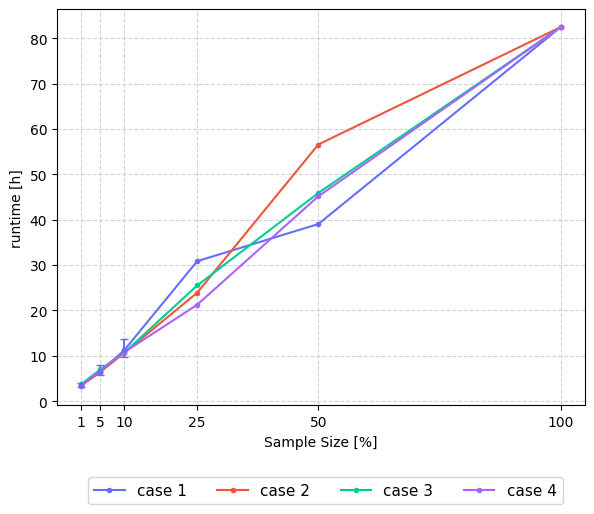

In [289]:
lower_error =  [rt1pct_min, rt5pct_min, rt10pct_min]
upper_error =  [rt1pct_max, rt5pct_max, rt10pct_max]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

x = [1, 5, 10, 25, 50, 100]

fig, axs = plt.subplots(1, 1, sharey = True)
axs.plot(x, rt_case_1_4['case_1'], '.-',  color = "#636EFA", label = "case 1" )
axs.errorbar([1,5,10], rt_case_1_4['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )

axs.plot(x, rt_case_1_4['case_2'], '.-', color = "#EF553B",  label = "case 2")
axs.plot(x, rt_case_1_4['case_3'], '.-',  color = "#00CC96", label = "case 3")
axs.plot(x ,rt_case_1_4['case_4'], '.-',  color = "#AB63FA",  label = "case 4")
#axs.plot([50,100] ,rt_case_5_6['case_6'], '.-',  color = "#FFA15A",  label = "case 6")


fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("runtime [h]")
plt.xlabel("Sample Size [%]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/runtime_pyplot_case_14_6.pdf', format = "pdf",bbox_inches='tight')

fig_p_rt_1_100 = go.Figure()
fig_p_rt_1_100.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=rt_case_1_4['case_1'],
                        error_y=dict(
                    type='data', 
                     symmetric=False,
                    array=[rt1pct_max, rt5pct_max,rt10pct_max],
                    arrayminus=[rt1pct_min, rt5pct_min,rt10pct_min],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0')
)
fig_p_rt_1_100.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=rt_case_1_4['case_2'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))
fig_p_rt_1_100.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=rt_case_1_4['case_3'],
                    mode='lines+markers',
                    name='alpha = 1.0, sT adjusted'))
fig_p_rt_1_100.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=rt_case_1_4['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig_p_rt_1_100.add_trace(go.Scatter(x=[50, 100], y=rt_case_5_6['case_6'],
                    mode='lines+markers',
                    name='alpha = 1.0, agents cloned'))

fig_p_rt_1_100.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50 ,100]),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='runtime [h]')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    legend=dict(
    yanchor="top",
    y=0.5,
    xanchor="left",
    x=0.79
    ),
    font = dict(size = 16))

fig_p_rt_1_100.show()

plotly.io.write_image(fig_p_rt_1_100, "/home/lola/Nextcloud/Masterarbeit/04a_Images/runtime_1_100_with_min_max_errorbar.pdf", width= 1248.0 , engine = "kaleido")

##### Table

In [115]:
first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
rt_values_as_table = pd.DataFrame({'sample_size': first_column, 'case_1': rt_case1, 'case_2': rt_case2, 'case_3': rt_case3,
                                    'case_4': rt_case4, 'case_5': [rt_case5[0].round(2),rt_case5[1].round(2), "0", "0", "0", "0"]})

In [116]:
rt_values_as_table_rounded = np.round(rt_values_as_table, decimals=2)
rt_values_as_table_rounded.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/runtime_plot.csv", sep = ";", index = False)

##### Boxplot

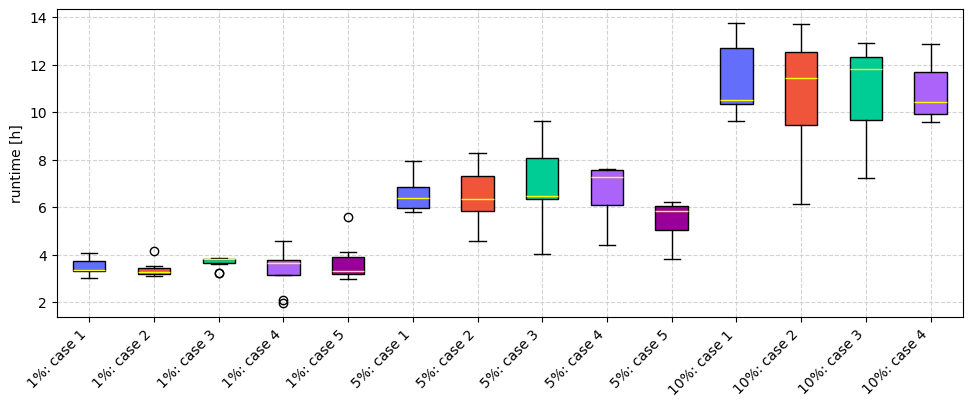

In [114]:
# Generates grouped data
rt_bp_1pct = [rt[(rt['sample_size']=="1-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'],
              rt[(rt['sample_size']=="1-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'],
              rt[(rt['sample_size']=="1-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 3000.0) & (rt['global_seed']== "default") ]['runtime'],
              rt[(rt['sample_size']=="1-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 3000.0) & (rt['global_seed']== "default") ]['runtime'],
              rt[(rt['sample_size']=="1-pct") & (rt['global_seed'].str.contains('rnd')) ]['runtime']]
      
rt_bp_5pct = [rt[(rt['sample_size']=="5-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'],
             rt[(rt['sample_size']=="5-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'],
             rt[(rt['sample_size']=="5-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 600.0) & (rt['global_seed']== "default") ]['runtime'],
              rt[(rt['sample_size']=="5-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 600.0) & (rt['global_seed']== "default") ]['runtime'],
              rt[(rt['sample_size']=="5-pct") & (rt['global_seed'].str.contains('rnd')) ]['runtime']]

rt_bp_10pct = [rt[(rt['sample_size']=="10-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'],
             rt[(rt['sample_size']=="10-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'],
             rt[(rt['sample_size']=="10-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 300.0) & (rt['global_seed']== "default") ]['runtime'],
             rt[(rt['sample_size']=="10-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 300.0) & (rt['global_seed']== "default") ]['runtime']]

# Combines two data groups into a dataset
data = rt_bp_1pct + rt_bp_5pct + rt_bp_10pct 
 
colors = ["#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA"]
labels=["1%: case 1", "1%: case 2","1%: case 3", "1%: case 4","1%: case 5",
                                "5%: case 1", "5%: case 2","5%: case 3", "5%: case 4","5%: case 5",
                                 "10%: case 1", "10%: case 2","10%: case 3", "10%: case 4" ]
fig, ax = plt.subplots()
ax.set_ylabel('runtime [h]')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/runtime_pyplot_1_10_pct.pdf', format = "pdf",bbox_inches='tight')

In [ ]:
# Creates grouped boxplots
#labels=['G1-D1', 'G1-D2', 'G1-D3', 'G2-D1', 'G2-D2', 'G2-D3']
plt.boxplot(data, positions=[1, 2, 3,4,5, 7, 8, 9, 10, 11, 13, 14, 15, 16])

plt.figure()
plt.title('Grouped Boxplots')
plt.xlabel('Group-Dataset')
plt.ylabel('Value')
plt.show()

fig_b_rt_1_10 = go.Figure()

fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="1-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="1-pct, alpha = 1.0", marker_color="#3366CC"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="1-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="1-pct, alpha = 0.75", marker_color="#DC3912"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="1-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 3000.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="1-pct, sT adjusted", marker_color="#FF9900"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="1-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 3000.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="1-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="1-pct") & (rt['global_seed'].str.contains('rnd')) ]['runtime'], quartilemethod="linear", name="1-pct, random gS", marker_color="#990099"))

fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="5-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="5-pct, alpha = 1.0", marker_color="#3366CC"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="5-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="5-pct, alpha = 0.75",  marker_color="#DC3912"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="5-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 600.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="5-pct, sT adjusted", marker_color="#FF9900"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="5-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 600.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="5-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="5-pct") & (rt['global_seed'].str.contains('rnd')) ]['runtime'], quartilemethod="linear", name="5-pct, random gS",marker_color="#990099"))

fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="10-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="10-pct, alpha = 1.0", marker_color="#3366CC"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="10-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 30.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="10-pct, alpha = 0.75",  marker_color="#DC3912"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="10-pct") & (rt['alpha']== 1)  & (rt['stuck_time']== 300.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="10-pct, sT adjusted", marker_color="#FF9900"))
fig_b_rt_1_10.add_trace(go.Box( y= rt[(rt['sample_size']=="10-pct") & (rt['alpha']== 0.75)  & (rt['stuck_time']== 300.0) & (rt['global_seed']== "default") ]['runtime'], quartilemethod="linear", name="10-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig_b_rt_1_10.update_traces(boxpoints='all', jitter=0)
fig_b_rt_1_10.update_layout(
    xaxis=dict(title=dict(text='Sample-Size')),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        zeroline=True,
        #dtick=1,
        gridcolor='rgb(255, 255, 255)',
        #gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        #zerolinewidth=2,
        title=dict(text='runtime')),
        font = dict(size = 14),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    hovermode="x",
    showlegend = False
)
fig_b_rt_1_10.show()

plotly.io.write_image(fig_b_rt_1_10, "/home/lola/Nextcloud/Masterarbeit/04a_Images/runtime_bp_1_10.pdf", width= 1248.0 , engine = "kaleido")

## 2. Average of average executed score

### Before Simulation

In [162]:
score_before_sim = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/exp_scores__1_100pct_samples_before_simulation.csv")

In [163]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

sc_case1_before_sim = []
sc_case2_before_sim = []
sc_case3_before_sim = []
sc_case4_before_sim = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                sc_case2_before_sim.append(np.mean(score_before_sim[(score_before_sim["sample_size"]== sample_size_string) & (score_before_sim["alpha"]==1.0) & (score_before_sim["stuck_time"]==sT_default) & (score_before_sim["global_seed"]=="default")]["avg_executed_before_sim"]))
                # case 4
                sc_case4_before_sim.append(np.mean(score_before_sim[(score_before_sim["sample_size"]== sample_size_string) & (score_before_sim["alpha"]==1.0) & (score_before_sim["stuck_time"]==sT_adjusted) & (score_before_sim["global_seed"]=="default")]["avg_executed_before_sim"]))
            else:
                #case 2
                sc_case2_before_sim.append(np.mean(score_before_sim[(score_before_sim["sample_size"]== sample_size_string) & (score_before_sim["alpha"]==float(alpha)) & (score_before_sim["stuck_time"]==sT_default) & (score_before_sim["global_seed"]=="default")]["avg_executed_before_sim"]))
                # case 4
                sc_case4_before_sim.append(np.mean(score_before_sim[(score_before_sim["sample_size"]== sample_size_string) & (score_before_sim["alpha"]==float(alpha)) & (score_before_sim["stuck_time"]==sT_adjusted) & (score_before_sim["global_seed"]=="default")]["avg_executed_before_sim"]))
        else:
            sc_case1_before_sim.append(np.mean(score_before_sim[(score_before_sim["sample_size"]==sample_size_string) & (score_before_sim["alpha"]==float(alpha)) & (score_before_sim["stuck_time"]==sT_default) & (score_before_sim["global_seed"]=="default")]["avg_executed_before_sim"]))
            sc_case3_before_sim.append(np.mean(score_before_sim[(score_before_sim["sample_size"]==sample_size_string) & (score_before_sim["alpha"]==float(alpha)) & (score_before_sim["stuck_time"]==sT_adjusted) & (score_before_sim["global_seed"]=="default")]["avg_executed_before_sim"]))

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
sc_case5_before_sim = []
for sampleSize in sample_sizes_rGS:
    sc_case5_before_sim.append(np.mean(score_before_sim[(score_before_sim["sample_size"]==sampleSize) & (score_before_sim["alpha"]==1) & (score_before_sim["stuck_time"]==30.0) & (score_before_sim['global_seed'].str.contains("rnd"))]["avg_executed_before_sim"]))

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
sc_case6_before_sim = []
for sampleSize in sample_sizes_dq:
    sc_case6_before_sim.append(np.mean(score_before_sim[(score_before_sim["sample_size"]==sampleSize)]["avg_executed_before_sim"]))

In [164]:
sc_1pct_before_sim_max = np.max(score_before_sim[((score_before_sim["sample_size"] == "1-pct") & (score_before_sim["alpha"] == 1) & (score_before_sim["stuck_time"] == 30.0) & (score_before_sim["global_seed"]=="default"))]["avg_executed_before_sim"]) - sc_case1_before_sim[0]
sc_1pct_before_sim_min = sc_case1_before_sim[0] -  np.min(score_before_sim[((score_before_sim["sample_size"] == "1-pct") & (score_before_sim["alpha"] == 1) & (score_before_sim["stuck_time"] == 30.0) & (score_before_sim["global_seed"]=="default"))]["avg_executed_before_sim"])


In [165]:
sc_5pct_before_sim_max = np.max(score_before_sim[((score_before_sim["sample_size"] == "5-pct") & (score_before_sim["alpha"] == 1) & (score_before_sim["stuck_time"] == 30.0) & (score_before_sim["global_seed"]=="default"))]["avg_executed_before_sim"]) - sc_case1_before_sim[1]
sc_5pct_before_sim_min = sc_case1_before_sim[1] -  np.min(score_before_sim[((score_before_sim["sample_size"] == "5-pct") & (score_before_sim["alpha"] == 1) & (score_before_sim["stuck_time"] == 30.0) & (score_before_sim["global_seed"]=="default"))]["avg_executed_before_sim"])


In [166]:
sc_10pct_before_sim_max = np.max(score_before_sim[((score_before_sim["sample_size"] == "10-pct") & (score_before_sim["alpha"] == 1) & (score_before_sim["stuck_time"] == 30.0) & (score_before_sim["global_seed"]=="default"))]["avg_executed_before_sim"]) - sc_case1_before_sim[1]
sc_10pct_before_sim_min = sc_case1_before_sim[1] -  np.min(score_before_sim[((score_before_sim["sample_size"] == "10-pct") & (score_before_sim["alpha"] == 1) & (score_before_sim["stuck_time"] == 30.0) & (score_before_sim["global_seed"]=="default"))]["avg_executed_before_sim"])


In [167]:
sc_case_1_4_before_sim = pd.DataFrame({'case_1': sc_case1_before_sim, 'case_2': sc_case2_before_sim, 'case_3': sc_case3_before_sim, 'case_4': sc_case4_before_sim})
sc_case_1_4_before_sim = sc_case_1_4_before_sim.round(2)
sc_case_5_6_before_sim = pd.DataFrame({'case_5': sc_case5_before_sim, 'case_6': sc_case6_before_sim})
sc_case_5_6_before_sim = sc_case_5_6_before_sim.round(2)

/tmp/ipykernel_12529/23068635.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  axs.errorbar([1,5,10], sc_case_1_4_before_sim['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )


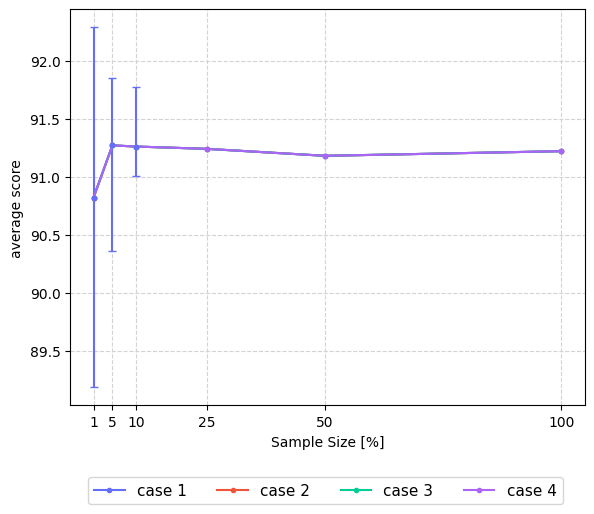

In [169]:
lower_error =  [sc_1pct_before_sim_min, sc_5pct_before_sim_min, sc_10pct_before_sim_min]
upper_error =  [sc_1pct_before_sim_max, sc_5pct_before_sim_max, sc_10pct_before_sim_max]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

x = [1, 5, 10, 25, 50, 100]

fig, axs = plt.subplots(1, 1, sharey = True)
axs.plot(x, sc_case_1_4_before_sim['case_1'], '.-',  color = "#636EFA", label = "case 1" )
axs.errorbar([1,5,10], sc_case_1_4_before_sim['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )

axs.plot(x, sc_case_1_4_before_sim['case_2'], '.-', color = "#EF553B",  label = "case 2")
axs.plot(x, sc_case_1_4_before_sim['case_3'], '.-',  color = "#00CC96", label = "case 3")
axs.plot(x ,sc_case_1_4_before_sim['case_4'], '.-',  color = "#AB63FA",  label = "case 4")



fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average score")
plt.xlabel("Sample Size [%]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/scores_before_sim_1_100_with_min_max_errorbar_pyplot.pdf', format = "pdf",bbox_inches='tight')

fig_score_before_sim = go.Figure()
fig_score_before_sim.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y=sc_case_1_4_before_sim['case_1'],
                        error_y=dict( type='data', # value of error bar given in data coordinates
                        symmetric=False,
                    array=[sc_1pct_before_sim_max, sc_5pct_before_sim_max,sc_10pct_before_sim_max, 0 , 0, 0],
                    arrayminus=[sc_1pct_before_sim_min, sc_5pct_before_sim_min,sc_10pct_before_sim_min, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='sampled plans', 
                    )
                    )

fig_score_before_sim.add_trace(go.Scatter(x=[ 50, 100], y=sc_case_5_6_before_sim['case_6'],
                    mode='lines+markers',
                    name='agents cloned'))

fig_score_before_sim.update_layout(
    xaxis=dict(
        autorange= True,
        #range = [0,100],
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average score')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1)
    )

fig_score_before_sim.show()

plotly.io.write_image(fig_score_before_sim, "/home/lola/Nextcloud/Masterarbeit/04a_Images/scores_before_sim_1_100_with_min_max_errorbar.pdf", width= 1296.0, engine = "kaleido")

### Iteration 0 

In [147]:
sc0 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/exp_scores_all_1_100pct_samples_it0.csv")

In [148]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

sc_case1_it0 = []
sc_case2_it0 = []
sc_case3_it0 = []
sc_case4_it0 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                sc_case2_it0.append(np.mean(sc0[(sc0["sample_size"]== sample_size_string) & (sc0["alpha"]==1.0) & (sc0["stuck_time"]==sT_default) & (sc0["global_seed"]=="default")]["avg_executed_it_0"]))
                # case 4
                sc_case4_it0.append(np.mean(sc0[(sc0["sample_size"]== sample_size_string) & (sc0["alpha"]==1.0) & (sc0["stuck_time"]==sT_adjusted) & (sc0["global_seed"]=="default")]["avg_executed_it_0"]))
            else:
                #case 2
                sc_case2_it0.append(np.mean(sc0[(sc0["sample_size"]== sample_size_string) & (sc0["alpha"]==float(alpha)) & (sc0["stuck_time"]==sT_default) & (sc0["global_seed"]=="default")]["avg_executed_it_0"]))
                # case 4
                sc_case4_it0.append(np.mean(sc0[(sc0["sample_size"]== sample_size_string) & (sc0["alpha"]==float(alpha)) & (sc0["stuck_time"]==sT_adjusted) & (sc0["global_seed"]=="default")]["avg_executed_it_0"]))
        else:
            sc_case1_it0.append(np.mean(sc0[(sc0["sample_size"]==sample_size_string) & (sc0["alpha"]==float(alpha)) & (sc0["stuck_time"]==sT_default) & (sc0["global_seed"]=="default")]["avg_executed_it_0"]))
            sc_case3_it0.append(np.mean(sc0[(sc0["sample_size"]==sample_size_string) & (sc0["alpha"]==float(alpha)) & (sc0["stuck_time"]==sT_adjusted) & (sc0["global_seed"]=="default")]["avg_executed_it_0"]))

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
sc_case5_it0 = []
for sampleSize in sample_sizes_rGS:
    sc_case5_it0.append(np.mean(sc0[(sc0["sample_size"]==sampleSize) & (sc0["alpha"]==1) & (sc0["stuck_time"]==30.0) & (sc0['global_seed'].str.contains("rnd"))]["avg_executed_it_0"]))

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
sc_case6_it0 = []
for sampleSize in sample_sizes_dq:
    sc_case6_it0.append(np.mean(sc0[(sc0["sample_size"]==sampleSize)]["avg_executed_it_0"]))

In [149]:
# calculate values for whiskers
sc_1pct_max = np.max(sc0[((sc0["sample_size"] == "1-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]) - sc_case1_it0[0]
sc_1pct_min = sc_case1_it0[0] -  np.min(sc0[((sc0["sample_size"] == "1-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"])


sc_5pct_max = np.max(sc0[((sc0["sample_size"] == "5-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]) - sc_case1_it0[1]
sc_5pct_min = sc_case1_it0[1] -  np.min(sc0[((sc0["sample_size"] == "5-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"])

sc_10pct_max = np.max(sc0[((sc0["sample_size"] == "10-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]) - sc_case1_it0[2]
sc_10pct_min = sc_case1_it0[2] - np.min(sc0[((sc0["sample_size"] == "10-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"])

In [151]:
sc_case_1_4_it0 = pd.DataFrame({'case_1': sc_case1_it0, 'case_2': sc_case2_it0, 'case_3': sc_case3_it0, 'case_4': sc_case4_it0})
sc_case_1_4_it0 = sc_case_1_4_it0.round(2)
sc_case_5_6_it0 = pd.DataFrame({'case_5': sc_case5_it0})
sc_case_5_6_it0 = sc_case_5_6_it0.round(2)


#### Plot

/tmp/ipykernel_12529/2639488130.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  axs.errorbar([1,5,10], sc_case_1_4_it0['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )


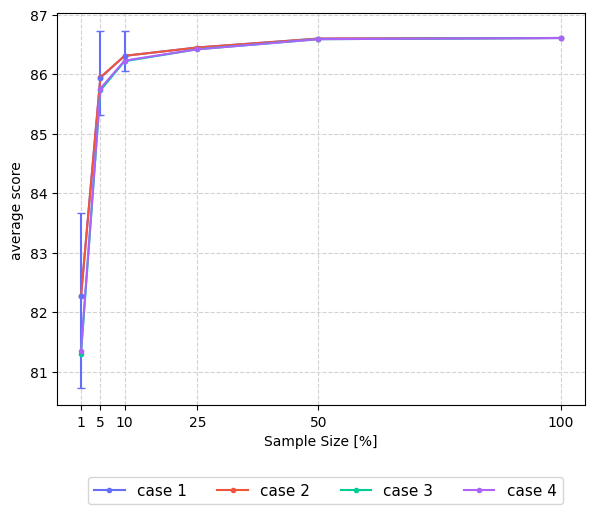

In [153]:
lower_error =  [sc_1pct_min, sc_5pct_min, sc_10pct_min]
upper_error =  [sc_1pct_max, sc_5pct_max, sc_10pct_max]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

x = [1, 5, 10, 25, 50, 100]

fig, axs = plt.subplots(1, 1, sharey = True)
axs.plot(x, sc_case_1_4_it0['case_1'], '.-',  color = "#636EFA", label = "case 1" )
axs.errorbar([1,5,10], sc_case_1_4_it0['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )

axs.plot(x, sc_case_1_4_it0['case_2'], '.-', color = "#EF553B",  label = "case 2")
axs.plot(x, sc_case_1_4_it0['case_3'], '.-',  color = "#00CC96", label = "case 3")
axs.plot(x ,sc_case_1_4_it0['case_4'], '.-',  color = "#AB63FA",  label = "case 4")
#axs.plot([50,100] ,sc_case_5_6_it0['case_6'], '.-',  color = "#FFA15A",  label = "case 6")


fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average score")
plt.xlabel("Sample Size [%]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_score_pyplot_it0_case_14_6.pdf', format = "pdf",bbox_inches='tight')

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y=sc_case_1_4_it0['case_1'],
                        error_y=dict( type='data', # value of error bar given in data coordinates
                        symmetric=False,
                    array=[sc_1pct_max, sc_5pct_max,sc_10pct_max, 0 , 0, 0],
                    arrayminus=[sc_1pct_min, sc_5pct_min,sc_10pct_min, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0'
                    )
                    )
fig2.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sc_case_1_4_it0['case_2'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))

fig2.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y=sc_case_1_4_it0['case_3'],
                    mode='lines+markers',
                    name='alpha = 1, sT adjusted', 
                    )
                    )
fig2.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sc_case_1_4_it0['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig2.add_trace(go.Scatter(x=[ 50, 100], y=sc_case_5_6_it0['case_6'],
                    mode='lines+markers',
                    name='alpha = 1.0, agents cloned'))

fig2.update_layout(
    xaxis=dict(
        autorange= True,
        #range = [0,100],
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average score')),
    legend=dict(
    yanchor="top",
    y=0.55,
    xanchor="left",
    x=0.8035
    ),
    font = dict(size = 18)
)
fig2.show()

plotly.io.write_image(fig2, "/home/lola/Nextcloud/Masterarbeit/04a_Images/exp_scores_it0_1_100_with_min_max_errorbar.pdf", width= 1296.0, engine = "kaleido")

#### Table

In [ ]:
first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
sc_it0_values_as_table = pd.DataFrame({'sample_size': first_column, 'case_1': sc_case_1_4_it0['case_1'], 'case_2': sc_case_1_4_it0['case_2'], 'case_3': sc_case_1_4_it0['case_3'],
                                    'case_4': sc_case_1_4_it0['case_4'], 'case_5': [sc_case_5_6_it0['case_5'][0],sc_case_5_6_it0['case_5'][1], "-", "-", "-", "-"], 'case_6': ["-", "-", "-", "-",sc_case_5_6_it0['case_6'][0] ,sc_case_5_6_it0['case_6'][1] ]})
sc_it0_values_as_table.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/sc_it0_plot_values_as_table.csv", sep = ";", index = False)

#### Boxplot

In [62]:
sc0 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/exp_scores_all_1_100pct_samples_it0.csv")

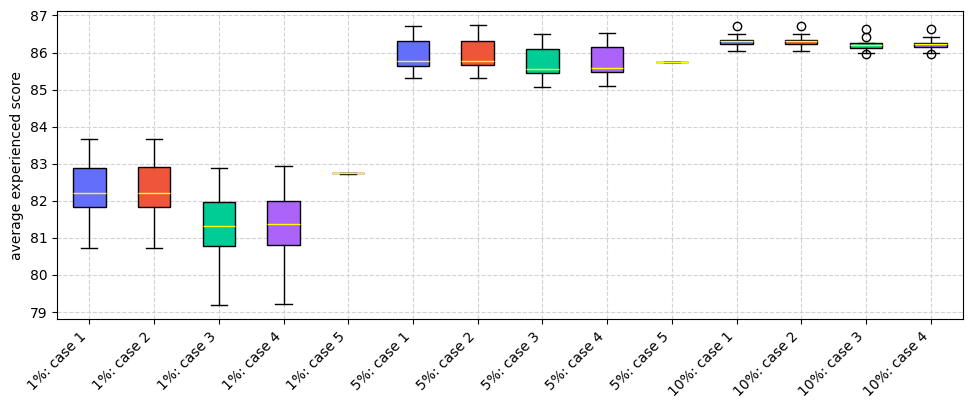

In [154]:
# Generates grouped aTtta
sc0_bp_1pct = [sc0[(sc0['sample_size']=="1-pct") & (sc0['alpha']== 1)  & (sc0['stuck_time']== 30.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
              sc0[(sc0['sample_size']=="1-pct") & (sc0['alpha']== 0.75)  & (sc0['stuck_time']== 30.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
              sc0[(sc0['sample_size']=="1-pct") & (sc0['alpha']== 1)  & (sc0['stuck_time']== 3000.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
              sc0[(sc0['sample_size']=="1-pct") & (sc0['alpha']== 0.75)  & (sc0['stuck_time']== 3000.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
              sc0[(sc0['sample_size']=="1-pct") & (sc0['global_seed'].str.contains('rnd')) ]['avg_executed_it_0']]
      
sc0_bp_5pct = [sc0[(sc0['sample_size']=="5-pct") & (sc0['alpha']== 1)  & (sc0['stuck_time']== 30.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
             sc0[(sc0['sample_size']=="5-pct") & (sc0['alpha']== 0.75)  & (sc0['stuck_time']== 30.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
             sc0[(sc0['sample_size']=="5-pct") & (sc0['alpha']== 1)  & (sc0['stuck_time']== 600.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
              sc0[(sc0['sample_size']=="5-pct") & (sc0['alpha']== 0.75)  & (sc0['stuck_time']== 600.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
              sc0[(sc0['sample_size']=="5-pct") & (sc0['global_seed'].str.contains('rnd')) ]['avg_executed_it_0']]

sc0_bp_10pct = [sc0[(sc0['sample_size']=="10-pct") & (sc0['alpha']== 1)  & (sc0['stuck_time']== 30.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
             sc0[(sc0['sample_size']=="10-pct") & (sc0['alpha']== 0.75)  & (sc0['stuck_time']== 30.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
             sc0[(sc0['sample_size']=="10-pct") & (sc0['alpha']== 1)  & (sc0['stuck_time']== 300.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0'],
             sc0[(sc0['sample_size']=="10-pct") & (sc0['alpha']== 0.75)  & (sc0['stuck_time']== 300.0) & (sc0['global_seed']== "default") ]['avg_executed_it_0']]

# Combines two data groups into a dataset
data = sc0_bp_1pct + sc0_bp_5pct + sc0_bp_10pct 
 
colors = ["#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA"]
labels=["1%: case 1", "1%: case 2","1%: case 3", "1%: case 4","1%: case 5",
                                "5%: case 1", "5%: case 2","5%: case 3", "5%: case 4","5%: case 5",
                                 "10%: case 1", "10%: case 2","10%: case 3", "10%: case 4" ]
fig, ax = plt.subplots()
ax.set_ylabel('average experienced score')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_exp_score_boxplot_pyplot_1_10_pct_it0.pdf', format = "pdf",bbox_inches='tight')


sc_1pct0 = sc0[((sc0["sample_size"] == "1-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]

sc_1pct_sCf0 =  sc0[((sc0["sample_size"] == "1-pct") & (sc0["alpha"] == 0.75) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]

sc_1pct_rGs0 = sc0[((sc0["sample_size"] == "1-pct") & (sc0["alpha"] == 1.0) & (sc0["stuck_time"] == 30.0) & (sc0['global_seed'].str.contains("rnd")))]["avg_executed_it_0"]

sc_1pct_sT0 = sc0[((sc0["sample_size"] == "1-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 600.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]

sc_1pct_sT_sCf0 = sc0[((sc0["sample_size"] == "1-pct") & (sc0["alpha"] == 0.75) & (sc0["stuck_time"] == 600.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]



sc_5pct0 = sc0[((sc0["sample_size"] == "5-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]

sc_5pct_sCf0 =  sc0[((sc0["sample_size"] == "5-pct") & (sc0["alpha"] == 0.75) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]

sc_5pct_rGs0 = sc0[((sc0["sample_size"] == "5-pct") & (sc0["alpha"] == 1.0) & (sc0["stuck_time"] == 30.0) & (sc0['global_seed'].str.contains("rnd")))]["avg_executed_it_0"]

sc_5pct_sT0 = sc0[((sc0["sample_size"] == "5-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 600.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]

sc_5pct_sT_sCf0 = sc0[((sc0["sample_size"] == "5-pct") & (sc0["alpha"] == 0.75) & (sc0["stuck_time"] == 600.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]


sc_10pct0 = sc0[((sc0["sample_size"] == "10-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]

sc_10pct_sCf0 =  sc0[((sc0["sample_size"] == "10-pct") & (sc0["alpha"] == 0.75) & (sc0["stuck_time"] == 30.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]

sc_10pct_sT0 = sc0[((sc0["sample_size"] == "10-pct") & (sc0["alpha"] == 1) & (sc0["stuck_time"] == 300.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]

sc_10pct_sT_sCf0 = sc0[((sc0["sample_size"] == "10-pct") & (sc0["alpha"] == 0.75) & (sc0["stuck_time"] == 300.0) & (sc0["global_seed"]=="default"))]["avg_executed_it_0"]


fig_sc_it0_bp_1_10 = go.Figure()


fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_1pct0, quartilemethod="linear", name="1-pct, alpha = 1.0", marker_color="#3366CC"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_1pct_sCf0, quartilemethod="linear", name="1-pct, alpha = 0.75", marker_color="#DC3912"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_1pct_sT0, quartilemethod="linear", name="1-pct, sT adjusted", marker_color="#FF9900"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_1pct_sT_sCf0, quartilemethod="linear", name="1-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_1pct_rGs0, quartilemethod="linear", name="1-pct, random gS", marker_color="#990099"))

fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_5pct0, quartilemethod="linear", name="5-pct, alpha = 1.0", marker_color="#3366CC"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_5pct_sCf0, quartilemethod="linear", name="5-pct, alpha = 0.75",  marker_color="#DC3912"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_5pct_sT0, quartilemethod="linear", name="5-pct, sT adjusted", marker_color="#FF9900"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_5pct_sT_sCf0, quartilemethod="linear", name="5-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_5pct_rGs0, quartilemethod="linear", name="5-pct, random gS",marker_color="#990099"))

fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_10pct0, quartilemethod="linear", name="10-pct, alpha = 1.0", marker_color="#3366CC"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_10pct_sCf0, quartilemethod="linear", name="10-pct, alpha = 0.75",  marker_color="#DC3912"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_10pct_sT0, quartilemethod="linear", name="10-pct, sT adjusted", marker_color="#FF9900"))
fig_sc_it0_bp_1_10.add_trace(go.Box( y= sc_10pct_sT_sCf0, quartilemethod="linear", name="10-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig_sc_it0_bp_1_10.update_traces(boxpoints='all', jitter=0)
fig_sc_it0_bp_1_10.update_layout(
    xaxis=dict(title=dict(text='Sample-Size')),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        zeroline=True,
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='Average experienced score')),
        font = dict(size = 14),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100 ),
    hovermode="x",
    showlegend = False
)
fig_sc_it0_bp_1_10.show()

plotly.io.write_image(fig_sc_it0_bp_1_10, "/home/lola/Nextcloud/Masterarbeit/04a_Images/boxplot_avg_exp_score_1_10_it0.pdf",  width= 1296.0, engine = "kaleido")

### Iteration 500

In [ ]:
sc_it500 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/scores_all_1_100pct_samples.csv")

In [156]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

sc_case1_it500 = []
sc_case2_it500 = []
sc_case3_it500 = []
sc_case4_it500 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                sc_case2_it500.append(np.mean(sc_it500[(sc_it500["sample_size"]== sample_size_string) & (sc_it500["alpha"]==1.0) & (sc_it500["stuck_time"]==sT_default) & (sc_it500["global_seed"]=="default")]["avg_executed_it_500"]))
                # case 4
                sc_case4_it500.append(np.mean(sc_it500[(sc_it500["sample_size"]== sample_size_string) & (sc_it500["alpha"]==1.0) & (sc_it500["stuck_time"]==sT_adjusted) & (sc_it500["global_seed"]=="default")]["avg_executed_it_500"]))
            else:
                #case 2
                sc_case2_it500.append(np.mean(sc_it500[(sc_it500["sample_size"]== sample_size_string) & (sc_it500["alpha"]==float(alpha)) & (sc_it500["stuck_time"]==sT_default) & (sc_it500["global_seed"]=="default")]["avg_executed_it_500"]))
                # case 4
                sc_case4_it500.append(np.mean(sc_it500[(sc_it500["sample_size"]== sample_size_string) & (sc_it500["alpha"]==float(alpha)) & (sc_it500["stuck_time"]==sT_adjusted) & (sc_it500["global_seed"]=="default")]["avg_executed_it_500"]))
        else:
            sc_case1_it500.append(np.mean(sc_it500[(sc_it500["sample_size"]==sample_size_string) & (sc_it500["alpha"]==float(alpha)) & (sc_it500["stuck_time"]==sT_default) & (sc_it500["global_seed"]=="default")]["avg_executed_it_500"]))
            sc_case3_it500.append(np.mean(sc_it500[(sc_it500["sample_size"]==sample_size_string) & (sc_it500["alpha"]==float(alpha)) & (sc_it500["stuck_time"]==sT_adjusted) & (sc_it500["global_seed"]=="default")]["avg_executed_it_500"]))

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
sc_case5_it500 = []
for sampleSize in sample_sizes_rGS:
    sc_case5_it500.append(np.mean(sc_it500[(sc_it500["sample_size"]==sampleSize) & (sc_it500["alpha"]==1) & (sc_it500["stuck_time"]==30.0) & (sc_it500['global_seed'].str.contains("rnd"))]["avg_executed_it_500"]))

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
sc_case6_it500 = []
for sampleSize in sample_sizes_dq:
    sc_case6_it500.append(np.mean(sc_it500[(sc_it500["sample_size"]==sampleSize)]["avg_executed_it_500"]))

In [157]:
sc_1pct_max = np.max(sc_it500[((sc_it500["sample_size"] == "1-pct") & (sc_it500["alpha"] == 1) & (sc_it500["stuck_time"] == 30.0) & (sc_it500["global_seed"]=="default"))]["avg_executed_it_500"]) - sc_case1_it500[0]
sc_1pct_min = sc_case1_it500[0] -  np.min(sc_it500[((sc_it500["sample_size"] == "1-pct") & (sc_it500["alpha"] == 1) & (sc_it500["stuck_time"] == 30.0) & (sc_it500["global_seed"]=="default"))]["avg_executed_it_500"])

sc_5pct_max = np.max(sc_it500[((sc_it500["sample_size"] == "5-pct") & (sc_it500["alpha"] == 1) & (sc_it500["stuck_time"] == 30.0) & (sc_it500["global_seed"]=="default"))]["avg_executed_it_500"]) - sc_case1_it500[1]
sc_5pct_min = sc_case1_it500[1] -  np.min(sc_it500[((sc_it500["sample_size"] == "5-pct") & (sc_it500["alpha"] == 1) & (sc_it500["stuck_time"] == 30.0) & (sc_it500["global_seed"]=="default"))]["avg_executed_it_500"])

sc_10pct_max = np.max(sc_it500[((sc_it500["sample_size"] == "10-pct") & (sc_it500["alpha"] == 1) & (sc_it500["stuck_time"] == 30.0) & (sc_it500["global_seed"]=="default"))]["avg_executed_it_500"]) - sc_case1_it500[2]
sc_10pct_min = sc_case1_it500[2] - np.min(sc_it500[((sc_it500["sample_size"] == "10-pct") & (sc_it500["alpha"] == 1) & (sc_it500["stuck_time"] == 30.0) & (sc_it500["global_seed"]=="default"))]["avg_executed_it_500"])

In [158]:
sc_case_1_4_it500 = pd.DataFrame({'case_1': sc_case1_it500, 'case_2': sc_case2_it500, 'case_3': sc_case3_it500, 'case_4': sc_case4_it500})
sc_case_1_4_it500 = sc_case_1_4_it500.round(2)
sc_case_5_6_it500 = pd.DataFrame({'case_5': sc_case5_it500, 'case_6': sc_case6_it500})
sc_case_5_6_it500 = sc_case_5_6_it500.round(2)

#### Plot

/tmp/ipykernel_12529/3340018011.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  axs.errorbar([1,5,10], sc_case_1_4_it500['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )


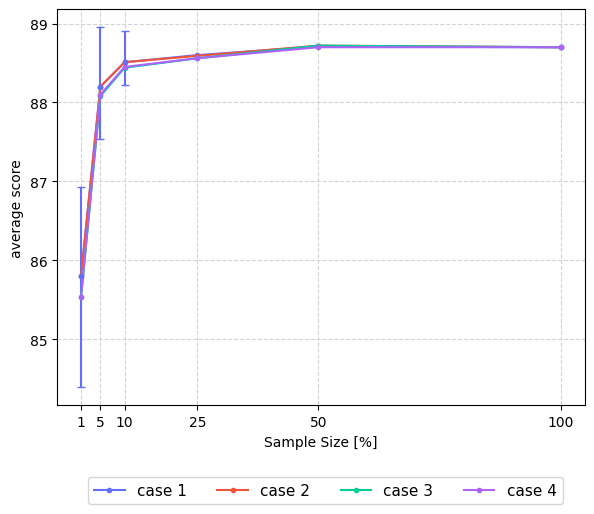

In [159]:
lower_error =  [sc_1pct_min, sc_5pct_min, sc_10pct_min]
upper_error =  [sc_1pct_max, sc_5pct_max, sc_10pct_max]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

x = [1, 5, 10, 25, 50, 100]

fig, axs = plt.subplots(1, 1, sharey = True)
axs.plot(x, sc_case_1_4_it500['case_1'], '.-',  color = "#636EFA", label = "case 1" )
axs.errorbar([1,5,10], sc_case_1_4_it500['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )

axs.plot(x, sc_case_1_4_it500['case_2'], '.-', color = "#EF553B",  label = "case 2")
axs.plot(x, sc_case_1_4_it500['case_3'], '.-',  color = "#00CC96", label = "case 3")
axs.plot(x ,sc_case_1_4_it500['case_4'], '.-',  color = "#AB63FA",  label = "case 4")
#axs.plot([50,100] ,sc_case_5_6_it500['case_6'], '.-',  color = "#FFA15A",  label = "case 6")


fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average score")
plt.xlabel("Sample Size [%]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_score_pyplot_it500_case_14_6.pdf', format = "pdf",bbox_inches='tight')

fig_sc_it500 = go.Figure()
fig_sc_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y=sc_case_1_4_it500['case_1'],
                        error_y=dict( type='data', # value of error bar given in data coordinates
                        symmetric=False,
                    array=[sc_1pct_max, sc_5pct_max,sc_10pct_max, 0 , 0, 0],
                    arrayminus=[sc_1pct_min, sc_5pct_min,sc_10pct_min, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0', 
                    )
                    )
fig_sc_it500.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sc_case_1_4_it500['case_2'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))

fig_sc_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y=sc_case_1_4_it500['case_3'],
                    mode='lines+markers',
                    name='alpha = 1, sT adjusted'))
fig_sc_it500.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sc_case_1_4_it500['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig_sc_it500.add_trace(go.Scatter(x=[50, 100], y=sc_case_5_6_it500['case_6'],
                    mode='lines+markers',
                    name='alpha = 1.0, agents cloned'))
fig_sc_it500.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average score')),
    legend=dict(
    yanchor="top",
    y=0.6,
    xanchor="left",
    x=0.8035
    ),
    font = dict(size = 18)
)
fig_sc_it500.show()

plotly.io.write_image(fig_sc_it500, "/home/lola/Nextcloud/Masterarbeit/04a_Images/exp_scores_500_1_100_with_min_max_errorbar.pdf", width= 1296.0, engine = "kaleido")

#### Table

In [148]:
first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
sc_it500_values_as_table = pd.DataFrame({'sample_size': first_column, 'case_1': sc_case_1_4_it500['case_1'], 'case_2': sc_case_1_4_it500['case_2'], 'case_3': sc_case_1_4_it500['case_3'],
                                    'case_4': sc_case_1_4_it500['case_4'], 'case_5': [sc_case_5_6_it500['case_5'][0],sc_case_5_6_it500['case_5'][1], "-", "-", "-", "-"], 'case_6': ["-", "-", "-", "-",sc_case_5_6_it500['case_6'][0] ,sc_case_5_6_it500['case_6'][1] ]})
sc_it500_values_as_table.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/sc_it500_plot_values_as_table.csv", sep = ";", index = False)

#### Boxplot of average experienced score at iteration 500

In [160]:
sc = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/scores_all_1_100pct_samples.csv")

In [158]:
sc_1pct = sc[((sc["sample_size"] == "1-pct") & (sc["alpha"] == 1) & (sc["stuck_time"] == 30.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]

sc_1pct_sCf =  sc[((sc["sample_size"] == "1-pct") & (sc["alpha"] == 0.75) & (sc["stuck_time"] == 30.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]

sc_1pct_rGs = sc[((sc["sample_size"] == "1-pct") & (sc["alpha"] == 1.0) & (sc["stuck_time"] == 30.0) & (sc['global_seed'].str.contains("rnd")))]["avg_executed_it_500"]

sc_1pct_sT = sc[((sc["sample_size"] == "1-pct") & (sc["alpha"] == 1) & (sc["stuck_time"] == 3000.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]

sc_1pct_sT_sCf = sc[((sc["sample_size"] == "1-pct") & (sc["alpha"] == 0.75) & (sc["stuck_time"] == 3000.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]


In [159]:
sc_5pct = sc[((sc["sample_size"] == "5-pct") & (sc["alpha"] == 1) & (sc["stuck_time"] == 30.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]

sc_5pct_sCf =  sc[((sc["sample_size"] == "5-pct") & (sc["alpha"] == 0.75) & (sc["stuck_time"] == 30.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]

sc_5pct_rGs = sc[((sc["sample_size"] == "5-pct") & (sc["alpha"] == 1.0) & (sc["stuck_time"] == 30.0) & (sc['global_seed'].str.contains("rnd")))]["avg_executed_it_500"]

sc_5pct_sT = sc[((sc["sample_size"] == "5-pct") & (sc["alpha"] == 1) & (sc["stuck_time"] == 600.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]

sc_5pct_sT_sCf = sc[((sc["sample_size"] == "5-pct") & (sc["alpha"] == 0.75) & (sc["stuck_time"] == 600.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]


In [160]:
sc_10pct = sc[((sc["sample_size"] == "10-pct") & (sc["alpha"] == 1) & (sc["stuck_time"] == 30.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]

sc_10pct_sCf =  sc[((sc["sample_size"] == "10-pct") & (sc["alpha"] == 0.75) & (sc["stuck_time"] == 30.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]

sc_10pct_sT = sc[((sc["sample_size"] == "10-pct") & (sc["alpha"] == 1) & (sc["stuck_time"] == 300.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]

sc_10pct_sT_sCf = sc[((sc["sample_size"] == "10-pct") & (sc["alpha"] == 0.75) & (sc["stuck_time"] == 300.0) & (sc["global_seed"]=="default"))]["avg_executed_it_500"]


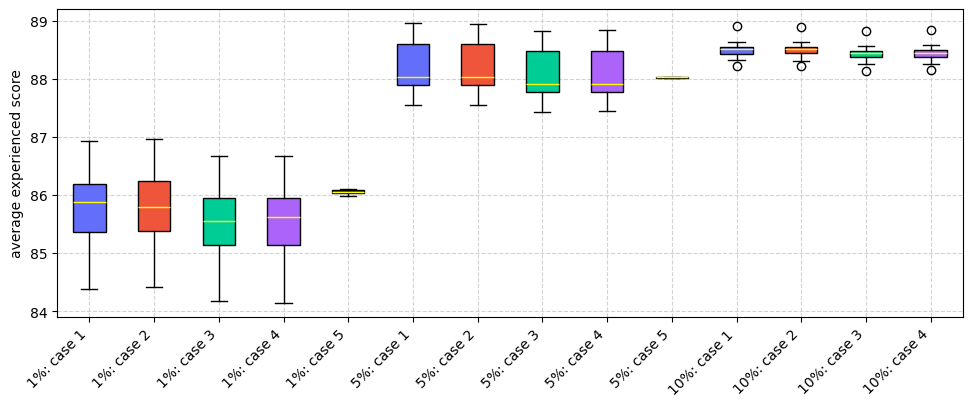

In [161]:
# Generates grouped aTtta
sc_bp_1pct = [sc[(sc['sample_size']=="1-pct") & (sc['alpha']== 1)  & (sc['stuck_time']== 30.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
              sc[(sc['sample_size']=="1-pct") & (sc['alpha']== 0.75)  & (sc['stuck_time']== 30.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
              sc[(sc['sample_size']=="1-pct") & (sc['alpha']== 1)  & (sc['stuck_time']== 3000.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
              sc[(sc['sample_size']=="1-pct") & (sc['alpha']== 0.75)  & (sc['stuck_time']== 3000.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
              sc[(sc['sample_size']=="1-pct") & (sc['global_seed'].str.contains('rnd')) ]['avg_executed_it_500']]
      
sc_bp_5pct = [sc[(sc['sample_size']=="5-pct") & (sc['alpha']== 1)  & (sc['stuck_time']== 30.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
             sc[(sc['sample_size']=="5-pct") & (sc['alpha']== 0.75)  & (sc['stuck_time']== 30.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
             sc[(sc['sample_size']=="5-pct") & (sc['alpha']== 1)  & (sc['stuck_time']== 600.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
              sc[(sc['sample_size']=="5-pct") & (sc['alpha']== 0.75)  & (sc['stuck_time']== 600.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
              sc[(sc['sample_size']=="5-pct") & (sc['global_seed'].str.contains('rnd')) ]['avg_executed_it_500']]

sc_bp_10pct = [sc[(sc['sample_size']=="10-pct") & (sc['alpha']== 1)  & (sc['stuck_time']== 30.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
             sc[(sc['sample_size']=="10-pct") & (sc['alpha']== 0.75)  & (sc['stuck_time']== 30.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
             sc[(sc['sample_size']=="10-pct") & (sc['alpha']== 1)  & (sc['stuck_time']== 300.0) & (sc['global_seed']== "default") ]['avg_executed_it_500'],
             sc[(sc['sample_size']=="10-pct") & (sc['alpha']== 0.75)  & (sc['stuck_time']== 300.0) & (sc['global_seed']== "default") ]['avg_executed_it_500']]

# Combines two data groups into a dataset
data = sc_bp_1pct + sc_bp_5pct + sc_bp_10pct 
 
colors = ["#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA"]
labels=["1%: case 1", "1%: case 2","1%: case 3", "1%: case 4","1%: case 5",
                                "5%: case 1", "5%: case 2","5%: case 3", "5%: case 4","5%: case 5",
                                 "10%: case 1", "10%: case 2","10%: case 3", "10%: case 4" ]
fig, ax = plt.subplots()
ax.set_ylabel('average experienced score')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_exp_score_boxplot_pyplot_1_10_pct_it500.pdf', format = "pdf",bbox_inches='tight')

fig = go.Figure()


fig.add_trace(go.Box( y= sc_1pct, quartilemethod="linear", name="1-pct, alpha = 1.0", marker_color="#3366CC"))
fig.add_trace(go.Box( y= sc_1pct_sCf, quartilemethod="linear", name="1-pct, alpha = 0.75", marker_color="#DC3912"))
fig.add_trace(go.Box( y= sc_1pct_sT, quartilemethod="linear", name="1-pct, sT adjusted", marker_color="#FF9900"))
fig.add_trace(go.Box( y= sc_1pct_sT_sCf, quartilemethod="linear", name="1-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig.add_trace(go.Box( y= sc_1pct_rGs, quartilemethod="linear", name="1-pct, random gS", marker_color="#990099"))

fig.add_trace(go.Box( y= sc_5pct, quartilemethod="linear", name="5-pct, alpha = 1.0", marker_color="#3366CC"))
fig.add_trace(go.Box( y= sc_5pct_sCf, quartilemethod="linear", name="5-pct, alpha = 0.75",  marker_color="#DC3912"))
fig.add_trace(go.Box( y= sc_5pct_sT, quartilemethod="linear", name="5-pct, sT adjusted", marker_color="#FF9900"))
fig.add_trace(go.Box( y= sc_5pct_sT_sCf, quartilemethod="linear", name="5-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig.add_trace(go.Box( y= sc_5pct_rGs, quartilemethod="linear", name="5-pct, random gS",marker_color="#990099"))

fig.add_trace(go.Box( y= sc_10pct, quartilemethod="linear", name="10-pct, alpha = 1.0", marker_color="#3366CC"))
fig.add_trace(go.Box( y= sc_10pct_sCf, quartilemethod="linear", name="10-pct, alpha = 0.75",  marker_color="#DC3912"))
fig.add_trace(go.Box( y= sc_10pct_sT, quartilemethod="linear", name="10-pct, sT adjusted", marker_color="#FF9900"))
fig.add_trace(go.Box( y= sc_10pct_sT_sCf, quartilemethod="linear", name="10-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))



fig.update_traces(boxpoints='all', jitter=0)
fig.update_layout(
    xaxis=dict(title=dict(text='Sample-Size')),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        zeroline=True,
        #dtick=1,
        gridcolor='rgb(255, 255, 255)',
        #gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        #zerolinewidth=2,
        title=dict(text='Average experienced score')),
        font = dict(size = 14),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    hovermode="x",
    showlegend = False
)
fig.show()

plotly.io.write_image(fig, "/home/lola/Nextcloud/Masterarbeit/04a_Images/boxplot_avg_exp_score_1_10_it500.pdf",  width= 1296.0, engine = "kaleido")

## 3. Number of stuck time violations

### Iteration 0

In [417]:
sTv_it0 = pd.DataFrame(pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/stuck_time_violations_1_100_it_0.csv"))

In [418]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

sTv_case1_it0 = []
sTv_case2_it0 = []
sTv_case3_it0 = []
sTv_case4_it0 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    # factor the number of stuck time violations need to be scaled by
    scale_to_100 = 100.0 / float(sampleSize)

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                sTv_case2_it0.append(np.mean(sTv_it0[(sTv_it0["sample_size"]== sample_size_string) & (sTv_it0["alpha"]==1.0) & (sTv_it0["stuck_time"]==sT_default) & (sTv_it0["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)
                # case 4
                sTv_case4_it0.append(np.mean(sTv_it0[(sTv_it0["sample_size"]== sample_size_string) & (sTv_it0["alpha"]==1.0) & (sTv_it0["stuck_time"]==sT_adjusted) & (sTv_it0["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)
            else:
                #case 2
                sTv_case2_it0.append(np.mean(sTv_it0[(sTv_it0["sample_size"]== sample_size_string) & (sTv_it0["alpha"]==float(alpha)) & (sTv_it0["stuck_time"]==sT_default) & (sTv_it0["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)
                # case 4
                sTv_case4_it0.append(np.mean(sTv_it0[(sTv_it0["sample_size"]== sample_size_string) & (sTv_it0["alpha"]==float(alpha)) & (sTv_it0["stuck_time"]==sT_adjusted) & (sTv_it0["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)
        else:
            sTv_case1_it0.append(np.mean(sTv_it0[(sTv_it0["sample_size"]==sample_size_string) & (sTv_it0["alpha"]==float(alpha)) & (sTv_it0["stuck_time"]==sT_default) & (sTv_it0["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)
            sTv_case3_it0.append(np.mean(sTv_it0[(sTv_it0["sample_size"]==sample_size_string) & (sTv_it0["alpha"]==float(alpha)) & (sTv_it0["stuck_time"]==sT_adjusted) & (sTv_it0["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)

# Calculate values for case 5 
sample_sizes_rGS = ['1', '5']
sTv_case5_it0 = []
for sampleSize in sample_sizes_rGS:
    sample_size_string = sampleSize + "-pct"
    # factor the number of stuck time violations need to be scaled by
    scale_to_100 = 100.0 / float(sampleSize)
    sTv_case5_it0.append(np.mean(sTv_it0[(sTv_it0["sample_size"]==sample_size_string) & (sTv_it0["alpha"]==1) & (sTv_it0["stuck_time"]==30.0) & (sTv_it0['global_seed'].str.contains("rnd"))]["n_stuck_veh"])*scale_to_100)

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
sTv_case6_it0 = []
for sampleSize in sample_sizes_dq:
    # factor the number of stuck time violations need to be scaled by
    if (sampleSize=="25-pct-doubled"):
        scale_to_100 = 2.0
    else: 
        scale_to_100 = 1.0
    sTv_case6_it0.append(np.mean(sTv_it0[(sTv_it0["sample_size"]==sampleSize)]["n_stuck_veh"])*scale_to_100)

In [419]:
stuckT_1pct_max0 = np.max(sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*100) - sTv_case1_it0[0]
stuckT_1pct_min0 = sTv_case1_it0[0] - np.min(sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*100)

stuckT_1pct_sCf_max0 = np.max(sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*100) - sTv_case2_it0[0]
stuckT_1pct_sCf_min0 = sTv_case2_it0[0] - np.min(sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*100)

stuckT_1pct_sT_max0 = np.max((sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==1.0) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==3000.0)]["n_stuck_veh"])*100) - sTv_case3_it0[0]
stuckT_1pct_sT_min0  = sTv_case3_it0[0] - np.min((sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==1.0) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==3000.0)]["n_stuck_veh"])*100)


In [420]:
stuckT_5pct_max0 = np.max(sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*20) - sTv_case1_it0[1]
stuckT_5pct_min0 = sTv_case1_it0[1] - np.min(sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*20)

stuckT_5pct_sCf_max0 = np.max(sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*20) - sTv_case2_it0[1]
stuckT_5pct_sCf_min0 = sTv_case2_it0[1] - np.min(sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*20)

stuckT_5pct_sT_max0 = np.max((sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==1.0) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==600.0)]["n_stuck_veh"])*20) - sTv_case3_it0[1]
stuckT_5pct_sT_min0 = sTv_case3_it0[1] - np.min((sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==1.0) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==600.0)]["n_stuck_veh"])*20)


In [421]:
stuckT_10pct_max0 = np.max(sTv_it0[(sTv_it0["sample_size"]=="10-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*10) - sTv_case1_it0[2]
stuckT_10pct_min0 = sTv_case1_it0[2] - np.min(sTv_it0[(sTv_it0["sample_size"]=="10-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*10)

stuckT_10pct_sCf_max0 = np.max(sTv_it0[(sTv_it0["sample_size"]=="10-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*10) - sTv_case2_it0[2]
stuckT_10pct_sCf_min0 = sTv_case2_it0[2] - np.min(sTv_it0[(sTv_it0["sample_size"]=="10-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"]*10)

stuckT_10pct_sT_max0 = np.max((sTv_it0[(sTv_it0["sample_size"]=="10-pct") & (sTv_it0["alpha"]==1.0) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==300.0)]["n_stuck_veh"])*10) - sTv_case3_it0[2]
stuckT_10pct_sT_min0 = sTv_case3_it0[2] - np.min((sTv_it0[(sTv_it0["sample_size"]=="10-pct") & (sTv_it0["alpha"]==1.0) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==300.0)]["n_stuck_veh"])*10)

In [422]:
sTv_case_1_4_it0 = pd.DataFrame({'case_1': sTv_case1_it0, 'case_2': sTv_case2_it0, 'case_3': sTv_case3_it0, 'case_4': sTv_case4_it0})
sTv_case_1_4_it0 = sTv_case_1_4_it0.round(2)
sTv_case_5_6_it0 = pd.DataFrame({'case_5': sTv_case5_it0, 'case_6': sTv_case6_it0})
sTv_case_5_6_it0 = sTv_case_5_6_it0.round(2)

#### Calculate doubling effect

In [496]:
sTv_25pct_doubled_fCf_sCf_025 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/stuck_time_violations_25_pct_doubled_fCf_sCf_0.25_it0.csv")

In [497]:
sTv_25pct_quadrupled_fCf_sCf_025 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/stuck_time_violations_25_pct_quadrupled_fCf_sCf_0.25_it0.csv")

In [498]:
original_25_sTv = np.array(sTv_it0[(sTv_it0['sample_size'] == "25-pct") & (sTv_it0['alpha'] == 1.0) & (sTv_it0['stuck_time'] == 30.0)]['n_stuck_veh'])[0]
original_25_sTv

np.int64(8547)

In [499]:
doubled_25pct_fCf_sCf_05 =  np.array(sTv_it0[(sTv_it0['sample_size'] == "25-pct-doubled")]['n_stuck_veh'])[0]
doubled_25pct_fCf_sCf_05

np.int64(16258)

In [500]:
quadrupled_25pct_fCf_sCf_1 =  np.array(sTv_it0[(sTv_it0['sample_size'] == "25-pct-quadrupled")]['n_stuck_veh'])[0]
quadrupled_25pct_fCf_sCf_1

np.int64(35347)

In [501]:
cleaned_sTv_25doubled = np.array(sTv_25pct_doubled_fCf_sCf_025['n_stuck_veh'] - doubled_25pct_fCf_sCf_05)[0]
cleaned_sTv_25doubled

np.int64(443465)

In [502]:
cleaned_sTv_25quadrupled = np.array(sTv_25pct_quadrupled_fCf_sCf_025['n_stuck_veh'] - quadrupled_25pct_fCf_sCf_1)[0]

In [503]:
cleaned_sTv_25quadrupled

np.int64(2946960)

In [504]:
doubling_factor = cleaned_sTv_25doubled/(2*original_25_sTv)
doubling_factor

np.float64(25.94272844272844)

In [505]:
quadrupling_factor = cleaned_sTv_25quadrupled/(4*original_25_sTv)
quadrupling_factor

np.float64(86.1986661986662)

#### Plot doubling effect

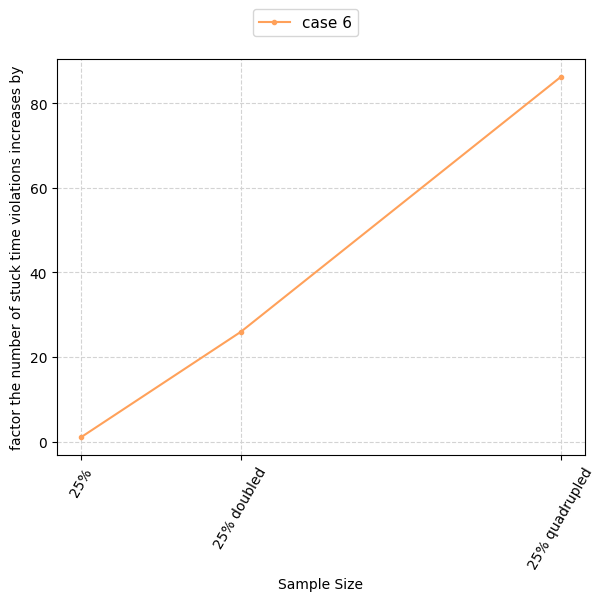

In [506]:
y_dq = [original_25_sTv/ original_25_sTv, doubling_factor, quadrupling_factor]

fig, axs = plt.subplots()

axs.plot([25, 50,100] ,y_dq, '.-',  color = "#FFA15A",  label = "case 6")


fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=3, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.60, 1.0))
plt.tight_layout(w_pad=3)
plt.xticks([25, 50,100], ["25%", "25% doubled","25% quadrupled"], rotation = 60)
plt.ylabel("factor the number of stuck time violations increases by")
plt.xlabel("Sample Size")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_pyplot_it0_case_6_when_accounting_for_size.pdf', format = "pdf",bbox_inches='tight')

#### table 

In [509]:
first_col = ['25% original', '25% doubled, capacity factors 0.25', "25% doubled, capacity factors 0.5", "25% quadrupled, capacity factors 0.25", '25% quadrupled, capacity factors 1.0']
second_col = [original_25_sTv, sTv_25pct_doubled_fCf_sCf_025['n_stuck_veh'][0], doubled_25pct_fCf_sCf_05, sTv_25pct_quadrupled_fCf_sCf_025['n_stuck_veh'][0],  quadrupled_25pct_fCf_sCf_1]
table_sTv_factor = pd.DataFrame({'sample size & capacity factors': first_col, 'unscaled value of stuck time violations': second_col})

In [511]:
table_sTv_factor.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/values_doubling_experiment.csv", index = False)


#### Plot

/tmp/ipykernel_12529/2248943847.py:13: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.

/tmp/ipykernel_12529/2248943847.py:16: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.



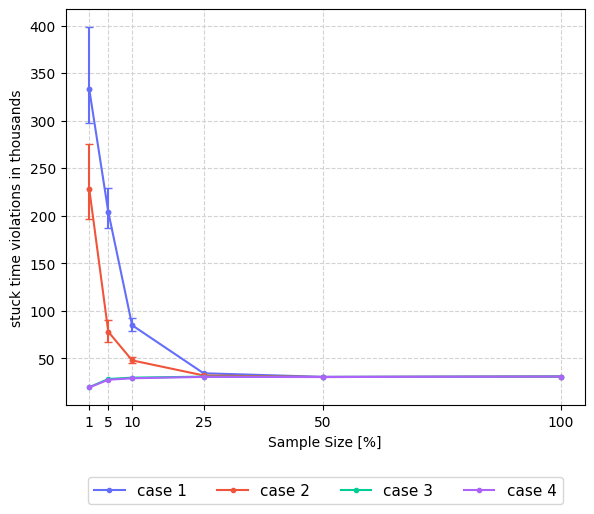

In [435]:
lower_error =  [stuckT_1pct_min0/1000, stuckT_5pct_min0/1000, stuckT_10pct_min0/1000]
upper_error =  [stuckT_1pct_max0/1000, stuckT_5pct_max0/1000, stuckT_10pct_max0/1000]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

lerr_c2 =  [stuckT_1pct_sCf_min0/1000, stuckT_5pct_sCf_min0/1000, stuckT_10pct_sCf_min0/1000]
uerr_c2 =  [stuckT_1pct_sCf_max0/1000, stuckT_5pct_sCf_max0/1000, stuckT_10pct_sCf_max0/1000]
asym_err_c2= np.array(list(zip(lerr_c2, uerr_c2))).T

x = [1, 5, 10, 25, 50, 100]

fig, axs = plt.subplots(1, 1, sharey = True)
axs.plot(x, sTv_case_1_4_it0['case_1']/1000, '.-',  color = "#636EFA", label = "case 1" )
axs.errorbar([1,5,10], sTv_case_1_4_it0['case_1'][0:3]/1000, yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )

axs.plot(x, sTv_case_1_4_it0['case_2']/1000, '.-', color = "#EF553B",  label = "case 2")
axs.errorbar([1,5,10], sTv_case_1_4_it0['case_2'][0:3]/1000, yerr= asym_err_c2, fmt= ".k",  color = "#EF553B", capsize=3 )
axs.plot(x, sTv_case_1_4_it0['case_3']/1000, '.-',  color = "#00CC96", label = "case 3")
axs.plot(x ,sTv_case_1_4_it0['case_4']/1000, '.-',  color = "#AB63FA",  label = "case 4")
#axs.plot([50,100] ,sTv_case_5_6_it0['case_6']/1000, '.-',  color = "#FFA15A",  label = "case 6")


fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
plt.xticks(x, x)
plt.ylabel("stuck time violations in thousands")
plt.xlabel("Sample Size [%]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_pyplot_it0_case_14_6.pdf', format = "pdf",bbox_inches='tight')


fig3a = go.Figure()
fig3a.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sTv_case_1_4_it0['case_1'],
                    error_y=dict(
                    symmetric=False,
                    array=[stuckT_1pct_max0, stuckT_5pct_max0,stuckT_10pct_max0, 0 , 0, 0],
                    arrayminus=[stuckT_1pct_min0, stuckT_5pct_min0,stuckT_10pct_min0, 0, 0 , 0],
                    visible=True),     
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0'))
fig3a.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sTv_case_1_4_it0['case_2'],
                    error_y=dict(
                    symmetric=False,
                    array=[stuckT_1pct_sCf_max0, stuckT_5pct_sCf_max0,stuckT_10pct_sCf_max0, 0 , 0, 0],
                    arrayminus=[stuckT_1pct_sCf_min0, stuckT_5pct_sCf_min0,stuckT_10pct_sCf_min0, 0, 0 , 0],
                    visible=True), 
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))

fig3a.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sTv_case_1_4_it0['case_3'],
                    error_y=dict(
                    symmetric=False,
                    array=[stuckT_1pct_sT_max0, stuckT_5pct_sT_max0,stuckT_10pct_sT_max0, 0 , 0, 0],
                    arrayminus=[stuckT_1pct_sT_min0, stuckT_5pct_sT_min0,stuckT_10pct_sT_min0, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1.0, sT adjusted'))

fig3a.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sTv_case_1_4_it0['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))

fig3a.add_trace(go.Scatter(x=[50, 100], y=sTv_case_5_6_it0['case_6'],
                    mode='lines+markers',
                    name='agents cloned'))

fig3a.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='number of stuck time violations')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    legend=dict(
    yanchor="top",
    y=1.0,
    xanchor="left",
    x=0.7899
    ), 
    font = dict( size = 18)
)
fig3a.show()

plotly.io.write_image(fig3a, "/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_1_100_with_min_max_errorbar_it0.pdf",  width= 1296.0, engine = "kaleido")

#### Table

In [ ]:
first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
sTv_it0_values_as_table = pd.DataFrame({'sample_size': first_column, 'case_1': sTv_case_1_4_it0['case_1'], 'case_2': sTv_case_1_4_it0['case_2'], 'case_3': sTv_case_1_4_it0['case_3'],
                                    'case_4': sTv_case_1_4_it0['case_4'], 'case_5': [sTv_case_5_6_it0['case_5'][0],sTv_case_5_6_it0['case_5'][1], "-", "-", "-", "-"], 'case_6': ["-", "-", "-", "-",sTv_case_5_6_it0['case_6'][0] ,sTv_case_5_6_it0['case_6'][1] ]})
sTv_it0_values_as_table.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/sTv_it0_plot_values_as_table.csv", sep = ";", index = False)

fig3c = go.Figure()
fig3c.add_trace(go.Scatter(x=[50, 100], y=sTv_case_1_4_it0['case_1'][-2:], 
                    name = "alpha = 1.0, sT = 30.0")
                    )
fig3c.add_trace(go.Scatter(x=[50, 100], y=sTv_case_1_4_it0['case_2'][-2:],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))
fig3c.add_trace(go.Scatter(x=[50, 100], y=sTv_case_1_4_it0['case_3'][-2:],
                    mode='lines+markers',
                    name='alpha = 1.0, sT adjusted'))
fig3c.add_trace(go.Scatter(x=[50, 100], y=sTv_case_1_4_it0['case_4'][-2:],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig3c.add_trace(go.Scatter(x=[50, 100], y=sTv_case_5_6_it0['case_6'],
                    mode='lines+markers',
                    name='alpha = 1.0, agents cloned'))

fig3c.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='number of stuck time violations')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig3c.show()

plotly.io.write_image(fig3c, "/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_50_100_it0.pdf",  width= 1296.0, engine = "kaleido")

#### Boxplots

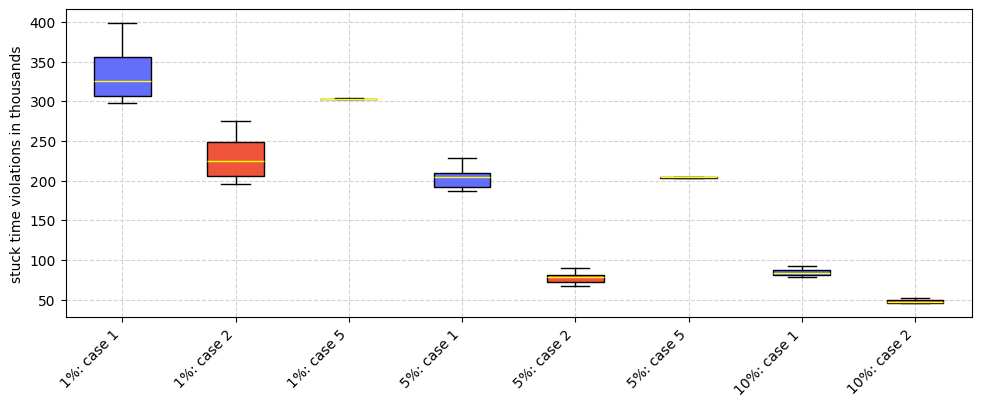

In [ ]:
# Generates grouped aTtta
sTv0_bp_1pct = [(sTv_it0[(sTv_it0['sample_size']=="1-pct") & (sTv_it0['alpha']== 1)  & (sTv_it0['stuck_time']== 30.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*100) / 1000,
              (sTv_it0[(sTv_it0['sample_size']=="1-pct") & (sTv_it0['alpha']== 0.75)  & (sTv_it0['stuck_time']== 30.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*100) / 1000,
              (sTv_it0[(sTv_it0['sample_size']=="1-pct") & (sTv_it0['global_seed'].str.contains('rnd')) ]['n_stuck_veh']*100) / 1000]
      
sTv0_bp_5pct = [(sTv_it0[(sTv_it0['sample_size']=="5-pct") & (sTv_it0['alpha']== 1)  & (sTv_it0['stuck_time']== 30.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*20) / 1000,
                (sTv_it0[(sTv_it0['sample_size']=="5-pct") & (sTv_it0['alpha']== 0.75)  & (sTv_it0['stuck_time']== 30.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*20) / 1000,
                (sTv_it0[(sTv_it0['sample_size']=="5-pct") & (sTv_it0['global_seed'].str.contains('rnd')) ]['n_stuck_veh']*20) / 1000]

sTv0_bp_10pct = [(sTv_it0[(sTv_it0['sample_size']=="10-pct") & (sTv_it0['alpha']== 1)  & (sTv_it0['stuck_time']== 30.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*10) / 1000,
                 (sTv_it0[(sTv_it0['sample_size']=="10-pct") & (sTv_it0['alpha']== 0.75)  & (sTv_it0['stuck_time']== 30.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*10)/ 1000]


data = sTv0_bp_1pct + sTv0_bp_5pct + sTv0_bp_10pct 
 
colors = ["#636EFA", "#EF553B" ,"#990099", "#636EFA", "#EF553B" ,"#990099", "#636EFA", "#EF553B" ]
labels=["1%: case 1", "1%: case 2","1%: case 5",
        "5%: case 1", "5%: case 2","5%: case 5",
        "10%: case 1", "10%: case 2" ]
fig, ax = plt.subplots()
ax.set_ylabel('stuck time violations in thousands')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/n_sTv_boxplot_pyplot_1_10_pct_it0_case_1_2_5.pdf', format = "pdf",bbox_inches='tight')

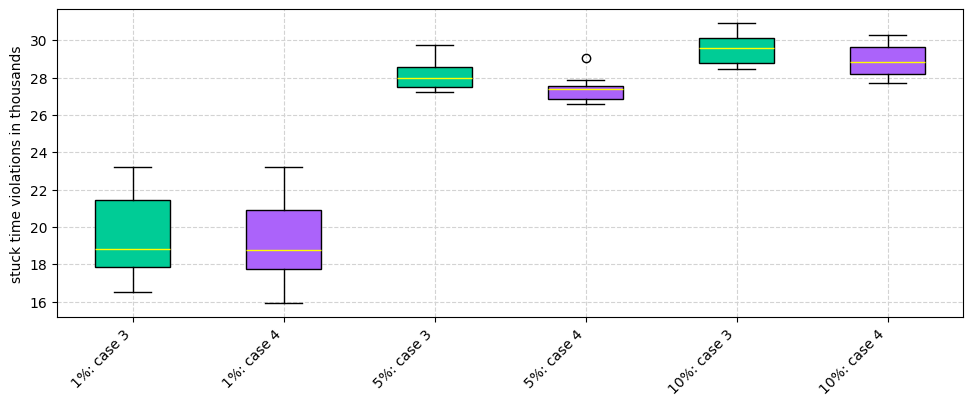

In [ ]:
# Generates grouped aTtta
sTv0_bp_1pct = [(sTv_it0[(sTv_it0['sample_size']=="1-pct") & (sTv_it0['alpha']== 1)  & (sTv_it0['stuck_time']== 3000.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*100) / 1000,
                (sTv_it0[(sTv_it0['sample_size']=="1-pct") & (sTv_it0['alpha']== 0.75)  & (sTv_it0['stuck_time']== 3000.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*100) / 1000]
      
sTv0_bp_5pct = [(sTv_it0[(sTv_it0['sample_size']=="5-pct") & (sTv_it0['alpha']== 1)  & (sTv_it0['stuck_time']== 600.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*20) / 1000,
                (sTv_it0[(sTv_it0['sample_size']=="5-pct") & (sTv_it0['alpha']== 0.75)  & (sTv_it0['stuck_time']== 600.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*20) / 1000]

sTv0_bp_10pct = [(sTv_it0[(sTv_it0['sample_size']=="10-pct") & (sTv_it0['alpha']== 1)  & (sTv_it0['stuck_time']== 300.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*10) / 1000,
                 (sTv_it0[(sTv_it0['sample_size']=="10-pct") & (sTv_it0['alpha']== 0.75)  & (sTv_it0['stuck_time']== 300.0) & (sTv_it0['global_seed']== "default") ]['n_stuck_veh']*10) / 1000]

# Combines two data groups into a dataset
data = sTv0_bp_1pct + sTv0_bp_5pct + sTv0_bp_10pct 
 
colors = [ "#00CC96", "#AB63FA",  "#00CC96", "#AB63FA",  "#00CC96", "#AB63FA"]
labels=["1%: case 3", "1%: case 4","5%: case 3", "5%: case 4","10%: case 3", "10%: case 4" ]
fig, ax = plt.subplots()
ax.set_ylabel('stuck time violations in thousands')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/n_sTv_boxplot_pyplot_1_10_pct_it0_case_3_4.pdf', format = "pdf",bbox_inches='tight')


stuckT_1pct_it0 = (sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"])*100
stuckT_1pct_sCf_it0 = (sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"])*100
stuckT_1pct_rGs_it0 = (sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"].str.contains("rnd"))& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"])*100
stuckT_1pct_sT_it0 = (sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==1.0) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==3000.0)]["n_stuck_veh"])*100
stuckT_1pct_sT_sCf_it0 = (sTv_it0[(sTv_it0["sample_size"]=="1-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==3000.0)]["n_stuck_veh"])*100


stuckT_5pct_it0 = (sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"])*20
stuckT_5pct_sCf_it0 = (sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"])*20
stuckT_5pct_rGs_it0 = (sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"].str.contains("rnd"))& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"])*20
stuckT_5pct_sT_it0 = (sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==1.0) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==600.0)]["n_stuck_veh"])*20
stuckT_5pct_sT_sCf_it0 = (sTv_it0[(sTv_it0["sample_size"]=="5-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==600.0)]["n_stuck_veh"])*20

stuckT_10pct_it0 = (sTv_it0[(sTv_it0["sample_size"]=="10-pct") & (sTv_it0["alpha"]==1) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"])*10
stuckT_10pct_sCf_it0 = (sTv_it0[(sTv_it0["sample_size"]=="10-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==30.0)]["n_stuck_veh"])*10
stuckT_10pct_sT_it0 = (sTv_it0[(sTv_it0["sample_size"]=="10-pct") & (sTv_it0["alpha"]==1.0) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==300.0)]["n_stuck_veh"])*10
stuckT_10pct_sT_sCf_it0 = (sTv_it0[(sTv_it0["sample_size"]=="10-pct") & (sTv_it0["alpha"]==0.75) & (sTv_it0["global_seed"]=="default")& (sTv_it0["stuck_time"]==300.0)]["n_stuck_veh"])*10

fig_n_sTv_1_10_bp_c125 = go.Figure()


fig_n_sTv_1_10_bp_c125.add_trace(go.Box( y= stuckT_1pct_it0, quartilemethod="linear", name="1-pct", marker_color="#3366CC"))
fig_n_sTv_1_10_bp_c125.add_trace(go.Box( y= stuckT_1pct_sCf_it0, quartilemethod="linear", name="1-pct, alpha = 0.75", marker_color="#DC3912"))
fig_n_sTv_1_10_bp_c125.add_trace(go.Box( y= stuckT_1pct_rGs_it0, quartilemethod="linear", name="1-pct, random gS", marker_color="#990099"))
fig_n_sTv_1_10_bp_c125.add_trace(go.Box( y= stuckT_5pct_it0, quartilemethod="linear", name="5-pct, alpha = 1", marker_color="#3366CC"))
fig_n_sTv_1_10_bp_c125.add_trace(go.Box( y= stuckT_5pct_sCf_it0, quartilemethod="linear", name="5-pct, alpha = 0.75",  marker_color="#DC3912"))
fig_n_sTv_1_10_bp_c125.add_trace(go.Box( y= stuckT_5pct_rGs_it0, quartilemethod="linear", name="5-pct, random gS",marker_color="#990099"))

fig_n_sTv_1_10_bp_c125.add_trace(go.Box( y= stuckT_10pct_it0, quartilemethod="linear", name="10-pct, alpha = 1", marker_color="#3366CC"))
fig_n_sTv_1_10_bp_c125.add_trace(go.Box( y= stuckT_10pct_sCf_it0, quartilemethod="linear", name="10-pct, alpha = 0.75",  marker_color="#DC3912"))
fig_n_sTv_1_10_bp_c125.update_traces(boxpoints='all', jitter=0)
fig_n_sTv_1_10_bp_c125.update_layout(
    xaxis=dict(title=dict(text='Sample-Size')),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        zeroline=True,
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='Number of stuck-time violations')),
        font = dict(size = 14),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    hovermode="x",
    showlegend = False
)
fig_n_sTv_1_10_bp_c125.show()

plotly.io.write_image(fig_n_sTv_1_10_bp_c125, "/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_1_10_boxplot_st_default_it0.pdf",  width= 1296.0, engine = "kaleido")

fig_n_sTv_1_10_bp_c34 = go.Figure()
fig_n_sTv_1_10_bp_c34.add_trace(go.Box( y= stuckT_1pct_sT_it0, quartilemethod="linear", name="1-pct, sT adjusted", marker_color="#FF9900"))
fig_n_sTv_1_10_bp_c34.add_trace(go.Box( y= stuckT_1pct_sT_sCf_it0, quartilemethod="linear", name="1-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig_n_sTv_1_10_bp_c34.add_trace(go.Box( y= stuckT_5pct_sT_it0, quartilemethod="linear", name="5-pct, sT adjusted", marker_color="#FF9900"))
fig_n_sTv_1_10_bp_c34.add_trace(go.Box( y= stuckT_5pct_sT_sCf_it0, quartilemethod="linear", name="5-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig_n_sTv_1_10_bp_c34.add_trace(go.Box( y= stuckT_10pct_sT_it0, quartilemethod="linear", name="10-pct, sT adjusted", marker_color="#FF9900"))
fig_n_sTv_1_10_bp_c34.add_trace(go.Box( y= stuckT_10pct_sT_sCf_it0, quartilemethod="linear", name="10-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig_n_sTv_1_10_bp_c34.update_traces(boxpoints='all', jitter=0)
fig_n_sTv_1_10_bp_c34.update_layout(
    xaxis=dict(title=dict(text='Sample-Size')),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        zeroline=True,
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='Number of stuck-time violations')),
        font = dict(size = 14),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    hovermode="x",
    showlegend = False
)
fig_n_sTv_1_10_bp_c34.show()

plotly.io.write_image(fig_n_sTv_1_10_bp_c34, "/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_1_10_boxplot_st_adjusted_it0.pdf",  width= 1296.0, engine = "kaleido")

### Iteration 500

In [ ]:
# number of stuck vehicles
sTv_it500 = pd.DataFrame(pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/stuck_time_violations_1_to_100pct_correct2.csv"))


In [ ]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

sTv_case1_it500 = []
sTv_case2_it500 = []
sTv_case3_it500 = []
sTv_case4_it500 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    # factor the number of stuck time violations need to be scaled by
    scale_to_100 = 100.0 / float(sampleSize)

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                sTv_case2_it500.append(np.mean(sTv_it500[(sTv_it500["sample_size"]== sample_size_string) & (sTv_it500["alpha"]==1.0) & (sTv_it500["stuck_time"]==sT_default) & (sTv_it500["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)
                # case 4
                sTv_case4_it500.append(np.mean(sTv_it500[(sTv_it500["sample_size"]== sample_size_string) & (sTv_it500["alpha"]==1.0) & (sTv_it500["stuck_time"]==sT_adjusted) & (sTv_it500["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)
            else:
                #case 2
                sTv_case2_it500.append(np.mean(sTv_it500[(sTv_it500["sample_size"]== sample_size_string) & (sTv_it500["alpha"]==float(alpha)) & (sTv_it500["stuck_time"]==sT_default) & (sTv_it500["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)
                # case 4
                sTv_case4_it500.append(np.mean(sTv_it500[(sTv_it500["sample_size"]== sample_size_string) & (sTv_it500["alpha"]==float(alpha)) & (sTv_it500["stuck_time"]==sT_adjusted) & (sTv_it500["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)
        else:
            sTv_case1_it500.append(np.mean(sTv_it500[(sTv_it500["sample_size"]==sample_size_string) & (sTv_it500["alpha"]==float(alpha)) & (sTv_it500["stuck_time"]==sT_default) & (sTv_it500["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)
            sTv_case3_it500.append(np.mean(sTv_it500[(sTv_it500["sample_size"]==sample_size_string) & (sTv_it500["alpha"]==float(alpha)) & (sTv_it500["stuck_time"]==sT_adjusted) & (sTv_it500["global_seed"]=="default")]["n_stuck_veh"])*scale_to_100)

# Calculate values for case 5 
sample_sizes_rGS = ['1', '5']
sTv_case5_it500 = []
for sampleSize in sample_sizes_rGS:
    sample_size_string = sampleSize + "-pct"
    # factor the number of stuck time violations need to be scaled by
    scale_to_100 = 100.0 / float(sampleSize)
    sTv_case5_it500.append(np.mean(sTv_it500[(sTv_it500["sample_size"]==sample_size_string) & (sTv_it500["alpha"]==1) & (sTv_it500["stuck_time"]==30.0) & (sTv_it500['global_seed'].str.contains("rnd"))]["n_stuck_veh"])*scale_to_100)

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
sTv_case6_it500 = []
for sampleSize in sample_sizes_dq:
    # factor the number of stuck time violations need to be scaled by
    if (sampleSize=="25-pct-doubled"):
        scale_to_100 = 2.0
    else: 
        scale_to_100 = 1.0
    sTv_case6_it500.append(np.mean(sTv_it500[(sTv_it500["sample_size"]==sampleSize)]["n_stuck_veh"])*scale_to_100)

In [ ]:

stuckT_1pct_max = np.max(sTv_it500[(sTv_it500["sample_size"]=="1-pct") & (sTv_it500["alpha"]==1) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*100) - sTv_case1_it500[0]
stuckT_1pct_min = sTv_case1_it500[0] - np.min(sTv_it500[(sTv_it500["sample_size"]=="1-pct") & (sTv_it500["alpha"]==1) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*100)

stuckT_1pct_sCf_max = np.max(sTv_it500[(sTv_it500["sample_size"]=="1-pct") & (sTv_it500["alpha"]==0.75) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*100) - sTv_case2_it500[0]
stuckT_1pct_sCf_min = sTv_case2_it500[0] - np.min(sTv_it500[(sTv_it500["sample_size"]=="1-pct") & (sTv_it500["alpha"]==0.75) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*100)


stuckT_1pct_sT_max = np.max((sTv_it500[(sTv_it500["sample_size"]=="1-pct") & (sTv_it500["alpha"]==1.0) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==3000.0)]["n_stuck_veh"])*100) - sTv_case3_it500[0]
stuckT_1pct_sT_min  = sTv_case3_it500[0] - np.min((sTv_it500[(sTv_it500["sample_size"]=="1-pct") & (sTv_it500["alpha"]==1.0) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==3000.0)]["n_stuck_veh"])*100)



In [ ]:
stuckT_5pct_max = np.max(sTv_it500[(sTv_it500["sample_size"]=="5-pct") & (sTv_it500["alpha"]==1) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*20) - sTv_case1_it500[1]
stuckT_5pct_min = sTv_case1_it500[1] - np.min(sTv_it500[(sTv_it500["sample_size"]=="5-pct") & (sTv_it500["alpha"]==1) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*20)

stuckT_5pct_sCf_max = np.max(sTv_it500[(sTv_it500["sample_size"]=="5-pct") & (sTv_it500["alpha"]==0.75) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*20) - sTv_case2_it500[1]
stuckT_5pct_sCf_min = sTv_case2_it500[1] - np.min(sTv_it500[(sTv_it500["sample_size"]=="5-pct") & (sTv_it500["alpha"]==0.75) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*20)


stuckT_5pct_sT_max = np.max((sTv_it500[(sTv_it500["sample_size"]=="5-pct") & (sTv_it500["alpha"]==1.0) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==600.0)]["n_stuck_veh"])*20) - sTv_case3_it500[1]
stuckT_5pct_sT_min = sTv_case3_it500[1] - np.min((sTv_it500[(sTv_it500["sample_size"]=="5-pct") & (sTv_it500["alpha"]==1.0) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==600.0)]["n_stuck_veh"])*20)

In [ ]:

stuckT_10pct_max = np.max(sTv_it500[(sTv_it500["sample_size"]=="10-pct") & (sTv_it500["alpha"]==1) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*10) - sTv_case1_it500[2]
stuckT_10pct_min = sTv_case1_it500[2] - np.min(sTv_it500[(sTv_it500["sample_size"]=="10-pct") & (sTv_it500["alpha"]==1) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*10)


stuckT_10pct_sCf_max = np.max(sTv_it500[(sTv_it500["sample_size"]=="10-pct") & (sTv_it500["alpha"]==0.75) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*10) - sTv_case2_it500[2]
stuckT_10pct_sCf_min = sTv_case2_it500[2] - np.min(sTv_it500[(sTv_it500["sample_size"]=="10-pct") & (sTv_it500["alpha"]==0.75) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==30.0)]["n_stuck_veh"]*10)


# error should be 300.0
stuckT_10pct_sT_max = np.max((sTv_it500[(sTv_it500["sample_size"]=="10-pct") & (sTv_it500["alpha"]==1.0) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==600.0)]["n_stuck_veh"])*10) - sTv_case3_it500[2]
stuckT_10pct_sT_min = sTv_case3_it500[2] - np.min((sTv_it500[(sTv_it500["sample_size"]=="10-pct") & (sTv_it500["alpha"]==1.0) & (sTv_it500["global_seed"]=="default")& (sTv_it500["stuck_time"]==600.0)]["n_stuck_veh"])*10)

In [ ]:
sTv_case_1_4_it500 = pd.DataFrame({'case_1': sTv_case1_it500, 'case_2': sTv_case2_it500, 'case_3': sTv_case3_it500, 'case_4': sTv_case4_it500})
sTv_case_1_4_it500 = sTv_case_1_4_it500.round(2)
sTv_case_5_6_it500 = pd.DataFrame({'case_5': sTv_case5_it500, 'case_6': sTv_case6_it500})
sTv_case_5_6_it500 = sTv_case_5_6_it0.round(2)

#### Plot Number of Stuck time violations

/tmp/ipykernel_12529/3171940604.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  axs.errorbar([1,5,10], sTv_case_1_4_it500['case_1'][0:3]/1000, yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )
/tmp/ipykernel_12529/3171940604.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  axs.errorbar([1,5,10], sTv_case_1_4_it500['case_2'][0:3]/1000, yerr= asym_err_c2, fmt= ".k",  color = "#EF553B", capsize=3 )


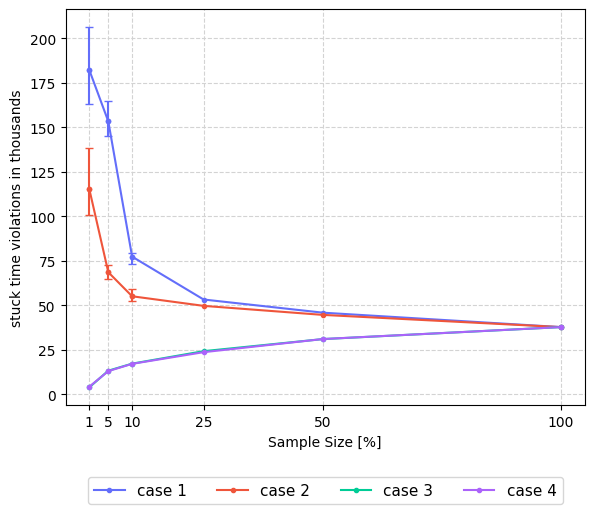

In [ ]:
lower_error =  [stuckT_1pct_min/1000, stuckT_5pct_min/1000, stuckT_10pct_min/1000]
upper_error =  [stuckT_1pct_max/1000, stuckT_5pct_max/1000, stuckT_10pct_max/1000]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

lerr_c2 =  [stuckT_1pct_sCf_min/1000, stuckT_5pct_sCf_min/1000, stuckT_10pct_sCf_min/1000]
uerr_c2 =  [stuckT_1pct_sCf_max/1000, stuckT_5pct_sCf_max/1000, stuckT_10pct_sCf_max/1000]
asym_err_c2= np.array(list(zip(lerr_c2, uerr_c2))).T

x = [1, 5, 10, 25, 50, 100]

fig, axs = plt.subplots(1, 1, sharey = True)
axs.plot(x, sTv_case_1_4_it500['case_1']/1000, '.-',  color = "#636EFA", label = "case 1" )
axs.errorbar([1,5,10], sTv_case_1_4_it500['case_1'][0:3]/1000, yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=3 )

axs.plot(x, sTv_case_1_4_it500['case_2']/1000, '.-', color = "#EF553B",  label = "case 2")
axs.errorbar([1,5,10], sTv_case_1_4_it500['case_2'][0:3]/1000, yerr= asym_err_c2, fmt= ".k",  color = "#EF553B", capsize=3 )
axs.plot(x, sTv_case_1_4_it500['case_3']/1000, '.-',  color = "#00CC96", label = "case 3")
axs.plot(x ,sTv_case_1_4_it500['case_4']/1000, '.-',  color = "#AB63FA",  label = "case 4")
#axs.plot([50,100] ,sTv_case_5_6_it500['case_6']/1000, '.-',  color = "#FFA15A",  label = "case 6")


fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
plt.xticks(x, x)
plt.ylabel("stuck time violations in thousands")
plt.xlabel("Sample Size [%]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_pyplot_it500_case_14_6.pdf', format = "pdf",bbox_inches='tight')

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sTv_case_1_4_it500['case_1'],
                    error_y=dict(
                    symmetric=False,
                    array=[stuckT_1pct_max, stuckT_5pct_max,stuckT_10pct_max, 0 , 0, 0],
                    arrayminus=[stuckT_1pct_min, stuckT_5pct_min,stuckT_10pct_min, 0, 0 , 0],
                    visible=True),     
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0'))
fig3.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sTv_case_1_4_it500['case_2'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))
fig3.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sTv_case_1_4_it500['case_3'],
                    error_y=dict(
                    symmetric=False,
                    array=[stuckT_1pct_sT_max, stuckT_5pct_sT_max,stuckT_10pct_sT_max, 0 , 0, 0],
                    arrayminus=[stuckT_1pct_sT_min, stuckT_5pct_sT_min,stuckT_10pct_sT_min, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1.0, sT adjusted'))
fig3.add_trace(go.Scatter(x=[1, 5, 10, 25, 50, 100], y=sTv_case_1_4_it500['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig3.add_trace(go.Scatter(x=[ 50, 100], y=sTv_case_5_6_it500['case_6'],
                    mode='lines+markers',
                    name='agents cloned'))
fig3.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='number of stuck time violations')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    legend=dict(
    yanchor="top",
    y=1.0,
    xanchor="left",
    x=0.7899
    ), 
    font = dict( size = 18))
fig3.show()

plotly.io.write_image(fig3, "/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_1_100_with_min_max_errorbar.pdf",  width= 1296.0, engine = "kaleido")

#### Table

In [ ]:
first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
sTv_it500_values_as_table = pd.DataFrame({'sample_size': first_column, 'case_1': sTv_case_1_4_it500['case_1'], 'case_2': sTv_case_1_4_it500['case_2'], 'case_3': sTv_case_1_4_it500['case_3'],
                                    'case_4': sTv_case_1_4_it500['case_4'], 'case_5': [sTv_case_5_6_it500['case_5'][0],sTv_case_5_6_it500['case_5'][1], "-", "-", "-", "-"], 'case_6': ["-", "-", "-", "-",sTv_case_5_6_it500['case_6'][0] ,sTv_case_5_6_it500['case_6'][1] ]})
sTv_it500_values_as_table.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/sTv_it500_plot_values_as_table.csv", sep = ";", index = False)

#### Boxplot number of stuck time violations

In [ ]:
# number of stuck vehicles
sTv = pd.DataFrame(pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/stuck_time_violations_1_to_100pct_correct2.csv"))


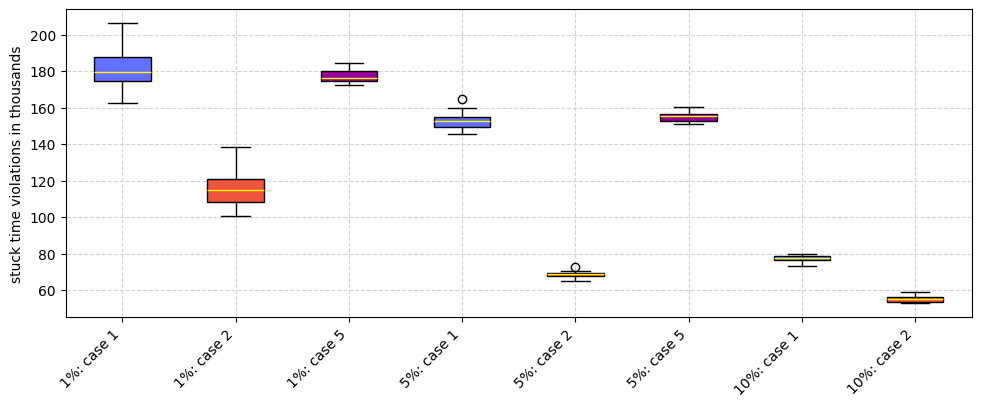

In [ ]:
# Generates grouped aTtta
sTv_bp_1pct = [(sTv[(sTv['sample_size']=="1-pct") & (sTv['alpha']== 1)  & (sTv['stuck_time']== 30.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*100) / 1000,
              (sTv[(sTv['sample_size']=="1-pct") & (sTv['alpha']== 0.75)  & (sTv['stuck_time']== 30.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*100) / 1000,
              (sTv[(sTv['sample_size']=="1-pct") & (sTv['global_seed'].str.contains('rnd')) ]['n_stuck_veh']*100) / 1000]
      
sTv_bp_5pct = [(sTv[(sTv['sample_size']=="5-pct") & (sTv['alpha']== 1)  & (sTv['stuck_time']== 30.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*20) / 1000,
                (sTv[(sTv['sample_size']=="5-pct") & (sTv['alpha']== 0.75)  & (sTv['stuck_time']== 30.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*20) / 1000,
                (sTv[(sTv['sample_size']=="5-pct") & (sTv['global_seed'].str.contains('rnd')) ]['n_stuck_veh']*20) / 1000]

sTv_bp_10pct = [(sTv[(sTv['sample_size']=="10-pct") & (sTv['alpha']== 1)  & (sTv['stuck_time']== 30.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*10) / 1000,
                 (sTv[(sTv['sample_size']=="10-pct") & (sTv['alpha']== 0.75)  & (sTv['stuck_time']== 30.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*10)/ 1000]

# Combines two data groups into a dataset
data = sTv_bp_1pct + sTv_bp_5pct + sTv_bp_10pct 
 
colors = ["#636EFA", "#EF553B" ,"#990099", "#636EFA", "#EF553B" ,"#990099", "#636EFA", "#EF553B" ]
labels=["1%: case 1", "1%: case 2","1%: case 5",
        "5%: case 1", "5%: case 2","5%: case 5",
        "10%: case 1", "10%: case 2" ]
fig, ax = plt.subplots()
ax.set_ylabel('stuck time violations in thousands')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/n_sTv_boxplot_pyplot_1_10_pct_it500_case_1_2_5.pdf', format = "pdf",bbox_inches='tight')

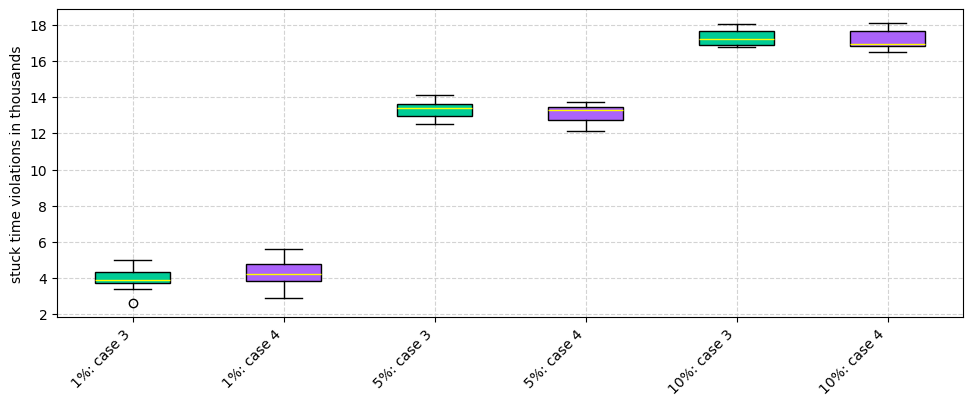

In [ ]:
# Generates grouped aTtta
sTv_bp_1pct = [(sTv[(sTv['sample_size']=="1-pct") & (sTv['alpha']== 1)  & (sTv['stuck_time']== 3000.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*100) / 1000,
                (sTv[(sTv['sample_size']=="1-pct") & (sTv['alpha']== 0.75)  & (sTv['stuck_time']== 3000.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*100) / 1000]
      
sTv_bp_5pct = [(sTv[(sTv['sample_size']=="5-pct") & (sTv['alpha']== 1)  & (sTv['stuck_time']== 600.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*20) / 1000,
                (sTv[(sTv['sample_size']=="5-pct") & (sTv['alpha']== 0.75)  & (sTv['stuck_time']== 600.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*20) / 1000]

sTv_bp_10pct = [(sTv[(sTv['sample_size']=="10-pct") & (sTv['alpha']== 1)  & (sTv['stuck_time']== 300.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*10) / 1000,
                 (sTv[(sTv['sample_size']=="10-pct") & (sTv['alpha']== 0.75)  & (sTv['stuck_time']== 300.0) & (sTv['global_seed']== "default") ]['n_stuck_veh']*10) / 1000]

# Combines two data groups into a dataset
data = sTv_bp_1pct + sTv_bp_5pct + sTv_bp_10pct 
 
colors = [ "#00CC96", "#AB63FA",  "#00CC96", "#AB63FA",  "#00CC96", "#AB63FA"]
labels=["1%: case 3", "1%: case 4","5%: case 3", "5%: case 4","10%: case 3", "10%: case 4" ]
fig, ax = plt.subplots()
ax.set_ylabel('stuck time violations in thousands')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/n_sTv_boxplot_pyplot_1_10_pct_it500_case_3_4.pdf', format = "pdf",bbox_inches='tight')


stuckT_1pct = (sTv[(sTv["sample_size"]=="1-pct") & (sTv["alpha"]==1) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==30.0)]["n_stuck_veh"])*100
stuckT_1pct_sCf = (sTv[(sTv["sample_size"]=="1-pct") & (sTv["alpha"]==0.75) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==30.0)]["n_stuck_veh"])*100
stuckT_1pct_rGs = (sTv[(sTv["sample_size"]=="1-pct") & (sTv["alpha"]==1) & (sTv["global_seed"].str.contains("rnd"))& (sTv["stuck_time"]==30.0)]["n_stuck_veh"])*100
stuckT_1pct_sT = (sTv[(sTv["sample_size"]=="1-pct") & (sTv["alpha"]==1.0) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==3000.0)]["n_stuck_veh"])*100
stuckT_1pct_sT_sCf = (sTv[(sTv["sample_size"]=="1-pct") & (sTv["alpha"]==0.75) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==3000.0)]["n_stuck_veh"])*100

stuckT_5pct = (sTv[(sTv["sample_size"]=="5-pct") & (sTv["alpha"]==1) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==30.0)]["n_stuck_veh"])*20
stuckT_5pct_sCf = (sTv[(sTv["sample_size"]=="5-pct") & (sTv["alpha"]==0.75) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==30.0)]["n_stuck_veh"])*20
stuckT_5pct_rGs = (sTv[(sTv["sample_size"]=="5-pct") & (sTv["alpha"]==1) & (sTv["global_seed"].str.contains("rnd"))& (sTv["stuck_time"]==30.0)]["n_stuck_veh"])*20
stuckT_5pct_sT = (sTv[(sTv["sample_size"]=="5-pct") & (sTv["alpha"]==1.0) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==600.0)]["n_stuck_veh"])*20
stuckT_5pct_sT_sCf = (sTv[(sTv["sample_size"]=="5-pct") & (sTv["alpha"]==0.75) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==600.0)]["n_stuck_veh"])*20


stuckT_10pct = (sTv[(sTv["sample_size"]=="10-pct") & (sTv["alpha"]==1) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==30.0)]["n_stuck_veh"])*10
stuckT_10pct_sCf = (sTv[(sTv["sample_size"]=="10-pct") & (sTv["alpha"]==0.75) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==30.0)]["n_stuck_veh"])*10
stuckT_10pct_sT = (sTv[(sTv["sample_size"]=="10-pct") & (sTv["alpha"]==1.0) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==600.0)]["n_stuck_veh"])*10
stuckT_10pct_sT_sCf = (sTv[(sTv["sample_size"]=="10-pct") & (sTv["alpha"]==0.75) & (sTv["global_seed"]=="default")& (sTv["stuck_time"]==600.0)]["n_stuck_veh"])*10

fig = go.Figure()
fig.add_trace(go.Box( y= stuckT_1pct, quartilemethod="linear", name="1-pct", marker_color="#3366CC"))
fig.add_trace(go.Box( y= stuckT_1pct_sCf, quartilemethod="linear", name="1-pct, alpha = 0.75", marker_color="#DC3912"))
fig.add_trace(go.Box( y= stuckT_1pct_sT, quartilemethod="linear", name="1-pct, sT adjusted", marker_color="#FF9900"))
fig.add_trace(go.Box( y= stuckT_1pct_sT_sCf, quartilemethod="linear", name="1-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig.add_trace(go.Box( y= stuckT_1pct_rGs, quartilemethod="linear", name="1-pct, random gS", marker_color="#990099"))
fig.add_trace(go.Box( y= stuckT_5pct, quartilemethod="linear", name="5-pct, alpha = 1", marker_color="#3366CC"))
fig.add_trace(go.Box( y= stuckT_5pct_sCf, quartilemethod="linear", name="5-pct, alpha = 0.75",  marker_color="#DC3912"))
fig.add_trace(go.Box( y= stuckT_5pct_sT, quartilemethod="linear", name="5-pct, sT adjusted", marker_color="#FF9900"))
fig.add_trace(go.Box( y= stuckT_5pct_sT_sCf, quartilemethod="linear", name="5-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))
fig.add_trace(go.Box( y= stuckT_5pct_rGs, quartilemethod="linear", name="5-pct, random gS",marker_color="#990099"))

fig.add_trace(go.Box( y= stuckT_10pct, quartilemethod="linear", name="10-pct, alpha = 1", marker_color="#3366CC"))
fig.add_trace(go.Box( y= stuckT_10pct_sCf, quartilemethod="linear", name="10-pct, alpha = 0.75",  marker_color="#DC3912"))
fig.add_trace(go.Box( y= stuckT_10pct_sT, quartilemethod="linear", name="10-pct, sT adjusted", marker_color="#FF9900"))
fig.add_trace(go.Box( y= stuckT_10pct_sT_sCf, quartilemethod="linear", name="10-pct, sT adjusted, alpha = 0.75", marker_color="#109618"))

fig.update_traces(boxpoints='all', jitter=0)
fig.update_layout(
    xaxis=dict(title=dict(text='Sample-Size')),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        zeroline=True,
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='Number of stuck-time violations')),
        font = dict(size = 14),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100),
    hovermode="x",
    showlegend = False
)
fig.show()

plotly.io.write_image(fig, "/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_1_10_boxplot_st_adjusted.pdf",  width= 1296.0, engine = "kaleido")

fig = go.Figure()

fig.add_trace(go.Box( y= stuckT_1pct, quartilemethod="linear", name="1-pct", marker_color="#3366CC"))
fig.add_trace(go.Box( y= stuckT_1pct_sCf, quartilemethod="linear", name="1-pct, alpha = 0.75", marker_color="#DC3912"))

fig.add_trace(go.Box( y= stuckT_1pct_rGs, quartilemethod="linear", name="1-pct, random gS", marker_color="#990099"))
fig.add_trace(go.Box( y= stuckT_5pct, quartilemethod="linear", name="5-pct, alpha = 1", marker_color="#3366CC"))
fig.add_trace(go.Box( y= stuckT_5pct_sCf, quartilemethod="linear", name="5-pct, alpha = 0.75",  marker_color="#DC3912"))

fig.add_trace(go.Box( y= stuckT_5pct_rGs, quartilemethod="linear", name="5-pct, random gS",marker_color="#990099"))

fig.add_trace(go.Box( y= stuckT_10pct, quartilemethod="linear", name="10-pct, alpha = 1", marker_color="#3366CC"))
fig.add_trace(go.Box( y= stuckT_10pct_sCf, quartilemethod="linear", name="10-pct, alpha = 0.75",  marker_color="#DC3912"))

fig.update_traces(boxpoints='all', jitter=0)
fig.update_layout(
    xaxis=dict(title=dict(text='Sample-Size')),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        zeroline=True,
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='Number of stuck-time violations')),
        font = dict(size = 14),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    hovermode="x",
    showlegend = False
)
fig.show()

plotly.io.write_image(fig, "/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_1_10_boxplot_st_30_seconds.pdf",  width= 1296.0, engine = "kaleido")

## 3a. Number of stuck time violations per hour

In [542]:
sTv_pH = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/N_sTV_per_hour.csv")


In [543]:
sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ['1.0', '0.75']
sT_default = 30.0

sT_per_h = pd.DataFrame()

for sampleSize in sample_sizes:
    # calculate adjusted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    if (sampleSize == '100'):
        stuck_times = [sT_default]
    else: 
        stuck_times = [sT_default, sT_adjusted]
    
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"
    factor_scale_to_100 = 100.0 / float(sampleSize)

    for sT in stuck_times:
        for alpha in alpha_values: 
            if((sampleSize == '100') & (alpha == '0.75')):
                continue

            for hour in range(0,36,1):
            
                temp = sTv_pH[(sTv_pH['sample_size'] == sample_size_string) & (sTv_pH['alpha'] == float(alpha)) &  (sTv_pH['stuck_time'] == sT) & (sTv_pH['hour'] == hour) ]['n_sTv']*factor_scale_to_100

                if(temp.shape[0] > 0):
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'hour': hour, 'stuck_time': sT, 'avg_n_sTv': np.mean(temp)}, index = [0])
                    sT_per_h = pd.concat([sT_per_h, df], ignore_index= True)
                else:
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'hour': hour, 'stuck_time': sT, 'avg_n_sTv': 0}, index = [0])
                    sT_per_h = pd.concat([sT_per_h, df], ignore_index= True)           




In [544]:
df_t2 = pd.DataFrame({'hour': sT_per_h["hour"].unique()})
dict = {'case_3_1pct' : sT_per_h[(sT_per_h['sample_size'] == "1-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 3000.0)]['avg_n_sTv'].reset_index(drop=True), 
        'case_4_1pct': sT_per_h[(sT_per_h['sample_size'] == "1-pct") & (sT_per_h['alpha'] == 0.75)   & (sT_per_h['stuck_time'] == 3000.0)]['avg_n_sTv'].reset_index(drop=True),
        'case_3_5pct': sT_per_h[(sT_per_h['sample_size'] == "5-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 600.0)]['avg_n_sTv'].reset_index(drop= True),
        'case_4_5pct':sT_per_h[(sT_per_h['sample_size'] == "5-pct") & (sT_per_h['alpha'] == 0.75)   & (sT_per_h['stuck_time'] == 600.0)]['avg_n_sTv'].reset_index(drop = True), 
        'case_3_10pct':  sT_per_h[(sT_per_h['sample_size'] == "10-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 300.0)]['avg_n_sTv'].reset_index(drop=True),
        'case_4_10pct':sT_per_h[(sT_per_h['sample_size'] == "10-pct") & (sT_per_h['alpha'] == 0.75)   & (sT_per_h['stuck_time'] == 300.0)]['avg_n_sTv'].reset_index(drop = True), 
        'case_3_25pct':  sT_per_h[(sT_per_h['sample_size'] == "25-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 120.0)]['avg_n_sTv'].reset_index(drop=True),
        'case_4_25pct':sT_per_h[(sT_per_h['sample_size'] == "25-pct") & (sT_per_h['alpha'] == 0.75)   & (sT_per_h['stuck_time'] == 120.0)]['avg_n_sTv'].reset_index(drop = True),
        'case_3_50pct':  sT_per_h[(sT_per_h['sample_size'] == "50-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 60.0)]['avg_n_sTv'].reset_index(drop=True),
        'case_4_50pct':sT_per_h[(sT_per_h['sample_size'] == "50-pct") & (sT_per_h['alpha'] == 0.75)   & (sT_per_h['stuck_time'] == 60.0)]['avg_n_sTv'].reset_index(drop = True),
        'case_4_100pct':sT_per_h[(sT_per_h['sample_size'] == "100-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop = True)}
df_t = pd.DataFrame(dict)
df_t = pd.concat([df_t2, df_t], axis = 1)

In [545]:
dict2 = {'case_1_1pct' : sT_per_h[(sT_per_h['sample_size'] == "1-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop=True), 
        'case_2_1pct': sT_per_h[(sT_per_h['sample_size'] == "1-pct") & (sT_per_h['alpha'] == 0.75)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop=True),
        'case_1_5pct': sT_per_h[(sT_per_h['sample_size'] == "5-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop= True),
        'case_2_5pct':sT_per_h[(sT_per_h['sample_size'] == "5-pct") & (sT_per_h['alpha'] == 0.75)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop = True), 
        'case_1_10pct':  sT_per_h[(sT_per_h['sample_size'] == "10-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop=True),
        'case_2_10pct':sT_per_h[(sT_per_h['sample_size'] == "10-pct") & (sT_per_h['alpha'] == 0.75)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop = True), 
        'case_1_25pct':  sT_per_h[(sT_per_h['sample_size'] == "25-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop=True),
        'case_2_25pct':sT_per_h[(sT_per_h['sample_size'] == "25-pct") & (sT_per_h['alpha'] == 0.75)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop = True),
        'case_1_50pct':  sT_per_h[(sT_per_h['sample_size'] == "50-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop=True),
        'case_2_50pct':sT_per_h[(sT_per_h['sample_size'] == "50-pct") & (sT_per_h['alpha'] == 0.75)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop = True),
        'case_2_100pct':sT_per_h[(sT_per_h['sample_size'] == "100-pct") & (sT_per_h['alpha'] == 1.0)   & (sT_per_h['stuck_time'] == 30.0)]['avg_n_sTv'].reset_index(drop = True)}
df_t3 = pd.DataFrame(dict2)
df_t3 = pd.concat([df_t3, df_t], axis = 1)

#### Plot

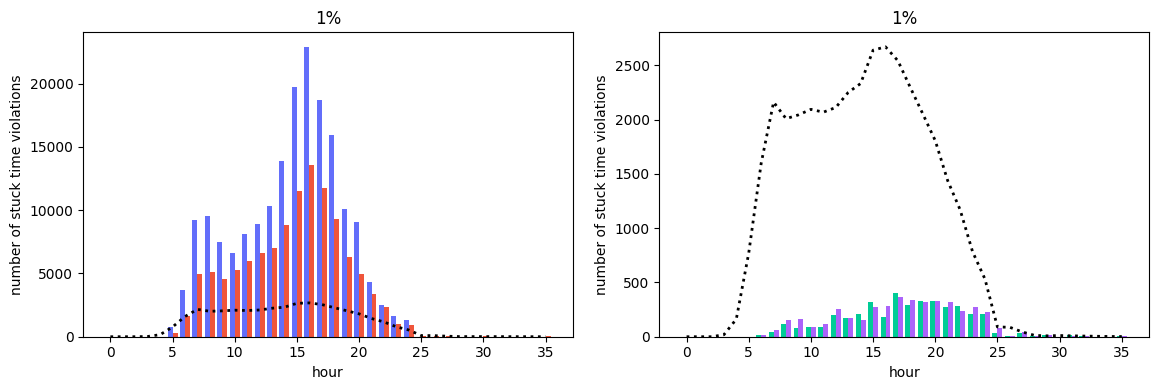

In [546]:

x = df_t['hour']
width = 0.4

fig, axs = plt.subplots(1, 2, sharex=True)
axs[0].bar(x-width/2, df_t3["case_1_1pct"], width,  label = "case 1: alpha = 1.0, default sT", color = "#636EFA")
axs[0].bar(x+width/2, df_t3["case_2_1pct"], width, label = "case 2: alpha = 0.75, default sT", color = "#EF553B")
axs[0].plot(x, df_t3["case_2_100pct"], ":", color = "black", lw = 2)
axs[0].set_title('1%')
axs[0].set_xlabel('hour')
axs[0].set_ylabel('number of stuck time violations')

axs[1].bar(x-width/2, df_t["case_3_1pct"], width,  label = "case 3: alpha = 1. sT adjusted", color = "#00CC96")
axs[1].bar(x+width/2, df_t["case_4_1pct"], width, label = "case 4: alpha = 0.75, sT adjusted", color = "#AB63FA")
axs[1].plot(x, df_t["case_4_100pct"], ":", color = "black", lw = 2)
axs[1].set_title('1%')


fig.set_size_inches(11.69,4)


#plt.figlegend(loc='lower right',  ncol=3, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.99, -0.20))
plt.tight_layout(w_pad=3)
plt.xlabel("hour")

plt.ylabel("number of stuck time violations")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_per_hour_1pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

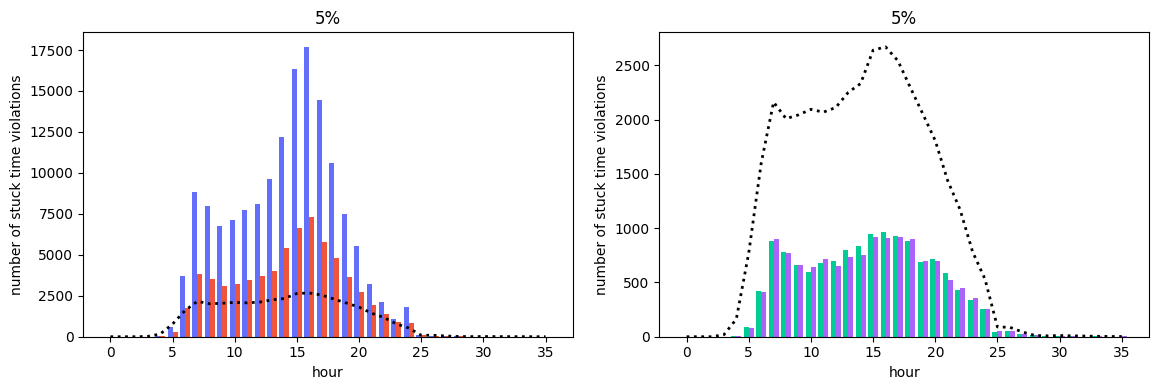

In [547]:

x = df_t['hour']
width = 0.4

fig, axs = plt.subplots(1, 2, sharex=True)


axs[0].bar(x-width/2, df_t3["case_1_5pct"], width, color = "#636EFA")
axs[0].bar(x+width/2, df_t3["case_2_5pct"], width, color = "#EF553B")
axs[0].plot(x, df_t3["case_2_100pct"], ":", color = "black", lw = 2)
axs[0].set_title('5%')
axs[0].set_xlabel('hour')
axs[0].set_ylabel('number of stuck time violations')


axs[1].bar(x-width/2, df_t["case_3_5pct"], width, color = "#00CC96")
axs[1].bar(x+width/2, df_t["case_4_5pct"], width, color = "#AB63FA")
axs[1].plot(x, df_t["case_4_100pct"], ":", color = "black", lw = 2)
axs[1].set_title('5%')



fig.set_size_inches(11.69,4)

plt.tight_layout(w_pad=3)
plt.xlabel("hour")


plt.ylabel("number of stuck time violations")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_per_hour_5_pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

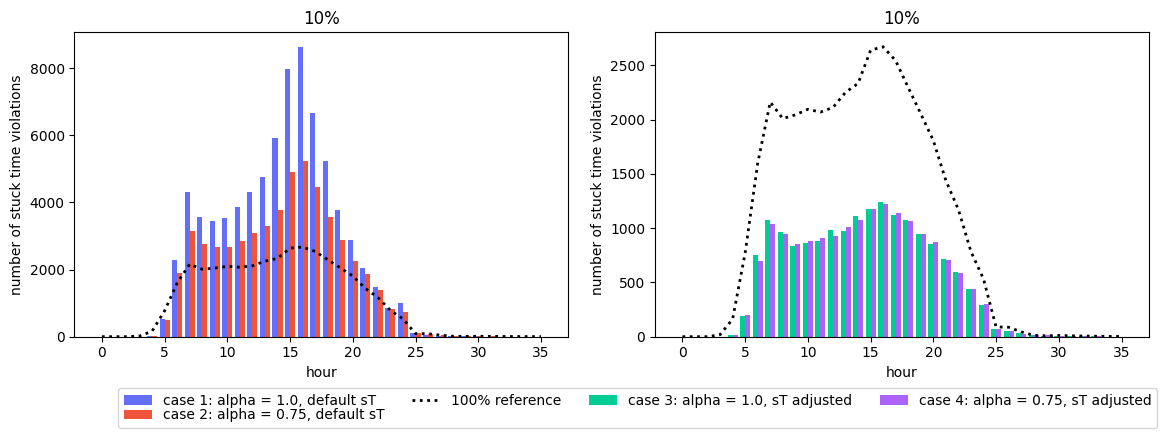

In [548]:

x = df_t['hour']
width = 0.4

fig, axs = plt.subplots(1, 2, sharex=True)

axs[0].bar(x-width/2, df_t3["case_1_10pct"], width, label = "case 1: alpha = 1.0, default sT",  color = "#636EFA")
axs[0].bar(x+width/2, df_t3["case_2_10pct"], width, label = "case 2: alpha = 0.75, default sT", color = "#EF553B")
axs[0].plot(x, df_t3["case_2_100pct"], ":", color = "black", lw = 2)
axs[0].set_title('10%')
axs[0].set_xlabel('hour')
axs[0].set_ylabel('number of stuck time violations')


axs[1].bar(x-width/2, df_t["case_3_10pct"], width, label = "case 3: alpha = 1.0, sT adjusted", color = "#00CC96")
axs[1].bar(x+width/2, df_t["case_4_10pct"], width, label = "case 4: alpha = 0.75, sT adjusted",color = "#AB63FA")
axs[1].plot(x, df_t["case_4_100pct"], ":", color = "black", label= "100% reference", lw = 2)
axs[1].set_title('10%')


fig.set_size_inches(11.69,4)

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.05, fontsize=10, bbox_to_anchor=(1.0, -0.1))
plt.tight_layout(w_pad=3)
plt.xlabel("hour")
plt.ylabel("number of stuck time violations")

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_per_hour_10_pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

/tmp/ipykernel_12529/83176168.py:22: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



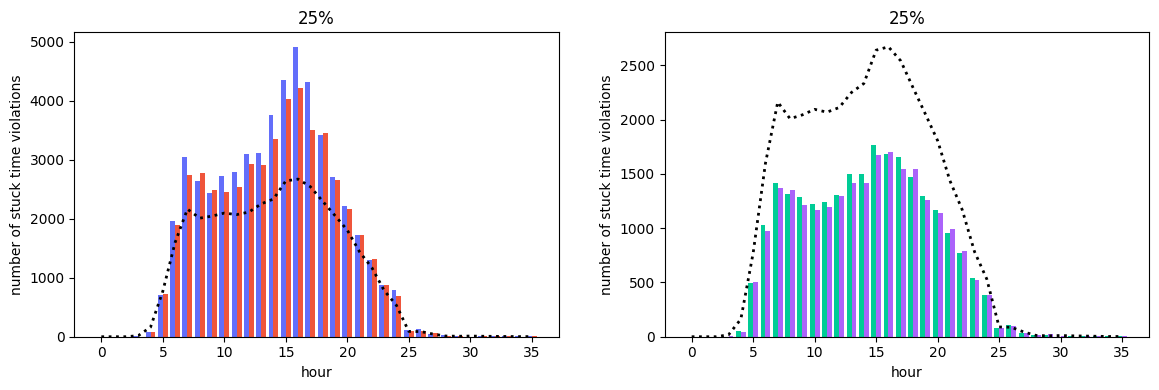

In [549]:

x = df_t3['hour']
width = 0.4

fig, axs = plt.subplots(1, 2, sharex='col')

axs[0].bar(x-width/2, df_t3["case_1_25pct"], width, color = "#636EFA")
axs[0].bar(x+width/2, df_t3["case_2_25pct"], width, color = "#EF553B")
axs[0].plot(x, df_t3["case_2_100pct"], ":", color = "black", lw = 2)
axs[0].set_title('25%')
axs[0].set_xlabel('hour')
axs[0].set_ylabel('number of stuck time violations')

axs[1].bar(x-width/2, df_t["case_3_25pct"], width, color = "#00CC96")
axs[1].bar(x+width/2, df_t["case_4_25pct"], width,  color = "#AB63FA")
axs[1].plot(x, df_t["case_4_100pct"], ":", color = "black", lw = 2)
axs[1].set_title('25%')

fig.set_size_inches(11.69,4)


#plt.figlegend(loc='lower right',  ncol=3, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.99, -0.20))
plt.legend().remove()
plt.tight_layout(w_pad=3)
plt.xlabel("hour")
plt.ylabel("number of stuck time violations")

plt.tight_layout(w_pad=3)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_per_hour_25_pct_case1234.pdf', format = "pdf",bbox_inches='tight')
plt.show()

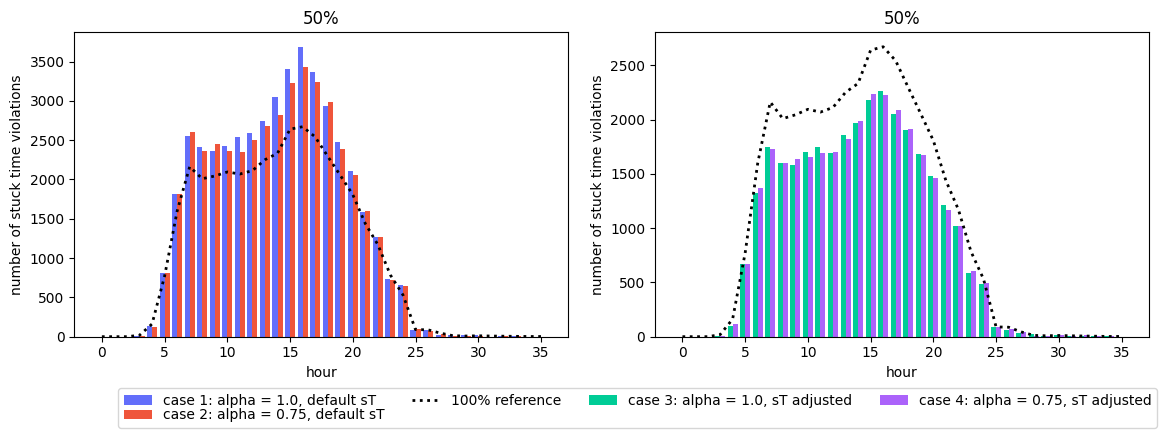

In [550]:

x = df_t3['hour']
width = 0.4

fig, axs = plt.subplots(1, 2, sharex='col')


axs[0].bar(x-width/2, df_t3["case_1_50pct"], width, label = "case 1: alpha = 1.0, default sT", color = "#636EFA")
axs[0].bar(x+width/2, df_t3["case_2_50pct"], width, label = "case 2: alpha = 0.75, default sT",  color = "#EF553B")
axs[0].plot(x, df_t3["case_2_100pct"], ":", color = "black", lw = 2)
axs[0].set_title('50%')
axs[0].set_xlabel('hour')
axs[0].set_ylabel('number of stuck time violations')

axs[1].bar(x-width/2, df_t["case_3_50pct"], width, label = "case 3: alpha = 1.0, sT adjusted", color = "#00CC96")
axs[1].bar(x+width/2, df_t["case_4_50pct"], width , label = "case 4: alpha = 0.75, sT adjusted",  color = "#AB63FA")
axs[1].plot(x, df_t["case_4_100pct"], ":", color = "black", label = "100% reference", lw = 2)
axs[1].set_title('50%')

fig.set_size_inches(11.69,4)



plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.05, fontsize=10, bbox_to_anchor=(1.0, -0.1))
plt.tight_layout(w_pad=3)
plt.xlabel("hour")

plt.ylabel("number of stuck time violations")


plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_per_hour_50_pct_case1234.pdf', format = "pdf",bbox_inches='tight')
plt.show()

In [551]:
linkL_pH = pd.read_csv('/home/lola/Nextcloud/Masterarbeit/03_Outputs/link_leave_1_100pct_per_hour.csv') 

In [552]:
sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ['1.0', '0.75']
sT_default = 30.0

linkL_per_h = pd.DataFrame()

for sampleSize in sample_sizes:
    # calculate adjusted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    if (sampleSize == '100'):
        stuck_times = [sT_default]
    else: 
        stuck_times = [sT_default, sT_adjusted]
    
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"
    factor_scale_to_100 = 100.0 / float(sampleSize)

    for sT in stuck_times:
        for alpha in alpha_values: 
            if((sampleSize == '100') & (alpha == '0.75')):
                continue

            for hour in range(0,36,1):
            
                temp = linkL_pH[(linkL_pH['sample_size'] == sample_size_string) & (linkL_pH['alpha'] == float(alpha)) &  (linkL_pH['stuck_time'] == sT) & (linkL_pH['hour'] == hour) ]['n_Link_Leave']

                if(temp.shape[0] > 0):
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'hour': hour, 'stuck_time': sT, 'avg_link_leave': np.mean(temp)}, index = [0])
                    linkL_per_h = pd.concat([linkL_per_h, df], ignore_index= True)
                else:
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'hour': hour, 'stuck_time': sT, 'avg_link_leave': 0}, index = [0])
                    linkL_per_h = pd.concat([linkL_per_h, df], ignore_index= True)           




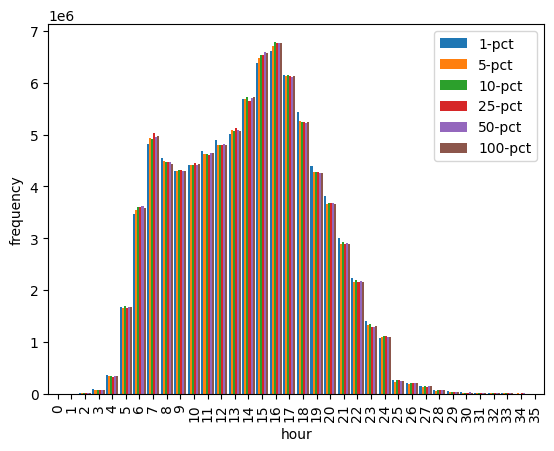

In [553]:
sizes = ["1-pct", "5-pct", "10-pct", "25-pct", "50-pct", "100-pct"]
df = pd.DataFrame(np.c_[(linkL_per_h[(linkL_per_h['sample_size'] == "1-pct") & (linkL_per_h['alpha'] == 1.0)   & (linkL_per_h['stuck_time'] == 30.0)]['avg_link_leave']) ,
               (linkL_per_h[(linkL_per_h['sample_size'] == "5-pct") & (linkL_per_h['alpha'] == 1.0)   & (linkL_per_h['stuck_time'] == 30.0)]['avg_link_leave']) , 
               (linkL_per_h[(linkL_per_h['sample_size'] == "10-pct") & (linkL_per_h['alpha'] == 1.0)   & (linkL_per_h['stuck_time'] == 30.0)]['avg_link_leave']) ,
               (linkL_per_h[(linkL_per_h['sample_size'] == "25-pct") & (linkL_per_h['alpha'] == 1.0)   & (linkL_per_h['stuck_time'] == 30.0)]['avg_link_leave'])  ,
               (linkL_per_h[(linkL_per_h['sample_size'] == "50-pct") & (linkL_per_h['alpha'] == 1.0)   & (linkL_per_h['stuck_time'] == 30.0)]['avg_link_leave']) , 
               (linkL_per_h[(linkL_per_h['sample_size'] == "100-pct") & (linkL_per_h['alpha'] == 1.0)   & (linkL_per_h['stuck_time'] == 30.0)]['avg_link_leave'])  
                 ] 
                , index=sT_per_h["hour"].unique()
               )
fig = df.plot.bar(width = 0.9)
plt.xlabel("hour")
plt.ylabel("frequency")
plt.legend(sizes)
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/Link_leave_events_per_hour_case_1.pdf', format = "pdf",bbox_inches='tight')

## 3b. Link types of stuck time violations

In [ ]:
sTv_pT = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/N_sTV_per_Link_Type.csv")


In [ ]:
sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ['1.0', '0.75']
sT_default = 30.0

sT_per_type = pd.DataFrame()

for sampleSize in sample_sizes:
    # calculate adjusted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    if (sampleSize == '100'):
        stuck_times = [sT_default]
    else: 
        stuck_times = [sT_default, sT_adjusted]
    
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"
    factor_scale_to_100 = 100.0 / float(sampleSize)

    for sT in stuck_times:
        for alpha in alpha_values: 
            if((sampleSize == '100') & (alpha == '0.75')):
                continue

            for link_type in sTv_pT['link_type'].unique():
            
                temp = sTv_pT[(sTv_pT['sample_size'] == sample_size_string) & (sTv_pT['alpha'] == float(alpha)) &  (sTv_pT['stuck_time'] == sT) & (sTv_pT['link_type'] == link_type) ]['n_sTv']*factor_scale_to_100

                if(temp.shape[0] > 0):
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'link_type': link_type, 'stuck_time': sT, 'avg_n_sTv': np.mean(temp)}, index = [0])
                    sT_per_type = pd.concat([sT_per_type, df], ignore_index= True)
                else:
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'link_type': link_type, 'stuck_time': sT, 'avg_n_sTv': 0}, index = [0])
                    sT_per_type = pd.concat([sT_per_type, df], ignore_index= True)           




In [ ]:
sec_ter_res_1pct = np.c_[(sT_per_type[(sT_per_type['sample_size'] == "1-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.primary")]['avg_n_sTv']),
                        (sT_per_type[(sT_per_type['sample_size'] == "1-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.secondary")]['avg_n_sTv']) ,
                         (sT_per_type[(sT_per_type['sample_size'] == "1-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.tertiary")]['avg_n_sTv']),
                         (sT_per_type[(sT_per_type['sample_size'] == "1-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.residential")]['avg_n_sTv'])]


In [ ]:
sec_ter_res_5pct = np.c_[(sT_per_type[(sT_per_type['sample_size'] == "5-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.primary")]['avg_n_sTv']),
                        (sT_per_type[(sT_per_type['sample_size'] == "5-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.secondary")]['avg_n_sTv']) ,
                         (sT_per_type[(sT_per_type['sample_size'] == "5-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.tertiary")]['avg_n_sTv']),
                         (sT_per_type[(sT_per_type['sample_size'] == "5-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.residential")]['avg_n_sTv'])]


In [ ]:
sec_ter_res_10pct = np.c_[(sT_per_type[(sT_per_type['sample_size'] == "10-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.primary")]['avg_n_sTv']) ,
                          (sT_per_type[(sT_per_type['sample_size'] == "10-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.secondary")]['avg_n_sTv']) ,
                         (sT_per_type[(sT_per_type['sample_size'] == "10-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.tertiary")]['avg_n_sTv']),
                         (sT_per_type[(sT_per_type['sample_size'] == "10-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.residential")]['avg_n_sTv'])]


In [ ]:
sec_ter_res_25pct = np.c_[(sT_per_type[(sT_per_type['sample_size'] == "25-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.primary")]['avg_n_sTv']) ,
                          (sT_per_type[(sT_per_type['sample_size'] == "25-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.secondary")]['avg_n_sTv']) ,
                         (sT_per_type[(sT_per_type['sample_size'] == "25-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.tertiary")]['avg_n_sTv']),
                         (sT_per_type[(sT_per_type['sample_size'] == "25-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.residential")]['avg_n_sTv'])]


In [ ]:
sec_ter_res_50pct = np.c_[(sT_per_type[(sT_per_type['sample_size'] == "50-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.primary")]['avg_n_sTv']),
                            (sT_per_type[(sT_per_type['sample_size'] == "50-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.secondary")]['avg_n_sTv']) ,
                         (sT_per_type[(sT_per_type['sample_size'] == "50-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.tertiary")]['avg_n_sTv']),
                         (sT_per_type[(sT_per_type['sample_size'] == "50-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.residential")]['avg_n_sTv'])]


In [ ]:
sec_ter_res_100pct = np.c_[(sT_per_type[(sT_per_type['sample_size'] == "100-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.primary")]['avg_n_sTv']),
                           (sT_per_type[(sT_per_type['sample_size'] == "100-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.secondary")]['avg_n_sTv']) ,
                         (sT_per_type[(sT_per_type['sample_size'] == "100-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.tertiary")]['avg_n_sTv']),
                         (sT_per_type[(sT_per_type['sample_size'] == "100-pct") & (sT_per_type['alpha'] == 1.0)   & (sT_per_type['stuck_time'] == 30.0) & (sT_per_type['link_type'] == "highway.residential")]['avg_n_sTv'])]


### Plot

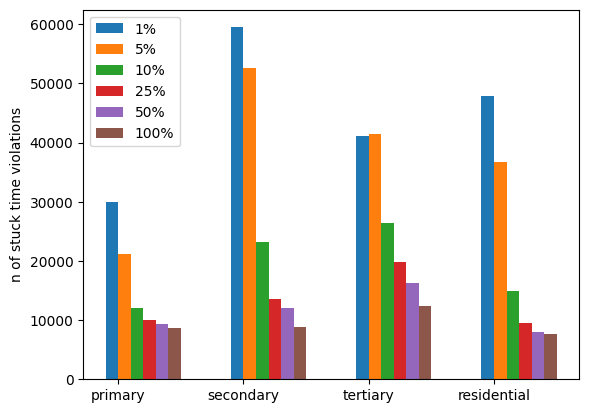

In [ ]:

road_types = ['primary','secondary', 'tertiary', 'residential'] # categories

# Bar width and x locations
w, x = 0.1, np.arange(len(road_types))

fig, ax = plt.subplots()
ax.bar(x - 3*w/6, sec_ter_res_1pct[0], width=w, label='1%')
ax.bar(x + 3*w/6, sec_ter_res_5pct[0], width=w, label='5%')
ax.bar(x + 9*w/6, sec_ter_res_10pct[0], width=w, label='10%')
ax.bar(x + 15*w/6, sec_ter_res_25pct[0], width=w, label='25%')
ax.bar(x + 21*w/6, sec_ter_res_50pct[0], width=w, label='50%')
ax.bar(x + 27*w/6, sec_ter_res_100pct[0], width=w, label='100%')


ax.set_xticks(x)
ax.set_xticklabels(road_types)
ax.set_ylabel('n of stuck time violations')
ax.legend()
fig.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/stuck_time_violations_link_type_case_1.pdf', format = "pdf",bbox_inches='tight')


## 4. Number of link leave events

### Iteration 500

In [ ]:
# import data 
lLe = pd.DataFrame(pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/link_leave_1_100pct.csv"))


In [ ]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

lLe_case1_it500 = []
lLe_case2_it500 = []
lLe_case3_it500 = []
lLe_case4_it500 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"
    factor_scale_to_100 = 100.0 / float(sampleSize)

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                lLe_case2_it500.append(np.mean(lLe[(lLe["sample_size"]== sample_size_string) & (lLe["alpha"]==1.0) & (lLe["stuck_time"]==sT_default) & (lLe["global_seed"]=="default")]["n_link_leave_events"])*factor_scale_to_100)
                # case 4
                lLe_case4_it500.append(np.mean(lLe[(lLe["sample_size"]== sample_size_string) & (lLe["alpha"]==1.0) & (lLe["stuck_time"]==sT_adjusted) & (lLe["global_seed"]=="default")]["n_link_leave_events"])*factor_scale_to_100)
            else:
                #case 2
                lLe_case2_it500.append(np.mean(lLe[(lLe["sample_size"]== sample_size_string) & (lLe["alpha"]==float(alpha)) & (lLe["stuck_time"]==sT_default) & (lLe["global_seed"]=="default")]["n_link_leave_events"])*factor_scale_to_100)
                # case 4
                lLe_case4_it500.append(np.mean(lLe[(lLe["sample_size"]== sample_size_string) & (lLe["alpha"]==float(alpha)) & (lLe["stuck_time"]==sT_adjusted) & (lLe["global_seed"]=="default")]["n_link_leave_events"])*factor_scale_to_100)
        else:
            lLe_case1_it500.append(np.mean(lLe[(lLe["sample_size"]==sample_size_string) & (lLe["alpha"]==float(alpha)) & (lLe["stuck_time"]==sT_default) & (lLe["global_seed"]=="default")]["n_link_leave_events"])*factor_scale_to_100)
            lLe_case3_it500.append(np.mean(lLe[(lLe["sample_size"]==sample_size_string) & (lLe["alpha"]==float(alpha)) & (lLe["stuck_time"]==sT_adjusted) & (lLe["global_seed"]=="default")]["n_link_leave_events"])*factor_scale_to_100)

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
lLe_case5_it500 = []
for sampleSize in sample_sizes_rGS:
    size = sampleSize[:1]
    factor_scale_to_100 = 100.0 / float(size)

    lLe_case5_it500.append(np.mean(lLe[(lLe["sample_size"]==sampleSize) & (lLe["alpha"]==1) & (lLe["stuck_time"]==30.0) & (lLe['global_seed'].str.contains("rnd"))]["n_link_leave"])*factor_scale_to_100)

# Calculate values for case 6
#sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
#lLe_case6_it0 = []
#for sampleSize in sample_sizes_dq:
#    lLe_case6_it0.append(np.mean(lLe[(lLe["sample_size"]==sampleSize)]["n_link_leave"])*factor_scale_to_100)

In [ ]:
sampleSizes = ['1', '5', '10', '25', '50', '100']
max_case1 = []
max_case2 = []
max_case3 = []
max_case4 = []

min_case1 = []
min_case2 = []
min_case3 = []
min_case4 = []

for sampleSize in sampleSizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted

    factor_scale_to_100 = 100.0 / float(sampleSize)

    sample_size_string = sampleSize + "-pct"
    if (float(sampleSize) >= 25 ):
        max_case1.append(0)
        max_case2.append(0)
        max_case3.append(0)
        max_case4.append(0)

        min_case1.append(0)
        min_case2.append(0)
        min_case3.append(0)
        min_case4.append(0) 

    else: 
        maximum_case1 = max_case1.append(np.max(lLe[(lLe["sample_size"]==sample_size_string) & (lLe["alpha"]==1.0) & (lLe["stuck_time"]==sT_default) & (lLe["global_seed"]=="default")]["n_link_leave_events"]) * factor_scale_to_100 - lLe_case1_it500[sampleSizes.index(sampleSize)])
        maximum_case3 = max_case3.append(np.max(lLe[(lLe["sample_size"]==sample_size_string) & (lLe["alpha"]==1.0) & (lLe["stuck_time"]==sT_adjusted) & (lLe["global_seed"]=="default")]["n_link_leave_events"]) * factor_scale_to_100 - lLe_case3_it500[sampleSizes.index(sampleSize)])

        maximum_case2 = max_case2.append(np.max(lLe[(lLe["sample_size"]==sample_size_string) & (lLe["alpha"]==0.75) & (lLe["stuck_time"]==sT_default) & (lLe["global_seed"]=="default")]["n_link_leave_events"]) * factor_scale_to_100 - lLe_case2_it500[sampleSizes.index(sampleSize)])
        maximum_case4 = max_case4.append(np.max(lLe[(lLe["sample_size"]==sample_size_string) & (lLe["alpha"]==0.75) & (lLe["stuck_time"]==sT_adjusted) & (lLe["global_seed"]=="default")]["n_link_leave_events"]) * factor_scale_to_100 - lLe_case4_it500[sampleSizes.index(sampleSize)])

        minimum_case1 = min_case1.append(lLe_case1_it500[sampleSizes.index(sampleSize)] - np.min(lLe[(lLe["sample_size"]==sample_size_string) & (lLe["alpha"]==1.0) & (lLe["stuck_time"]==sT_default) & (lLe["global_seed"]=="default")]["n_link_leave_events"]) * factor_scale_to_100 )
        minimum_case3 = min_case3.append(lLe_case3_it500[sampleSizes.index(sampleSize)] - np.min(lLe[(lLe["sample_size"]==sample_size_string) & (lLe["alpha"]==1.0) & (lLe["stuck_time"]==sT_adjusted) & (lLe["global_seed"]=="default")]["n_link_leave_events"]) * factor_scale_to_100  )

        minimum_case2 = min_case2.append( lLe_case2_it500[sampleSizes.index(sampleSize)] - np.min(lLe[(lLe["sample_size"]==sample_size_string) & (lLe["alpha"]==0.75) & (lLe["stuck_time"]==sT_default) & (lLe["global_seed"]=="default")]["n_link_leave_events"]) * factor_scale_to_100 )
        minimum_case4 = min_case4.append( lLe_case4_it500[sampleSizes.index(sampleSize)] - np.min(lLe[(lLe["sample_size"]==sample_size_string) & (lLe["alpha"]==0.75) & (lLe["stuck_time"]==sT_adjusted) & (lLe["global_seed"]=="default")]["n_link_leave_events"]) * factor_scale_to_100)




In [ ]:
lLe_case_1_4_it500 = pd.DataFrame({'case_1': lLe_case1_it500,'max_case_1': max_case1, 'min_case_1': min_case1,
                                    'case_2': lLe_case2_it500, 'max_case_2': max_case2, 'min_case_2': min_case2,
                                    'case_3': lLe_case3_it500, 'max_case_3': max_case3,  'min_case_3': min_case3,
                                      'case_4': lLe_case4_it500, 'max_case_4': max_case4,  'min_case_4': min_case4,
                                      })
lLe_case_1_4_it500 = lLe_case_1_4_it500.round(2)
# , 'case_6': lLe_case6_it500
lLe_case_5_6_it500 = pd.DataFrame({'case_5': lLe_case5_it500})
lLe_case_5_6_it500 = lLe_case_5_6_it500.round(2)

In [ ]:
percentage_case1 =[]
percentage_case2 =[]
percentage_case3 =[]
percentage_case4 =[]
for size in range(0,6,1):
    percentage_case1.append((sTv_case_1_4_it500['case_1'][size] / lLe_case_1_4_it500['case_1'][size]) * 100)
    percentage_case2.append((sTv_case_1_4_it500['case_2'][size] / lLe_case_1_4_it500['case_2'][size]) * 100)
    percentage_case3.append((sTv_case_1_4_it500['case_3'][size] / lLe_case_1_4_it500['case_3'][size]) * 100)
    percentage_case4.append((sTv_case_1_4_it500['case_4'][size] / lLe_case_1_4_it500['case_4'][size]) * 100)




In [ ]:
first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
percentage_stuckTime_Link_Leave = pd.DataFrame({'sample_size': first_column, 'case_1': percentage_case1, 'case_2': percentage_case2, 'case_3': percentage_case3, 'case_4': percentage_case4 })
percentage_stuckTime_Link_Leave = percentage_stuckTime_Link_Leave.round(4)

In [ ]:
percentage_stuckTime_Link_Leave

,sample_size,case_1,case_2,case_3,case_4
0,1-pct,0.2135,0.1352,0.0047,0.0051
1,5-pct,0.1809,0.0810,0.0158,0.0155
2,10-pct,0.0909,0.0648,0.0204,0.0202
3,25-pct,0.0627,0.0586,0.0286,0.0280
4,50-pct,0.0540,0.0525,0.0366,0.0366
5,100-pct,0.0445,0.0445,0.0445,0.0445


In [ ]:
percentage_stuckTime_Link_Leave.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/percentage_stuck_time_violations_to_link_leave.csv", sep = ";", index = False)

## 5. Average travel times

### Iteration 0

In [ ]:
avg_trav_times0 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/avg_trav_time_all_1_100pct_samples_it0.csv")

In [ ]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

aTt_case1_it0 = []
aTt_case2_it0 = []
aTt_case3_it0 = []
aTt_case4_it0 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                aTt_case2_it0.append(np.mean(avg_trav_times0[(avg_trav_times0["sample_size"]== sample_size_string) & (avg_trav_times0["alpha"]==1.0) & (avg_trav_times0["stuck_time"]==sT_default) & (avg_trav_times0["global_seed"]=="default")]["avg_trav_time"]))
                # case 4
                aTt_case4_it0.append(np.mean(avg_trav_times0[(avg_trav_times0["sample_size"]== sample_size_string) & (avg_trav_times0["alpha"]==1.0) & (avg_trav_times0["stuck_time"]==sT_adjusted) & (avg_trav_times0["global_seed"]=="default")]["avg_trav_time"]))
            else:
                #case 2
                aTt_case2_it0.append(np.mean(avg_trav_times0[(avg_trav_times0["sample_size"]== sample_size_string) & (avg_trav_times0["alpha"]==float(alpha)) & (avg_trav_times0["stuck_time"]==sT_default) & (avg_trav_times0["global_seed"]=="default")]["avg_trav_time"]))
                # case 4
                aTt_case4_it0.append(np.mean(avg_trav_times0[(avg_trav_times0["sample_size"]== sample_size_string) & (avg_trav_times0["alpha"]==float(alpha)) & (avg_trav_times0["stuck_time"]==sT_adjusted) & (avg_trav_times0["global_seed"]=="default")]["avg_trav_time"]))
        else:
            aTt_case1_it0.append(np.mean(avg_trav_times0[(avg_trav_times0["sample_size"]==sample_size_string) & (avg_trav_times0["alpha"]==float(alpha)) & (avg_trav_times0["stuck_time"]==sT_default) & (avg_trav_times0["global_seed"]=="default")]["avg_trav_time"]))
            aTt_case3_it0.append(np.mean(avg_trav_times0[(avg_trav_times0["sample_size"]==sample_size_string) & (avg_trav_times0["alpha"]==float(alpha)) & (avg_trav_times0["stuck_time"]==sT_adjusted) & (avg_trav_times0["global_seed"]=="default")]["avg_trav_time"]))

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
aTt_case5_it0 = []
for sampleSize in sample_sizes_rGS:
    aTt_case5_it0.append(np.mean(avg_trav_times0[(avg_trav_times0["sample_size"]==sampleSize) & (avg_trav_times0["alpha"]==1) & (avg_trav_times0["stuck_time"]==30.0) & (avg_trav_times0['global_seed'].str.contains("rnd"))]["avg_trav_time"]))

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
aTt_case6_it0 = []
for sampleSize in sample_sizes_dq:
    aTt_case6_it0.append(np.mean(avg_trav_times0[(avg_trav_times0["sample_size"]==sampleSize)]["avg_trav_time"]))

In [ ]:
aTt1pct_max_it0 = np.max(avg_trav_times0[((avg_trav_times0["sample_size"]== "1-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]) - aTt_case1_it0[0]
aTt1pct_min_it0 = aTt_case1_it0[0] - np.min(avg_trav_times0[((avg_trav_times0["sample_size"]== "1-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"])


In [ ]:
aTt5pct_max_it0 = np.max(avg_trav_times0[((avg_trav_times0["sample_size"]== "5-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]) - aTt_case1_it0[1]
aTt5pct_min_it0 = aTt_case1_it0[1] - np.min(avg_trav_times0[((avg_trav_times0["sample_size"]== "5-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"])


In [ ]:
aTt10pct_max_it0 = np.max(avg_trav_times0[((avg_trav_times0["sample_size"]== "10-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]) - aTt_case1_it0[2]
aTt10pct_min_it0 = aTt_case1_it0[2] - np.min(avg_trav_times0[((avg_trav_times0["sample_size"]== "10-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"])


In [ ]:
aTt_case_1_4_it0 = pd.DataFrame({'case_1': aTt_case1_it0, 'case_2': aTt_case2_it0, 'case_3': aTt_case3_it0, 'case_4': aTt_case4_it0})
aTt_case_1_4_it0 = aTt_case_1_4_it0.round(2)
aTt_case_5_6_it0 = pd.DataFrame({'case_5': aTt_case5_it0})
aTt_case_5_6_it0 = aTt_case_5_6_it0.round(2)

#### Plot

/tmp/ipykernel_12529/1028939757.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  axs.errorbar([1,5,10], aTt_case_1_4_it0['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=5 )


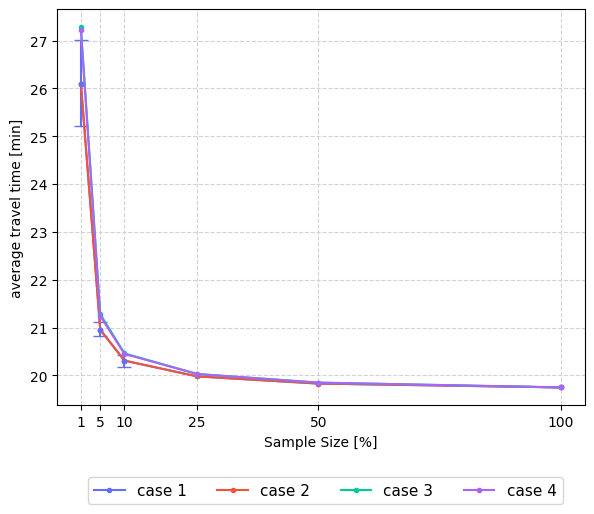

In [ ]:
lower_error =  [aTt1pct_min_it0, aTt5pct_min_it0, aTt10pct_min_it0]
upper_error =  [aTt1pct_max_it0, aTt5pct_max_it0, aTt10pct_max_it0]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

x = [1, 5, 10, 25, 50, 100]

fig, axs = plt.subplots(1, 1, sharey = True)
axs.plot(x, aTt_case_1_4_it0['case_1'], '.-', color = "#636EFA", label = "case 1" )
axs.errorbar([1,5,10], aTt_case_1_4_it0['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=5 )

axs.plot(x, aTt_case_1_4_it0['case_2'],'.-',  color = "#EF553B",  label = "case 2")
axs.plot(x, aTt_case_1_4_it0['case_3'], '.-',  color = "#00CC96", label = "case 3")
axs.plot(x ,aTt_case_1_4_it0['case_4'], '.-',  color = "#AB63FA",  label = "case 4")
#axs.plot([50,100] ,aTt_case_5_6_it0['case_6'], '.-',  color = "#FFA15A",  label = "case 6")


fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average travel time [min]")
plt.xlabel("Sample Size [%]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_time_it0_pyplot_case_14_6.pdf', format = "pdf",bbox_inches='tight')


fig_aTt_it500 = go.Figure()
fig_aTt_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_it0['case_1'],
                                              error_y=dict(
                    type='data',
                    symmetric=False,
                    array=[aTt1pct_max_it0, aTt5pct_max_it0,aTt10pct_max_it0, 0 , 0, 0],
                    arrayminus=[aTt1pct_min_it0, aTt5pct_min_it0,aTt10pct_min_it0, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0') )
fig_aTt_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_it0['case_2'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))

fig_aTt_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_it0['case_3'],
                    mode='lines+markers',
                    name='alpha = 1, sT adjusted', 
                    #fill = dict(color = "#3366CC")) )
fig_aTt_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_it0['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig_aTt_it500.add_trace(go.Scatter(x=[50, 100], y= aTt_case_5_6_it0['case_6'],
                    mode='lines+markers',
                    name='agents cloned'))

fig_aTt_it500.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='average travel time [min]')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    legend=dict(
    yanchor="top",
    y=1.0,
    xanchor="left",
    x=0.811
    ), 
    font = dict(size = 18)
)
fig_aTt_it500.show()

plotly.io.write_image(fig_aTt_it500, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_time_1_100_with_min_max_errorbar_it0.pdf",  width= 1296.0, engine = "kaleido")

#### Table

In [ ]:
first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
aTt_it0_values_as_table = pd.DataFrame({'sample_size': first_column, 'case_1': aTt_case_1_4_it0['case_1'], 'case_2': aTt_case_1_4_it0['case_2'], 'case_3': aTt_case_1_4_it0['case_3'],
                                    'case_4': aTt_case_1_4_it0['case_4'], 'case_5': [aTt_case_5_6_it0['case_5'][0],aTt_case_5_6_it0['case_5'][1], "-", "-", "-", "-"]})
aTt_it0_values_as_table.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/aTt_it0_plot_values_as_table.csv", sep = ";", index = False)

#### Boxplot

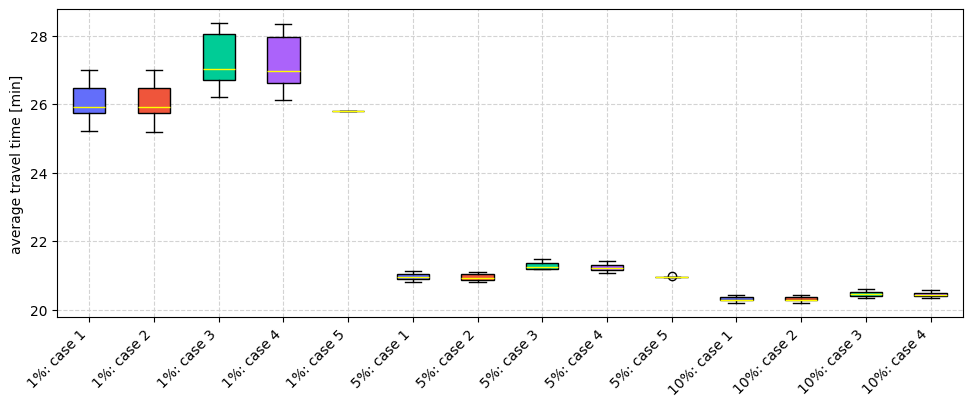

In [ ]:
# Generates grouped aTtta
aTt_bp_1pct = [avg_trav_times0[(avg_trav_times0['sample_size']=="1-pct") & (avg_trav_times0['alpha']== 1)  & (avg_trav_times0['stuck_time']== 30.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times0[(avg_trav_times0['sample_size']=="1-pct") & (avg_trav_times0['alpha']== 0.75)  & (avg_trav_times0['stuck_time']== 30.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times0[(avg_trav_times0['sample_size']=="1-pct") & (avg_trav_times0['alpha']== 1)  & (avg_trav_times0['stuck_time']== 3000.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times0[(avg_trav_times0['sample_size']=="1-pct") & (avg_trav_times0['alpha']== 0.75)  & (avg_trav_times0['stuck_time']== 3000.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times0[(avg_trav_times0['sample_size']=="1-pct") & (avg_trav_times0['global_seed'].str.contains('rnd')) ]['avg_trav_time']]
      
aTt_bp_5pct = [avg_trav_times0[(avg_trav_times0['sample_size']=="5-pct") & (avg_trav_times0['alpha']== 1)  & (avg_trav_times0['stuck_time']== 30.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
             avg_trav_times0[(avg_trav_times0['sample_size']=="5-pct") & (avg_trav_times0['alpha']== 0.75)  & (avg_trav_times0['stuck_time']== 30.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
             avg_trav_times0[(avg_trav_times0['sample_size']=="5-pct") & (avg_trav_times0['alpha']== 1)  & (avg_trav_times0['stuck_time']== 600.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times0[(avg_trav_times0['sample_size']=="5-pct") & (avg_trav_times0['alpha']== 0.75)  & (avg_trav_times0['stuck_time']== 600.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times0[(avg_trav_times0['sample_size']=="5-pct") & (avg_trav_times0['global_seed'].str.contains('rnd')) ]['avg_trav_time']]

aTt_bp_10pct = [avg_trav_times0[(avg_trav_times0['sample_size']=="10-pct") & (avg_trav_times0['alpha']== 1)  & (avg_trav_times0['stuck_time']== 30.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
             avg_trav_times0[(avg_trav_times0['sample_size']=="10-pct") & (avg_trav_times0['alpha']== 0.75)  & (avg_trav_times0['stuck_time']== 30.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
             avg_trav_times0[(avg_trav_times0['sample_size']=="10-pct") & (avg_trav_times0['alpha']== 1)  & (avg_trav_times0['stuck_time']== 300.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time'],
             avg_trav_times0[(avg_trav_times0['sample_size']=="10-pct") & (avg_trav_times0['alpha']== 0.75)  & (avg_trav_times0['stuck_time']== 300.0) & (avg_trav_times0['global_seed']== "default") ]['avg_trav_time']]

# Combines two data groups into a dataset
data = aTt_bp_1pct + aTt_bp_5pct + aTt_bp_10pct 
 
colors = ["#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA"]
labels=["1%: case 1", "1%: case 2","1%: case 3", "1%: case 4","1%: case 5",
                                "5%: case 1", "5%: case 2","5%: case 3", "5%: case 4","5%: case 5",
                                 "10%: case 1", "10%: case 2","10%: case 3", "10%: case 4" ]
fig, ax = plt.subplots()
ax.set_ylabel('average travel time [min]')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_time_boxplot_pyplot_1_10_pct_it0.pdf', format = "pdf",bbox_inches='tight')


aTt1pct_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "1-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt1pct_sCf_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "1-pct") & (avg_trav_times0["alpha"] == 0.75) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt1pct_sT_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "1-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 3000.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt1pct_sCf_sT_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "1-pct") & (avg_trav_times0["alpha"] == 0.75) & (avg_trav_times0["stuck_time"] == 3000.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt1pct_rGs_it0 = avg_trav_times0[((avg_trav_times0["sample_size"] == "1-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0['global_seed'].str.contains("rnd")))]["avg_trav_time"]



aTt5pct_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "5-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt5pct_sCf_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "5-pct") & (avg_trav_times0["alpha"] == 0.75) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt5pct_sT_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "5-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 600.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt5pct_sCf_sT_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "5-pct") & (avg_trav_times0["alpha"] == 0.75) & (avg_trav_times0["stuck_time"] == 600.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt5pct_rGs_it0 = avg_trav_times0[((avg_trav_times0["sample_size"] == "5-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0['global_seed'].str.contains("rnd")))]["avg_trav_time"]



aTt10pct_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "10-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt10pct_sCf_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "10-pct") & (avg_trav_times0["alpha"] == 0.75) & (avg_trav_times0["stuck_time"] == 30.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt10pct_sT_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "10-pct") & (avg_trav_times0["alpha"] == 1.0) & (avg_trav_times0["stuck_time"] == 300.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]

aTt10pct_sCf_sT_it0 = avg_trav_times0[((avg_trav_times0["sample_size"]== "10-pct") & (avg_trav_times0["alpha"] == 0.75) & (avg_trav_times0["stuck_time"] == 300.0) & (avg_trav_times0["global_seed"]=="default"))]["avg_trav_time"]


fig_aTt_bp_it0 = go.Figure()


fig_aTt_bp_it0.add_trace(go.Box( y= aTt1pct_it0, quartilemethod="linear",legendgroup = "1-pct", name="1-pct", marker_color="#3366CC", showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt1pct_sCf_it0, quartilemethod="linear", legendgroup = "1-pct", name="1-pct, alpha = 0.75", marker_color="#DC3912",  showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt1pct_sT_it0, quartilemethod="linear", legendgroup = "1-pct", name="1-pct, sT adjusted", marker_color="#FF9900", showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt1pct_sCf_sT_it0, quartilemethod="linear",legendgroup = "1-pct", name="1-pct, sT adjusted, alpha = 0.75", marker_color="#109618", showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt1pct_rGs_it0, quartilemethod="linear", legendgroup = "1-pct", name="1-pct, random gS", marker_color="#990099", showlegend= False))

fig_aTt_bp_it0.add_trace(go.Box( y= aTt5pct_it0, quartilemethod="linear",legendgroup = "5-pct", name="5-pct, alpha = 1", marker_color="#3366CC", showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt5pct_sCf_it0, quartilemethod="linear",legendgroup = "5-pct", name="5-pct, alpha = 0.75",  marker_color="#DC3912", showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt5pct_sT_it0, quartilemethod="linear",legendgroup = "5-pct", name="5-pct, sT adjusted", marker_color="#FF9900", showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt5pct_sCf_sT_it0, quartilemethod="linear",legendgroup = "5-pct", name="5-pct, sT adjusted, alpha = 0.75", marker_color="#109618", showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt5pct_rGs_it0, quartilemethod="linear", legendgroup = "5-pct", name="5-pct, random gS",marker_color="#990099", showlegend= False))

fig_aTt_bp_it0.add_trace(go.Box( y= aTt10pct_it0, quartilemethod="linear",legendgroup = "10-pct", name="10-pct, alpha = 1", marker_color="#3366CC", showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt10pct_sCf_it0, quartilemethod="linear", legendgroup = "10-pct", name="10-pct, alpha = 0.75",  marker_color="#DC3912", showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt10pct_sT_it0, quartilemethod="linear",legendgroup = "10-pct", name="10-pct, sT adjusted", marker_color="#FF9900", showlegend= False))
fig_aTt_bp_it0.add_trace(go.Box( y= aTt10pct_sCf_sT_it0, quartilemethod="linear", legendgroup = "10-pct", name="10-pct, sT adjusted, alpha = 0.75", marker_color="#109618", showlegend= False))



fig_aTt_bp_it0.update_traces(boxpoints='all', jitter=0)
fig_aTt_bp_it0.update_layout(
    xaxis=dict(title=dict(text='Sample-Size')),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        zeroline=True,
        dtick=0.5,
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='Average travel times [min]')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    hovermode="x"
)
fig_aTt_bp_it0.show()

plotly.io.write_image(fig_aTt_bp_it0, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_time_1_10_boxplot_it0.pdf",  width= 1296.0, engine = "kaleido")

### Iteration 500

In [ ]:
aTt_it500 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/avg_trav_time_and_dist_1_to_100_pct_samples.csv")

In [ ]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

aTt_case1_it500 = []
aTt_case2_it500 = []
aTt_case3_it500 = []
aTt_case4_it500 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                aTt_case2_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==1.0) & (aTt_it500["stuck_time"]==sT_default) & (aTt_it500["global_seed"]=="default")]["aTt_min"]))
                # case 4
                aTt_case4_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==1.0) & (aTt_it500["stuck_time"]==sT_adjusted) & (aTt_it500["global_seed"]=="default")]["aTt_min"]))
            else:
                #case 2
                aTt_case2_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_default) & (aTt_it500["global_seed"]=="default")]["aTt_min"]))
                # case 4
                aTt_case4_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_adjusted) & (aTt_it500["global_seed"]=="default")]["aTt_min"]))
        else:
            aTt_case1_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_default) & (aTt_it500["global_seed"]=="default")]["aTt_min"]))
            aTt_case3_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_adjusted) & (aTt_it500["global_seed"]=="default")]["aTt_min"]))

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
aTt_case5_it500 = []
for sampleSize in sample_sizes_rGS:
    aTt_case5_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sampleSize) & (aTt_it500["alpha"]==1) & (aTt_it500["stuck_time"]==30.0) & (aTt_it500['global_seed'].str.contains("rnd"))]["aTt_min"]))

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
aTt_case6_it500 = []
for sampleSize in sample_sizes_dq:
    aTt_case6_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sampleSize)]["aTt_min"]))

In [ ]:
aTt1pct_max = np.max(aTt_it500[((aTt_it500["sample_size"]== "1-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_min"]) - aTt_case1_it500[0]
aTt1pct_min = aTt_case1_it500[0] - np.min(aTt_it500[((aTt_it500["sample_size"]== "1-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_min"])

aTt5pct_max = np.max(aTt_it500[((aTt_it500["sample_size"]== "5-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_min"]) - aTt_case1_it500[1]
aTt5pct_min = aTt_case1_it500[1] - np.min(aTt_it500[((aTt_it500["sample_size"]== "5-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_min"])

aTt10pct_max = np.max(aTt_it500[((aTt_it500["sample_size"]== "10-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_min"]) - aTt_case1_it500[2]
aTt10pct_min = aTt_case1_it500[2] - np.min(aTt_it500[((aTt_it500["sample_size"]== "10-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_min"])


In [ ]:
aTt_case_1_4_it500 = pd.DataFrame({'case_1': aTt_case1_it500, 'case_2': aTt_case2_it500, 'case_3': aTt_case3_it500, 'case_4': aTt_case4_it500})
aTt_case_1_4_it500 = aTt_case_1_4_it500.round(2)
aTt_case_5_6_it500 = pd.DataFrame({'case_5': aTt_case5_it500})
aTt_case_5_6_it500 = aTt_case_5_6_it500.round(2)

#### Plot

/tmp/ipykernel_12529/1438807539.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  axs.errorbar([1,5,10], aTt_case_1_4_it500['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=5 )


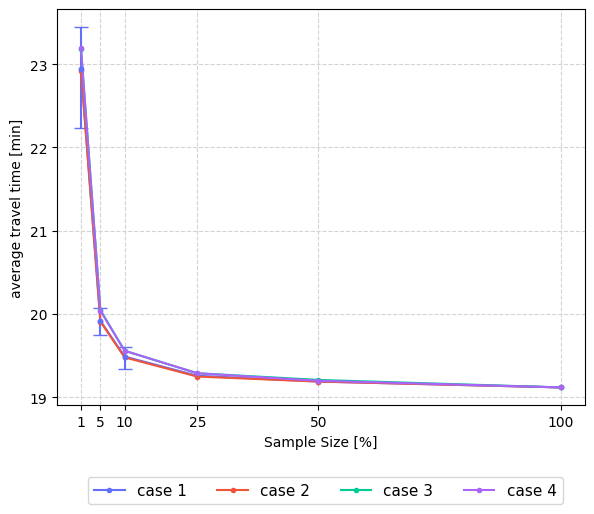

In [ ]:
lower_error =  [aTt1pct_min, aTt5pct_min, aTt10pct_min]
upper_error =  [aTt1pct_max, aTt5pct_max, aTt10pct_max]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

x = [1, 5, 10, 25, 50, 100]

fig, axs = plt.subplots(1, 1, sharey = True)
axs.plot(x, aTt_case_1_4_it500['case_1'], '.-', color = "#636EFA", label = "case 1" )
axs.errorbar([1,5,10], aTt_case_1_4_it500['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=5 )

axs.plot(x, aTt_case_1_4_it500['case_2'],'.-',  color = "#EF553B",  label = "case 2")
axs.plot(x, aTt_case_1_4_it500['case_3'], '.-',  color = "#00CC96", label = "case 3")
axs.plot(x ,aTt_case_1_4_it500['case_4'], '.-',  color = "#AB63FA",  label = "case 4")
#axs.plot([50,100] ,aTt_case_5_6_it500['case_6'], '.-',  color = "#FFA15A",  label = "case 6")


fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average travel time [min]")
plt.xlabel("Sample Size [%]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_time_it500_pyplot_case_14_6.pdf', format = "pdf",bbox_inches='tight')


fig_aTt_it500 = go.Figure()
fig_aTt_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_it500['case_1'],
                                              error_y=dict(
                    type='data', # value of error bar given in data coordinates
                    symmetric=False,
                    array=[aTt1pct_max, aTt5pct_max,aTt10pct_max, 0 , 0, 0],
                    arrayminus=[aTt1pct_min, aTt5pct_min,aTt10pct_min, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0', 
                    )
                    )
fig_aTt_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_it500['case_2'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))

fig_aTt_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_it500['case_3'],
                    mode='lines+markers',
                    name='alpha = 1, sT adjusted', 
                    )
                    )
fig_aTt_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_it500['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig_aTt_it500.add_trace(go.Scatter(x=[50, 100], y= aTt_case_5_6_it500['case_6'],
                    mode='lines+markers',
                    name='agents cloned'))


fig_aTt_it500.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='average travel time [min]')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    legend=dict(
    yanchor="top",
    y=1.0,
    xanchor="left",
    x=0.811
    ), 
    font = dict(size = 18)
)
fig_aTt_it500.show()

plotly.io.write_image(fig_aTt_it500, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_time_1_100_with_min_max_errorbar_it500.pdf",  width= 1296.0, engine = "kaleido")

#### table

In [ ]:
first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
aTt_it500_values_as_table = pd.DataFrame({'sample_size': first_column, 'case_1': aTt_case_1_4_it500['case_1'], 'case_2': aTt_case_1_4_it500['case_2'], 'case_3': aTt_case_1_4_it500['case_3'],
                                    'case_4': aTt_case_1_4_it500['case_4'], 'case_5': [aTt_case_5_6_it500['case_5'][0],aTt_case_5_6_it500['case_5'][1], "-", "-", "-", "-"]})
aTt_it500_values_as_table.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/aTt_it500_plot_values_as_table.csv", sep = ";", index = False)

#### for mode car

In [ ]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

aTt_case1_car_it500 = []
aTt_case2_car_it500 = []
aTt_case3_car_it500 = []
aTt_case4_car_it500 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                aTt_case2_car_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==1.0) & (aTt_it500["stuck_time"]==sT_default) & (aTt_it500["global_seed"]=="default")]["aTt_car_min"]))
                # case 4
                aTt_case4_car_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==1.0) & (aTt_it500["stuck_time"]==sT_adjusted) & (aTt_it500["global_seed"]=="default")]["aTt_car_min"]))
            else:
                #case 2
                aTt_case2_car_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_default) & (aTt_it500["global_seed"]=="default")]["aTt_car_min"]))
                # case 4
                aTt_case4_car_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_adjusted) & (aTt_it500["global_seed"]=="default")]["aTt_car_min"]))
        else:
            aTt_case1_car_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_default) & (aTt_it500["global_seed"]=="default")]["aTt_car_min"]))
            aTt_case3_car_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_adjusted) & (aTt_it500["global_seed"]=="default")]["aTt_car_min"]))

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
aTt_case5_car_it500 = []
for sampleSize in sample_sizes_rGS:
    aTt_case5_car_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sampleSize) & (aTt_it500["alpha"]==1) & (aTt_it500["stuck_time"]==30.0) & (aTt_it500['global_seed'].str.contains("rnd"))]["aTt_car_min"]))

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
aTt_case6_car_it500 = []
for sampleSize in sample_sizes_dq:
    aTt_case6_car_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sampleSize)]["aTt_car_min"]))

In [ ]:
aTt1pct_max = np.max(aTt_it500[((aTt_it500["sample_size"]== "1-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_car_min"]) - aTt_case1_car_it500[0]
aTt1pct_min = aTt_case1_car_it500[0] - np.min(aTt_it500[((aTt_it500["sample_size"]== "1-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_car_min"])

aTt5pct_max = np.max(aTt_it500[((aTt_it500["sample_size"]== "5-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_car_min"]) - aTt_case1_car_it500[1]
aTt5pct_min = aTt_case1_car_it500[1] - np.min(aTt_it500[((aTt_it500["sample_size"]== "5-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_car_min"])

aTt10pct_max = np.max(aTt_it500[((aTt_it500["sample_size"]== "10-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_car_min"]) - aTt_case1_car_it500[2]
aTt10pct_min = aTt_case1_car_it500[2] - np.min(aTt_it500[((aTt_it500["sample_size"]== "10-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_car_min"])


In [ ]:
aTt_case_1_4_car_it500 = pd.DataFrame({'case_1': aTt_case1_car_it500, 'case_2': aTt_case2_car_it500, 'case_3': aTt_case3_car_it500, 'case_4': aTt_case4_car_it500})
aTt_case_1_4_car_it500 = aTt_case_1_4_car_it500.round(2)
aTt_case_5_6_car_it500 = pd.DataFrame({'case_5': aTt_case5_car_it500, 'case_6': aTt_case6_car_it500})
aTt_case_5_6_car_it500 = aTt_case_5_6_car_it500.round(2)


fig_aTt_car_it500 = go.Figure()
fig_aTt_car_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_car_it500['case_1'],
                                              error_y=dict(
                    type='data',
                    symmetric=False,
                    array=[aTt1pct_max, aTt5pct_max,aTt10pct_max, 0 , 0, 0],
                    arrayminus=[aTt1pct_min, aTt5pct_min,aTt10pct_min, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0', 
                    )
                    )
fig_aTt_car_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_car_it500['case_2'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))

fig_aTt_car_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_car_it500['case_3'],
                    mode='lines+markers',
                    name='alpha = 1, sT adjusted', 
                    )
                    )
fig_aTt_car_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_car_it500['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig_aTt_car_it500.add_trace(go.Scatter(x=[50, 100], y= aTt_case_5_6_car_it500['case_6'],
                    mode='lines+markers',
                    name='agents cloned'))

fig_aTt_car_it500.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='average travel time [min]')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    legend=dict(
    yanchor="top",
    y=1.0,
    xanchor="left",
    x=0.811
    ), 
    font = dict(size = 18)

)
fig_aTt_car_it500.show()

plotly.io.write_image(fig_aTt_car_it500, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_time_car_1_100_with_min_max_errorbar_it500.pdf",  width= 1296.0, engine = "kaleido")

#### table

first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
aTt_it500_values_as_table = pd.DataFrame({'sample_size': first_column, 'case_1': aTt_case_1_4_it500['case_1'], 'case_2': aTt_case_1_4_it500['case_2'], 'case_3': aTt_case_1_4_it500['case_3'],
                                    'case_4': aTt_case_1_4_it500['case_4'], 'case_5': [aTt_case_5_6_it500['case_5'][0],aTt_case_5_6_it500['case_5'][1], "-", "-", "-", "-"], 'case_6': ["-", "-", "-", "-",aTt_case_5_6_it500['case_6'][0] ,aTt_case_5_6_it500['case_6'][1] ]})
aTt_it500_values_as_table.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/aTt_it500_plot_values_as_table.csv", sep = ";", index = False)

#### for mode ride 

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

aTt_case1_ride_it500 = []
aTt_case2_ride_it500 = []
aTt_case3_ride_it500 = []
aTt_case4_ride_it500 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"
    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                aTt_case2_ride_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==1.0) & (aTt_it500["stuck_time"]==sT_default) & (aTt_it500["global_seed"]=="default")]["aTt_ride_min"]))
                aTt_case4_ride_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==1.0) & (aTt_it500["stuck_time"]==sT_adjusted) & (aTt_it500["global_seed"]=="default")]["aTt_ride_min"]))
            else:
                aTt_case2_ride_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_default) & (aTt_it500["global_seed"]=="default")]["aTt_ride_min"]))
                aTt_case4_ride_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]== sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_adjusted) & (aTt_it500["global_seed"]=="default")]["aTt_ride_min"]))
        else:
            aTt_case1_ride_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_default) & (aTt_it500["global_seed"]=="default")]["aTt_ride_min"]))
            aTt_case3_ride_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sample_size_string) & (aTt_it500["alpha"]==float(alpha)) & (aTt_it500["stuck_time"]==sT_adjusted) & (aTt_it500["global_seed"]=="default")]["aTt_ride_min"]))

sample_sizes_rGS = ['1-pct', '5-pct']
aTt_case5_ride_it500 = []
for sampleSize in sample_sizes_rGS:
    aTt_case5_ride_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sampleSize) & (aTt_it500["alpha"]==1) & (aTt_it500["stuck_time"]==30.0) & (aTt_it500['global_seed'].str.contains("rnd"))]["aTt_ride_min"]))

sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
aTt_case6_ride_it500 = []
for sampleSize in sample_sizes_dq:
    aTt_case6_ride_it500.append(np.mean(aTt_it500[(aTt_it500["sample_size"]==sampleSize)]["aTt_ride_min"]))

aTt1pct_max = np.max(aTt_it500[((aTt_it500["sample_size"]== "1-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_ride_min"]) - aTt_case1_ride_it500[0]
aTt1pct_min = aTt_case1_ride_it500[0] - np.min(aTt_it500[((aTt_it500["sample_size"]== "1-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_ride_min"])

aTt5pct_max = np.max(aTt_it500[((aTt_it500["sample_size"]== "5-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_ride_min"]) - aTt_case1_ride_it500[1]
aTt5pct_min = aTt_case1_ride_it500[1] - np.min(aTt_it500[((aTt_it500["sample_size"]== "5-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_ride_min"])

aTt10pct_max = np.max(aTt_it500[((aTt_it500["sample_size"]== "10-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_ride_min"]) - aTt_case1_ride_it500[2]
aTt10pct_min = aTt_case1_ride_it500[2] - np.min(aTt_it500[((aTt_it500["sample_size"]== "10-pct") & (aTt_it500["alpha"] == 1.0) & (aTt_it500["stuck_time"] == 30.0) & (aTt_it500["global_seed"]=="default"))]["aTt_ride_min"])


aTt_case_1_4_ride_it500 = pd.DataFrame({'case_1': aTt_case1_ride_it500, 'case_2': aTt_case2_ride_it500, 'case_3': aTt_case3_ride_it500, 'case_4': aTt_case4_ride_it500})
aTt_case_1_4_ride_it500 = aTt_case_1_4_ride_it500.round(2)
aTt_case_5_6_ride_it500 = pd.DataFrame({'case_5': aTt_case5_ride_it500, 'case_6': aTt_case6_ride_it500})
aTt_case_5_6_ride_it500 = aTt_case_5_6_ride_it500.round(2)


fig_aTt_ride_it500 = go.Figure()
fig_aTt_ride_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_ride_it500['case_1'],
                                              error_y=dict(
                    type='data',
                    symmetric=False,
                    array=[aTt1pct_max, aTt5pct_max,aTt10pct_max, 0 , 0, 0],
                    arrayminus=[aTt1pct_min, aTt5pct_min,aTt10pct_min, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0', 
                    )
                    )
fig_aTt_ride_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_ride_it500['case_2'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))

fig_aTt_ride_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_ride_it500['case_3'],
                    mode='lines+markers',
                    name='alpha = 1, sT adjusted', 
                    )
                    )
fig_aTt_ride_it500.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= aTt_case_1_4_ride_it500['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig_aTt_ride_it500.add_trace(go.Scatter(x=[50, 100], y= aTt_case_5_6_ride_it500['case_6'],
                    mode='lines+markers',
                    name='agents cloned'))


fig_aTt_ride_it500.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='average travel time [min]')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    legend=dict(
    yanchor="top",
    y=1.0,
    xanchor="left",
    x=0.811
    ), 
    font = dict(size = 18)

)
fig_aTt_ride_it500.show()

#### Boxplot

In [ ]:
avg_trav_times = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/avg_trav_time_1_to_100_pct_samples.csv")


aTt1pct = avg_trav_times[((avg_trav_times["sample_size"]== "1-pct") & (avg_trav_times["alpha"] == 1.0) & (avg_trav_times["stuck_time"] == 30.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt1pct_sCf = avg_trav_times[((avg_trav_times["sample_size"]== "1-pct") & (avg_trav_times["alpha"] == 0.75) & (avg_trav_times["stuck_time"] == 30.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt1pct_sT = avg_trav_times[((avg_trav_times["sample_size"]== "1-pct") & (avg_trav_times["alpha"] == 1.0) & (avg_trav_times["stuck_time"] == 3000.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt1pct_sCf_sT = avg_trav_times[((avg_trav_times["sample_size"]== "1-pct") & (avg_trav_times["alpha"] == 0.75) & (avg_trav_times["stuck_time"] == 3000.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt1pct_rGs = avg_trav_times[((avg_trav_times["sample_size"] == "1-pct") & (avg_trav_times["alpha"] == 1.0) & (avg_trav_times["stuck_time"] == 30.0) & (avg_trav_times['global_seed'].str.contains("rnd")))]["avg_trav_time"]


aTt5pct = avg_trav_times[((avg_trav_times["sample_size"]== "5-pct") & (avg_trav_times["alpha"] == 1.0) & (avg_trav_times["stuck_time"] == 30.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt5pct_sCf = avg_trav_times[((avg_trav_times["sample_size"]== "5-pct") & (avg_trav_times["alpha"] == 0.75) & (avg_trav_times["stuck_time"] == 30.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt5pct_sT = avg_trav_times[((avg_trav_times["sample_size"]== "5-pct") & (avg_trav_times["alpha"] == 1.0) & (avg_trav_times["stuck_time"] == 600.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt5pct_sCf_sT = avg_trav_times[((avg_trav_times["sample_size"]== "5-pct") & (avg_trav_times["alpha"] == 0.75) & (avg_trav_times["stuck_time"] == 600.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt5pct_rGs = avg_trav_times[((avg_trav_times["sample_size"] == "5-pct") & (avg_trav_times["alpha"] == 1.0) & (avg_trav_times["stuck_time"] == 30.0) & (avg_trav_times['global_seed'].str.contains("rnd")))]["avg_trav_time"]


aTt10pct = avg_trav_times[((avg_trav_times["sample_size"]== "10-pct") & (avg_trav_times["alpha"] == 1.0) & (avg_trav_times["stuck_time"] == 30.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt10pct_sCf = avg_trav_times[((avg_trav_times["sample_size"]== "10-pct") & (avg_trav_times["alpha"] == 0.75) & (avg_trav_times["stuck_time"] == 30.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt10pct_sT = avg_trav_times[((avg_trav_times["sample_size"]== "10-pct") & (avg_trav_times["alpha"] == 1.0) & (avg_trav_times["stuck_time"] == 300.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]

aTt10pct_sCf_sT = avg_trav_times[((avg_trav_times["sample_size"]== "10-pct") & (avg_trav_times["alpha"] == 0.75) & (avg_trav_times["stuck_time"] == 300.0) & (avg_trav_times["global_seed"]=="default"))]["avg_trav_time"]


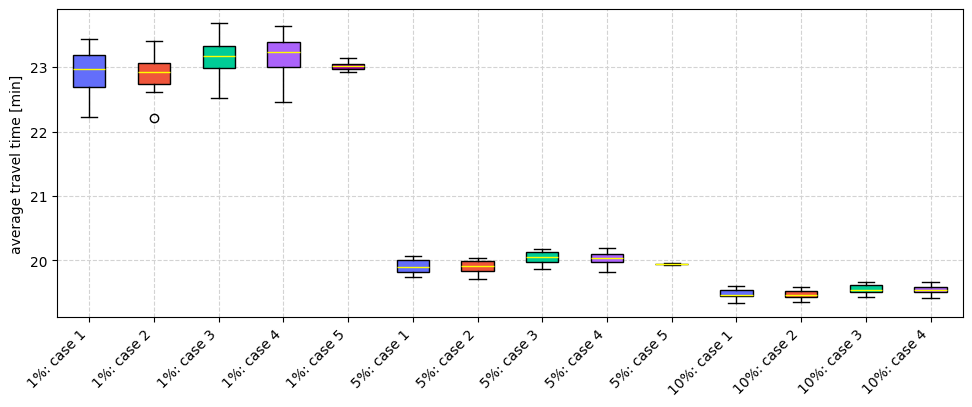

In [ ]:
# Generates grouped aTtta
aTt_bp_1pct = [avg_trav_times[(avg_trav_times['sample_size']=="1-pct") & (avg_trav_times['alpha']== 1)  & (avg_trav_times['stuck_time']== 30.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times[(avg_trav_times['sample_size']=="1-pct") & (avg_trav_times['alpha']== 0.75)  & (avg_trav_times['stuck_time']== 30.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times[(avg_trav_times['sample_size']=="1-pct") & (avg_trav_times['alpha']== 1)  & (avg_trav_times['stuck_time']== 3000.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times[(avg_trav_times['sample_size']=="1-pct") & (avg_trav_times['alpha']== 0.75)  & (avg_trav_times['stuck_time']== 3000.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times[(avg_trav_times['sample_size']=="1-pct") & (avg_trav_times['global_seed'].str.contains('rnd')) ]['avg_trav_time']]
      
aTt_bp_5pct = [avg_trav_times[(avg_trav_times['sample_size']=="5-pct") & (avg_trav_times['alpha']== 1)  & (avg_trav_times['stuck_time']== 30.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
             avg_trav_times[(avg_trav_times['sample_size']=="5-pct") & (avg_trav_times['alpha']== 0.75)  & (avg_trav_times['stuck_time']== 30.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
             avg_trav_times[(avg_trav_times['sample_size']=="5-pct") & (avg_trav_times['alpha']== 1)  & (avg_trav_times['stuck_time']== 600.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times[(avg_trav_times['sample_size']=="5-pct") & (avg_trav_times['alpha']== 0.75)  & (avg_trav_times['stuck_time']== 600.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
              avg_trav_times[(avg_trav_times['sample_size']=="5-pct") & (avg_trav_times['global_seed'].str.contains('rnd')) ]['avg_trav_time']]

aTt_bp_10pct = [avg_trav_times[(avg_trav_times['sample_size']=="10-pct") & (avg_trav_times['alpha']== 1)  & (avg_trav_times['stuck_time']== 30.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
             avg_trav_times[(avg_trav_times['sample_size']=="10-pct") & (avg_trav_times['alpha']== 0.75)  & (avg_trav_times['stuck_time']== 30.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
             avg_trav_times[(avg_trav_times['sample_size']=="10-pct") & (avg_trav_times['alpha']== 1)  & (avg_trav_times['stuck_time']== 300.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time'],
             avg_trav_times[(avg_trav_times['sample_size']=="10-pct") & (avg_trav_times['alpha']== 0.75)  & (avg_trav_times['stuck_time']== 300.0) & (avg_trav_times['global_seed']== "default") ]['avg_trav_time']]

# Combines two data groups into a dataset
data = aTt_bp_1pct + aTt_bp_5pct + aTt_bp_10pct 
 
colors = ["#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA"]
labels=["1%: case 1", "1%: case 2","1%: case 3", "1%: case 4","1%: case 5",
                                "5%: case 1", "5%: case 2","5%: case 3", "5%: case 4","5%: case 5",
                                 "10%: case 1", "10%: case 2","10%: case 3", "10%: case 4" ]
fig, ax = plt.subplots()
ax.set_ylabel('average travel time [min]')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_time_boxplot_pyplot_1_10_pct_it500.pdf', format = "pdf",bbox_inches='tight')

fig_aTt_bp_it500 = go.Figure()


fig_aTt_bp_it500.add_trace(go.Box( y= aTt1pct, quartilemethod="linear",legendgroup = "1-pct", name="1-pct", marker_color="#3366CC", showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt1pct_sCf, quartilemethod="linear", legendgroup = "1-pct", name="1-pct, alpha = 0.75", marker_color="#DC3912",  showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt1pct_sT, quartilemethod="linear", legendgroup = "1-pct", name="1-pct, sT adjusted", marker_color="#FF9900", showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt1pct_sCf_sT, quartilemethod="linear",legendgroup = "1-pct", name="1-pct, sT adjusted, alpha = 0.75", marker_color="#109618", showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt1pct_rGs, quartilemethod="linear", legendgroup = "1-pct", name="1-pct, random gS", marker_color="#990099", showlegend= False))

fig_aTt_bp_it500.add_trace(go.Box( y= aTt5pct, quartilemethod="linear",legendgroup = "5-pct", name="5-pct, alpha = 1", marker_color="#3366CC", showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt5pct_sCf, quartilemethod="linear",legendgroup = "5-pct", name="5-pct, alpha = 0.75",  marker_color="#DC3912", showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt5pct_sT, quartilemethod="linear",legendgroup = "5-pct", name="5-pct, sT adjusted", marker_color="#FF9900", showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt5pct_sCf_sT, quartilemethod="linear",legendgroup = "5-pct", name="5-pct, sT adjusted, alpha = 0.75", marker_color="#109618", showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt5pct_rGs, quartilemethod="linear", legendgroup = "5-pct", name="5-pct, random gS",marker_color="#990099", showlegend= False))

fig_aTt_bp_it500.add_trace(go.Box( y= aTt10pct, quartilemethod="linear",legendgroup = "10-pct", name="10-pct, alpha = 1", marker_color="#3366CC", showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt10pct_sCf, quartilemethod="linear", legendgroup = "10-pct", name="10-pct, alpha = 0.75",  marker_color="#DC3912", showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt10pct_sT, quartilemethod="linear",legendgroup = "10-pct", name="10-pct, sT adjusted", marker_color="#FF9900", showlegend= False))
fig_aTt_bp_it500.add_trace(go.Box( y= aTt10pct_sCf_sT, quartilemethod="linear", legendgroup = "10-pct", name="10-pct, sT adjusted, alpha = 0.75", marker_color="#109618", showlegend= False))



fig_aTt_bp_it500.update_traces(boxpoints='all', jitter=0)
fig_aTt_bp_it500.update_layout(
    xaxis=dict(title=dict(text='Sample-Size')),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        zeroline=True,
        dtick=0.5,
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='Average travel times [min]')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    hovermode="x"
)
fig_aTt_bp_it500.show()

plotly.io.write_image(fig_aTt_bp_it500, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_time_1_10_boxplot_it500.pdf",  width= 1296.0, engine = "kaleido")

## 5a. Average travel times by hour of departure and case

In [512]:
aTt_pH = pd.read_csv('/home/lola/Nextcloud/Masterarbeit/03_Outputs/avg_trav_time_per_hour_1_to_100_pct.csv')


In [513]:
sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ['1.0', '0.75']
sT_default = 30.0

aTt_per_h = pd.DataFrame()

for sampleSize in sample_sizes:
    # calculate adjusted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    if (sampleSize == '100'):
        stuck_times = [sT_default]
    else: 
        stuck_times = [sT_default, sT_adjusted]
    
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"
    factor_scale_to_100 = 100.0 / float(sampleSize)

    for sT in stuck_times:
        for alpha in alpha_values: 
            if((sampleSize == '100') & (alpha == '0.75')):
                continue

            for hour in range(0,36,1):
            
                temp = aTt_pH[(aTt_pH['sample_size'] == sample_size_string) & (aTt_pH['alpha'] == float(alpha)) &  (aTt_pH['stuck_time'] == sT) 
                              & (aTt_pH['hour'] == hour) & (aTt_pH['global_seed'] == "default") ]['aTt_pH_min']

                if(temp.shape[0] > 0):
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'hour': hour, 'stuck_time': sT,
                                        'aTt': np.mean(temp), 'global_seed': 'default'}, index = [0])
                    aTt_per_h = pd.concat([aTt_per_h, df], ignore_index= True)
                else:
                    print("temp has shape[0] of 0")
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'hour': hour, 'stuck_time': sT,
                                        'aTt': 0, 'global_seed': 'default'}, index = [0])
                    aTt_per_h = pd.concat([aTt_per_h, df], ignore_index= True)  

In [514]:
sample_sizes = ['1', '5']
alpha_values = ['1.0']
sT_default = 30.0

aTt_per_h_rgs = pd.DataFrame()

for sampleSize in sample_sizes:
        sample_size_string = sampleSize + "-pct"
        for alpha in alpha_values: 
            for hour in range(0,36,1):
            
                temp = aTt_pH[(aTt_pH['sample_size'] == sample_size_string) & (aTt_pH['alpha'] == float(alpha)) &  (aTt_pH['stuck_time'] == 30.0) 
                              & (aTt_pH['hour'] == hour) & (aTt_pH['global_seed'].str.contains("rnd")) ]['aTt_pH_min']

                if(temp.shape[0] > 0):
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'hour': hour, 'stuck_time': 30.0,
                                        'aTt': np.mean(temp), 'global_seed': 'rnd'}, index = [0])
                    aTt_per_h_rgs = pd.concat([aTt_per_h_rgs, df], ignore_index= True)
                else:
                    print("temp has shape[0] of 0")
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'hour': hour, 'stuck_time': 30.0,
                                        'aTt': 0, 'global_seed': 'rnd'}, index = [0])
                    aTt_per_h_rgs = pd.concat([aTt_per_h_rgs, df], ignore_index= True)  

In [515]:
df_hour = pd.DataFrame({'hour': aTt_per_h_rgs["hour"].unique()})
dict_rgs = {'case_5_1pct' : aTt_per_h_rgs[(aTt_per_h_rgs['sample_size'] == "1-pct") & (aTt_per_h_rgs['alpha'] == 1.0)   & (aTt_per_h_rgs['stuck_time'] == 30.0)]['aTt'].reset_index(drop=True), 
            'case_5_5pct': aTt_per_h_rgs[(aTt_per_h_rgs['sample_size'] == "5-pct") & (aTt_per_h_rgs['alpha'] == 1.0)   & (aTt_per_h_rgs['stuck_time'] == 30.0)]['aTt'].reset_index(drop= True)}
df_aTtPhc5 = pd.DataFrame(dict_rgs)
df_aTtPhc5 = pd.concat([df_aTtPhc5, df_hour], axis = 1)

In [516]:
df_hour = pd.DataFrame({'hour': aTt_per_h["hour"].unique()})
dict = {'case_3_1pct' : aTt_per_h[(aTt_per_h['sample_size'] == "1-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 3000.0)]['aTt'].reset_index(drop=True), 
        'case_4_1pct': aTt_per_h[(aTt_per_h['sample_size'] == "1-pct") & (aTt_per_h['alpha'] == 0.75)   & (aTt_per_h['stuck_time'] == 3000.0)]['aTt'].reset_index(drop=True),
        'case_3_5pct': aTt_per_h[(aTt_per_h['sample_size'] == "5-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 600.0)]['aTt'].reset_index(drop= True),
        'case_4_5pct':aTt_per_h[(aTt_per_h['sample_size'] == "5-pct") & (aTt_per_h['alpha'] == 0.75)   & (aTt_per_h['stuck_time'] == 600.0)]['aTt'].reset_index(drop = True), 
        'case_3_10pct':  aTt_per_h[(aTt_per_h['sample_size'] == "10-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 300.0)]['aTt'].reset_index(drop=True),
        'case_4_10pct':aTt_per_h[(aTt_per_h['sample_size'] == "10-pct") & (aTt_per_h['alpha'] == 0.75)   & (aTt_per_h['stuck_time'] == 300.0)]['aTt'].reset_index(drop = True), 
        'case_3_25pct':  aTt_per_h[(aTt_per_h['sample_size'] == "25-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 120.0)]['aTt'].reset_index(drop=True),
        'case_4_25pct':aTt_per_h[(aTt_per_h['sample_size'] == "25-pct") & (aTt_per_h['alpha'] == 0.75)   & (aTt_per_h['stuck_time'] == 120.0)]['aTt'].reset_index(drop = True),
        'case_3_50pct':  aTt_per_h[(aTt_per_h['sample_size'] == "50-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 60.0)]['aTt'].reset_index(drop=True),
        'case_4_50pct':aTt_per_h[(aTt_per_h['sample_size'] == "50-pct") & (aTt_per_h['alpha'] == 0.75)   & (aTt_per_h['stuck_time'] == 60.0)]['aTt'].reset_index(drop = True),
        'case_4_100pct':aTt_per_h[(aTt_per_h['sample_size'] == "100-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop = True)}
df_aTtPhc34 = pd.DataFrame(dict)
df_aTtPhc34 = pd.concat([df_aTtPhc34, df_hour], axis = 1)

In [517]:
df_hour = pd.DataFrame({'hour': aTt_per_h["hour"].unique()})
dict = {'case_1_1pct' : aTt_per_h[(aTt_per_h['sample_size'] == "1-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop=True), 
        'case_2_1pct': aTt_per_h[(aTt_per_h['sample_size'] == "1-pct") & (aTt_per_h['alpha'] == 0.75)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop=True),
        'case_1_5pct': aTt_per_h[(aTt_per_h['sample_size'] == "5-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop= True),
        'case_2_5pct':aTt_per_h[(aTt_per_h['sample_size'] == "5-pct") & (aTt_per_h['alpha'] == 0.75)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop = True), 
        'case_1_10pct':  aTt_per_h[(aTt_per_h['sample_size'] == "10-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop=True),
        'case_2_10pct':aTt_per_h[(aTt_per_h['sample_size'] == "10-pct") & (aTt_per_h['alpha'] == 0.75)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop = True), 
        'case_1_25pct':  aTt_per_h[(aTt_per_h['sample_size'] == "25-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop=True),
        'case_2_25pct':aTt_per_h[(aTt_per_h['sample_size'] == "25-pct") & (aTt_per_h['alpha'] == 0.75)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop = True),
        'case_1_50pct':  aTt_per_h[(aTt_per_h['sample_size'] == "50-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop=True),
        'case_2_50pct':aTt_per_h[(aTt_per_h['sample_size'] == "50-pct") & (aTt_per_h['alpha'] == 0.75)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop = True),
        'case_2_100pct':aTt_per_h[(aTt_per_h['sample_size'] == "100-pct") & (aTt_per_h['alpha'] == 1.0)   & (aTt_per_h['stuck_time'] == 30.0)]['aTt'].reset_index(drop = True)}
df_aTtPhc12 = pd.DataFrame(dict)
df_aTtPhc12 = pd.concat([df_aTtPhc12, df_hour], axis = 1)

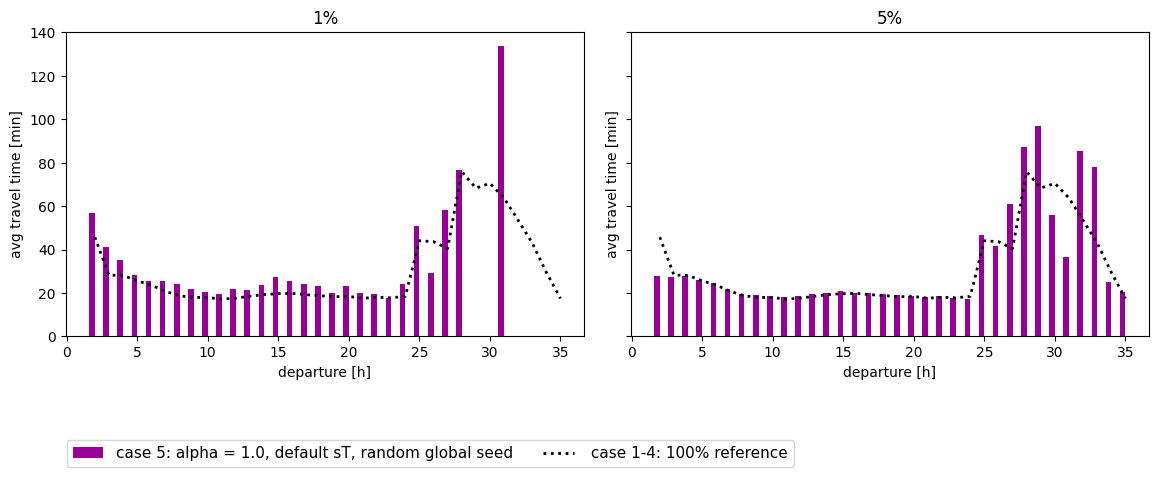

In [521]:
x = df_aTtPhc5['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2, sharex=True, sharey = True)
axs[0].bar(x-width/2, df_aTtPhc5["case_5_1pct"][2:36], width,label = "case 5: alpha = 1.0, default sT, random global seed", color = "#990099")
axs[0].plot(x, df_aTtPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('1%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg travel time [min]')

axs[1].bar(x-width/2, df_aTtPhc5["case_5_5pct"][2:36], width,  color = "#990099")
axs[1].plot(x, df_aTtPhc12["case_2_100pct"][2:36], ":",label =" case 1-4: 100% reference",  color = "black", lw = 2)
axs[1].set_title('5%')



fig.set_size_inches(11.69,4)


plt.figlegend(loc='lower right',  ncol=3, labelspacing=0.25, fontsize=11, bbox_to_anchor=(0.69, -0.20))
plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg travel time [min]")
#plt.yticks(np.arange(10, 140, 10.0))
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_travel_time_per_hour_1_pct_case_5.pdf', format = "pdf",bbox_inches='tight')


plt.show()

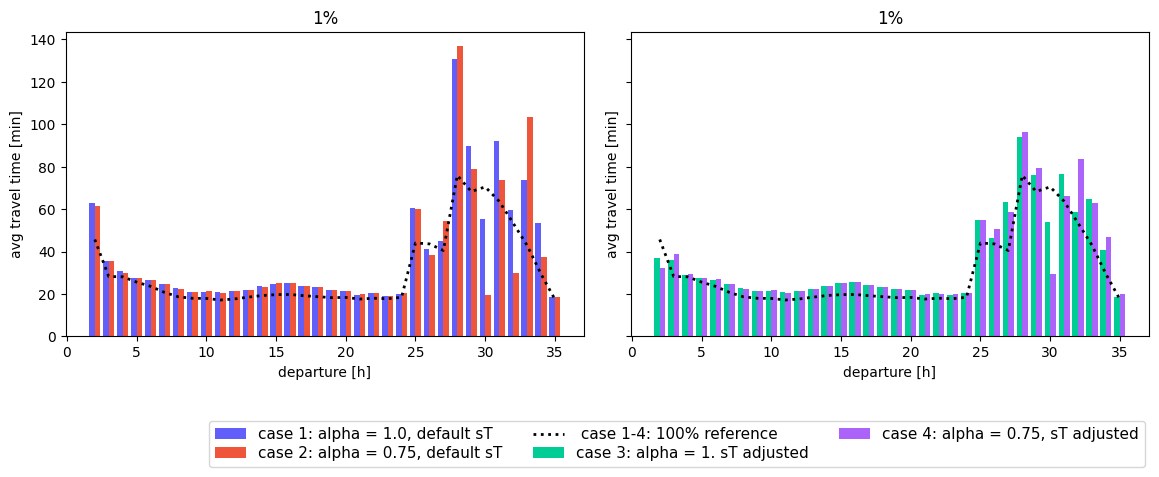

In [520]:
x = df_aTtPhc34['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2, sharex=True, sharey = True)
axs[0].bar(x-width/2, df_aTtPhc12["case_1_1pct"][2:36], width,label = "case 1: alpha = 1.0, default sT", color = "#625EFA")
axs[0].bar(x+width/2, df_aTtPhc12["case_2_1pct"][2:36], width, label = "case 2: alpha = 0.75, default sT", color = "#EF553B")
axs[0].plot(x, df_aTtPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('1%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg travel time [min]')

axs[1].bar(x-width/2, df_aTtPhc34["case_3_1pct"][2:36], width,  label = "case 3: alpha = 1. sT adjusted", color = "#00CC96")
axs[1].bar(x+width/2, df_aTtPhc34["case_4_1pct"][2:36], width, label = "case 4: alpha = 0.75, sT adjusted", color = "#AB63FA")
axs[1].plot(x, df_aTtPhc34["case_4_100pct"][2:36], ":", color = "black", label =" case 1-4: 100% reference",lw = 2)
axs[1].set_title('1%')



fig.set_size_inches(11.69,4)


plt.figlegend(loc='lower right',  ncol=3, labelspacing=0.25, fontsize=11, bbox_to_anchor=(0.99, -0.20))
plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg travel time [min]")
#plt.yticks(np.arange(10, 140, 10.0))
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_travel_time_per_hour_1_pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

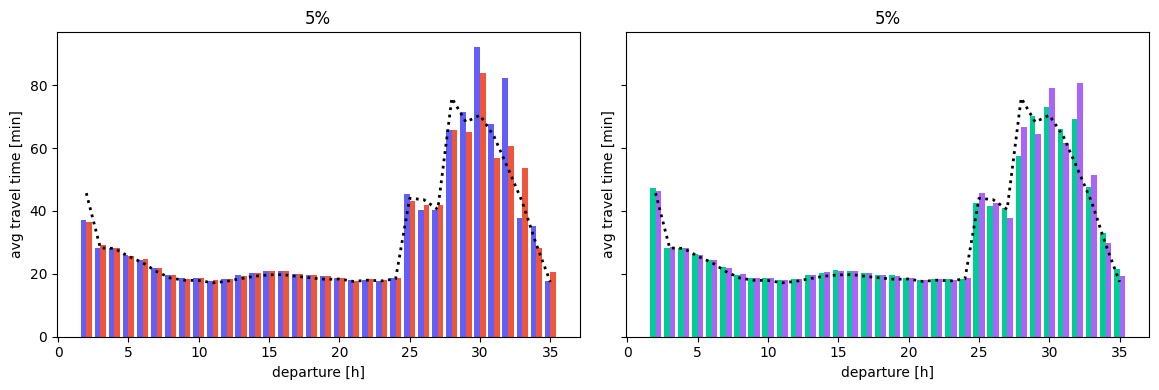

In [ ]:
x = df_aTtPhc34['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2, sharex=True, sharey = True)

axs[0].bar(x-width/2, df_aTtPhc12["case_1_5pct"][2:36], width, label = "case 1: alpha = 1.0, default sT",  color = "#625EFA")
axs[0].bar(x+width/2, df_aTtPhc12["case_2_5pct"][2:36], width, label = "case 2: alpha = 0.75, default sT",  color = "#EF553B")
axs[0].plot(x, df_aTtPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('5%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg travel time [min]')


axs[1].bar(x-width/2, df_aTtPhc34["case_3_5pct"][2:36], width, label = "case 3: alpha = 1. sT adjusted", color = "#00CC96")
axs[1].bar(x+width/2, df_aTtPhc34["case_4_5pct"][2:36], width, label = "case 4: alpha = 0.75, sT adjusted",  color = "#AB63FA")
axs[1].plot(x, df_aTtPhc34["case_4_100pct"][2:36], ":", color = "black",label =" case 1-4: 100-pct reference",  lw = 2)
axs[1].set_title('5%')


fig.set_size_inches(11.69,4)


#plt.figlegend(loc='lower right',  ncol=3, labelspacing=0.25, fontsize=11, bbox_to_anchor=(0.99, -0.20))
plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg travel time [min]")
#plt.yticks(np.arange(10, 140, 10.0))
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_travel_time_per_hour_5_pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

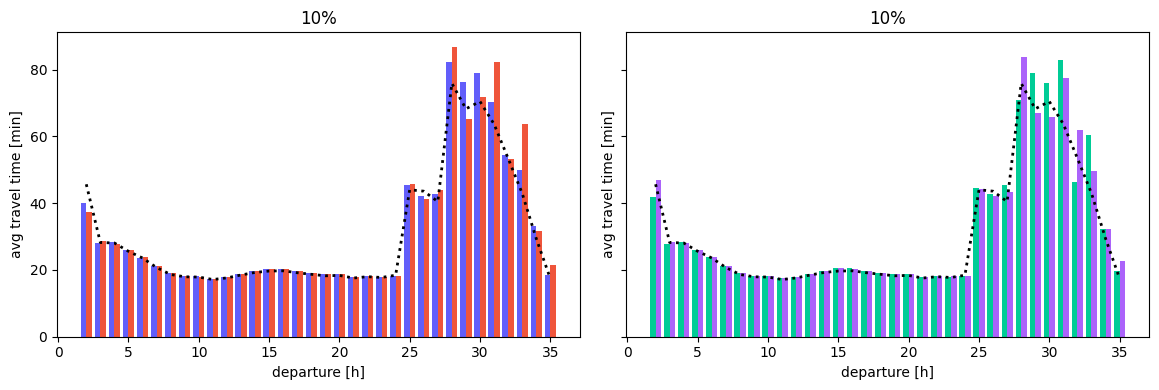

In [ ]:
x = df_aTtPhc34['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2, sharex=True, sharey = True)

axs[0].bar(x-width/2, df_aTtPhc12["case_1_10pct"][2:36], width, color = "#625EFA")
axs[0].bar(x+width/2, df_aTtPhc12["case_2_10pct"][2:36], width , color = "#EF553B")
axs[0].plot(x, df_aTtPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('10%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg travel time [min]')



axs[1].bar(x-width/2, df_aTtPhc34["case_3_10pct"][2:36], width, color = "#00CC96")
axs[1].bar(x+width/2, df_aTtPhc34["case_4_10pct"][2:36], width, color = "#AB63FA")
axs[1].plot(x, df_aTtPhc34["case_4_100pct"][2:36], ":", color = "black", lw = 2)
axs[1].set_title('10%')

fig.set_size_inches(11.69,4)


#plt.figlegend(loc='lower right',  ncol=3, labelspacing=0.25, fontsize=11, bbox_to_anchor=(0.99, -0.10))
plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg travel time [min]")
#plt.yticks(np.arange(10, 140, 10.0))
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_travel_time_per_hour_10_pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

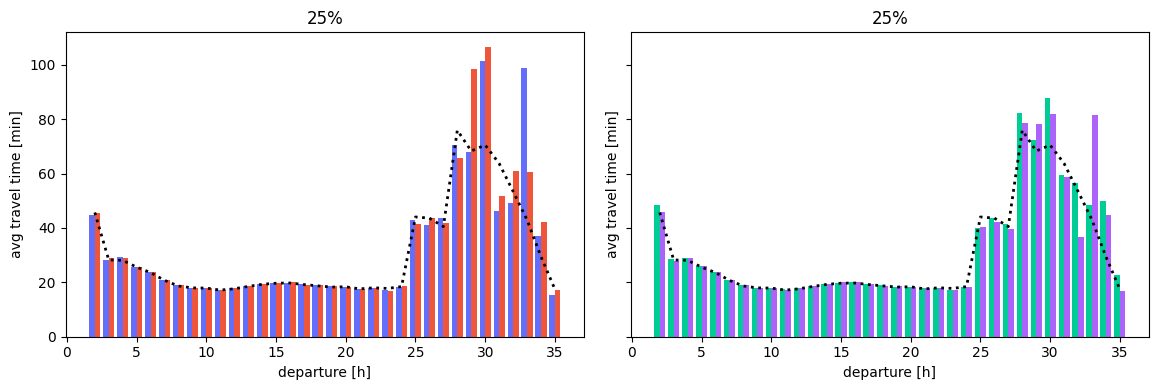

In [ ]:

x = df_aTtPhc34['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2, sharex=True, sharey = True)
axs[0].bar(x-width/2, df_aTtPhc12["case_1_25pct"][2:36], width,label = "case 1: alpha = 1.0, default sT", color = "#636EFA")
axs[0].bar(x+width/2, df_aTtPhc12["case_2_25pct"][2:36], width, label = "case 2: alpha = 0.75, default sT", color = "#EF553B")
axs[0].plot(x, df_aTtPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('25%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg travel time [min]')


axs[1].bar(x-width/2, df_aTtPhc34["case_3_25pct"][2:36], width,  label = "case 3: alpha = 1.0, sT adjusted", color = "#00CC96")
axs[1].bar(x+width/2, df_aTtPhc34["case_4_25pct"][2:36], width, label = "case 4: alpha = 0.75, sT adjusted", color = "#AB63FA")
axs[1].plot(x, df_aTtPhc34["case_4_100pct"][2:36], ":", color = "black", lw = 2)
axs[1].set_title('25%')

fig.set_size_inches(11.69,4)

#plt.figlegend(loc='lower right',  ncol=2, labelspacing=0.25, fontsize=11, bbox_to_anchor=(0.99, -0.15))
plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg travel time [min]")

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_travel_time_per_hour_25_pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

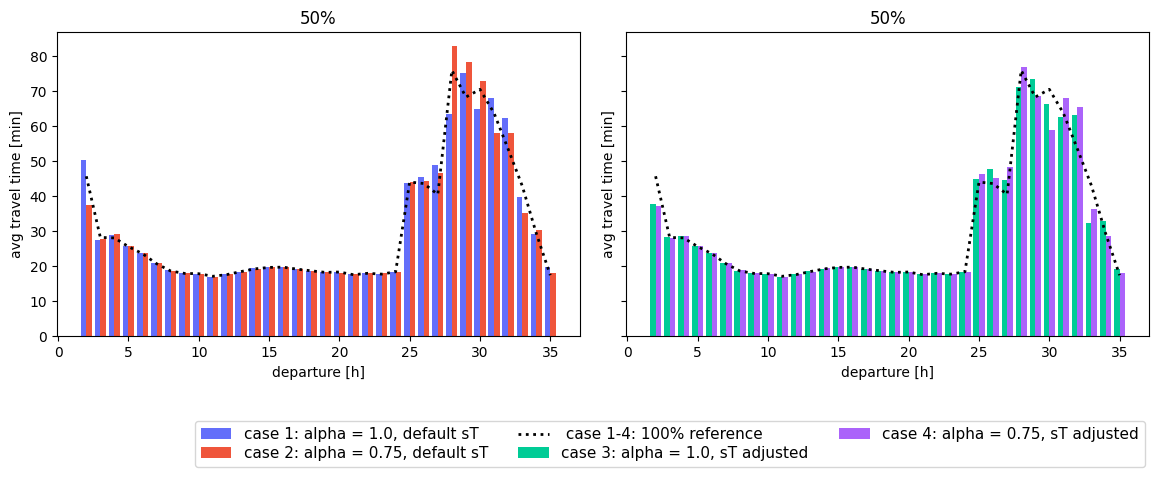

In [522]:

x = df_aTtPhc34['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2, sharex=True, sharey = True)


axs[0].bar(x-width/2, df_aTtPhc12["case_1_50pct"][2:36], width, label = "case 1: alpha = 1.0, default sT",  color = "#636EFA")
axs[0].bar(x+width/2, df_aTtPhc12["case_2_50pct"][2:36], width, label = "case 2: alpha = 0.75, default sT",  color = "#EF553B")
axs[0].plot(x, df_aTtPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('50%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg travel time [min]')


axs[1].bar(x-width/2, df_aTtPhc34["case_3_50pct"][2:36], width, label = "case 3: alpha = 1.0, sT adjusted",  color = "#00CC96")
axs[1].bar(x+width/2, df_aTtPhc34["case_4_50pct"][2:36], width, label = "case 4: alpha = 0.75, sT adjusted",  color = "#AB63FA")
axs[1].plot(x, df_aTtPhc34["case_4_100pct"][2:36], ":", color = "black", label =" case 1-4: 100% reference", lw = 2)
axs[1].set_title('50%')


fig.set_size_inches(11.69,4)


plt.figlegend(loc='lower right',  ncol=3, labelspacing=0.25, fontsize=11, bbox_to_anchor=(0.99, -0.20))
plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg travel time [min]")

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_travel_time_per_hour_50_pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

## 6. Average Traveled Distance

### Iteration 0 

In [ ]:
avg_trav_dist_it0 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/avg_trav_dist_all_1_100pct_samples_it0.csv")

In [ ]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

atd_case1_it0 = []
atd_case2_it0 = []
atd_case3_it0 = []
atd_case4_it0 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                atd_case2_it0.append(np.mean(avg_trav_dist_it0[(avg_trav_dist_it0["sample_size"]== sample_size_string) & (avg_trav_dist_it0["alpha"]==1.0) & (avg_trav_dist_it0["stuck_time"]==sT_default) & (avg_trav_dist_it0["global_seed"]=="default")]["avg_trav_dist"]))
                # case 4
                atd_case4_it0.append(np.mean(avg_trav_dist_it0[(avg_trav_dist_it0["sample_size"]== sample_size_string) & (avg_trav_dist_it0["alpha"]==1.0) & (avg_trav_dist_it0["stuck_time"]==sT_adjusted) & (avg_trav_dist_it0["global_seed"]=="default")]["avg_trav_dist"]))
            else:
                #case 2
                atd_case2_it0.append(np.mean(avg_trav_dist_it0[(avg_trav_dist_it0["sample_size"]== sample_size_string) & (avg_trav_dist_it0["alpha"]==float(alpha)) & (avg_trav_dist_it0["stuck_time"]==sT_default) & (avg_trav_dist_it0["global_seed"]=="default")]["avg_trav_dist"]))
                # case 4
                atd_case4_it0.append(np.mean(avg_trav_dist_it0[(avg_trav_dist_it0["sample_size"]== sample_size_string) & (avg_trav_dist_it0["alpha"]==float(alpha)) & (avg_trav_dist_it0["stuck_time"]==sT_adjusted) & (avg_trav_dist_it0["global_seed"]=="default")]["avg_trav_dist"]))
        else:
            atd_case1_it0.append(np.mean(avg_trav_dist_it0[(avg_trav_dist_it0["sample_size"]==sample_size_string) & (avg_trav_dist_it0["alpha"]==float(alpha)) & (avg_trav_dist_it0["stuck_time"]==sT_default) & (avg_trav_dist_it0["global_seed"]=="default")]["avg_trav_dist"]))
            atd_case3_it0.append(np.mean(avg_trav_dist_it0[(avg_trav_dist_it0["sample_size"]==sample_size_string) & (avg_trav_dist_it0["alpha"]==float(alpha)) & (avg_trav_dist_it0["stuck_time"]==sT_adjusted) & (avg_trav_dist_it0["global_seed"]=="default")]["avg_trav_dist"]))

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
atd_case5_it0 = []
for sampleSize in sample_sizes_rGS:
    atd_case5_it0.append(np.mean(avg_trav_dist_it0[(avg_trav_dist_it0["sample_size"]==sampleSize) & (avg_trav_dist_it0["alpha"]==1) & (avg_trav_dist_it0["stuck_time"]==30.0) & (avg_trav_dist_it0['global_seed'].str.contains("rnd"))]["avg_trav_dist"]))

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
atd_case6_it0 = []
for sampleSize in sample_sizes_dq:
    atd_case6_it0.append(np.mean(avg_trav_dist_it0[(avg_trav_dist_it0["sample_size"]==sampleSize)]["avg_trav_dist"]))

In [ ]:
aTd1pct_max = np.max(avg_trav_dist_it0[((avg_trav_dist_it0["sample_size"]== "1-pct") & (avg_trav_dist_it0["alpha"] == 1.0) & (avg_trav_dist_it0["stuck_time"] == 30.0) & (avg_trav_dist_it0["global_seed"]=="default"))]["avg_trav_dist"]) - atd_case1_it0[0]
aTd1pct_min = atd_case1_it0[0] - np.min(avg_trav_dist_it0[((avg_trav_dist_it0["sample_size"]== "1-pct") & (avg_trav_dist_it0["alpha"] == 1.0) & (avg_trav_dist_it0["stuck_time"] == 30.0) & (avg_trav_dist_it0["global_seed"]=="default"))]["avg_trav_dist"])


aTd5pct_max = np.max(avg_trav_dist_it0[((avg_trav_dist_it0["sample_size"]== "5-pct") & (avg_trav_dist_it0["alpha"] == 1.0) & (avg_trav_dist_it0["stuck_time"] == 30.0) & (avg_trav_dist_it0["global_seed"]=="default"))]["avg_trav_dist"]) - atd_case1_it0[1]
aTd5pct_min = atd_case1_it0[1] - np.min(avg_trav_dist_it0[((avg_trav_dist_it0["sample_size"]== "5-pct") & (avg_trav_dist_it0["alpha"] == 1.0) & (avg_trav_dist_it0["stuck_time"] == 30.0) & (avg_trav_dist_it0["global_seed"]=="default"))]["avg_trav_dist"]) 


aTd10pct_max = np.max(avg_trav_dist_it0[((avg_trav_dist_it0["sample_size"]== "10-pct") & (avg_trav_dist_it0["alpha"] == 1.0) & (avg_trav_dist_it0["stuck_time"] == 30.0) & (avg_trav_dist_it0["global_seed"]=="default"))]["avg_trav_dist"]) - atd_case1_it0[2]
aTd10pct_min = atd_case1_it0[2] - np.min(avg_trav_dist_it0[((avg_trav_dist_it0["sample_size"]== "10-pct") & (avg_trav_dist_it0["alpha"] == 1.0) & (avg_trav_dist_it0["stuck_time"] == 30.0) & (avg_trav_dist_it0["global_seed"]=="default"))]["avg_trav_dist"]) 


In [ ]:
atd_case_1_4_it0 = pd.DataFrame({'case_1': atd_case1_it0, 'case_2': atd_case2_it0, 'case_3': atd_case3_it0, 'case_4': atd_case4_it0})
atd_case_1_4_it0 = atd_case_1_4_it0.round(2)
atd_case_5_6_it0 = pd.DataFrame({'case_5': atd_case5_it0, 'case_6': atd_case6_it0})
atd_case_5_6_it0 = atd_case_5_6_it0.round(2)

#### Plot

/tmp/ipykernel_12529/1305058373.py:9: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.



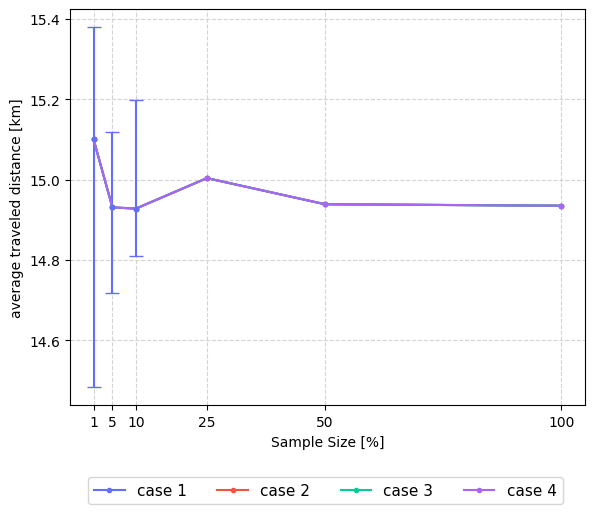

In [ ]:
lower_error =  [aTd1pct_min/1000, aTd5pct_min/1000, aTd10pct_min/1000]
upper_error =  [aTd1pct_max/1000, aTd5pct_max/1000, aTd10pct_max/1000]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

x = [1, 5, 10, 25, 50, 100]

fig, axs = plt.subplots(1, 1, sharey = True)
axs.plot(x, atd_case_1_4_it0['case_1']/1000, '.-', color = "#636EFA", label = "case 1" )
axs.errorbar([1,5,10], atd_case_1_4_it0['case_1'][0:3]/1000, yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=5 )

axs.plot(x, atd_case_1_4_it0['case_2']/1000,'.-',  color = "#EF553B",  label = "case 2")
axs.plot(x, atd_case_1_4_it0['case_3']/1000, '.-',  color = "#00CC96", label = "case 3")
axs.plot(x ,atd_case_1_4_it0['case_4']/1000, '.-',  color = "#AB63FA",  label = "case 4")
#axs.plot([50,100] ,atd_case_5_6_it0['case_6']/1000, '.-',  color = "#FFA15A",  label = "case 6")


fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average traveled distance [km]")
plt.xlabel("Sample Size [%]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_distance_it0_pyplot_case_14_6.pdf', format = "pdf",bbox_inches='tight')

#### Table


In [ ]:
first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
atd_it0_values_as_table = pd.DataFrame({'sample_size': first_column, 'case_1': atd_case_1_4_it0['case_1']/1000, 'case_2': atd_case_1_4_it0['case_2']/1000, 'case_3': atd_case_1_4_it0['case_3']/1000,
                                    'case_4': atd_case_1_4_it0['case_4']/1000, 'case_5': [atd_case_5_6_it0['case_5'][0]/1000,atd_case_5_6_it0['case_5'][1]/1000, "-", "-", "-", "-"], 'case_6': ["-", "-", "-", "-",atd_case_5_6_it0['case_6'][0]/1000 ,atd_case_5_6_it0['case_6'][1]/1000 ]})

atd_it0_values_as_table = atd_it0_values_as_table.round(2)

atd_it0_values_as_table.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/atd_it0_plot_values_as_table.csv", sep = ";", index = False)

In [ ]:
avg_trav_dist_it0['aTd_km'] = avg_trav_dist_it0['avg_trav_dist']/1000

#### Boxplot

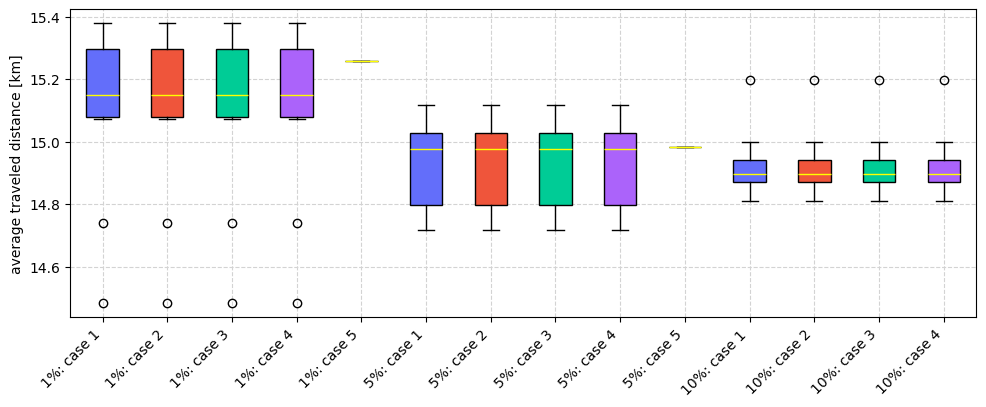

In [ ]:
# Generates grouped aTtta
aTd_bp_1pct = [avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="1-pct") & (avg_trav_dist_it0['alpha']== 1)  & (avg_trav_dist_it0['stuck_time']== 30.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="1-pct") & (avg_trav_dist_it0['alpha']== 0.75)  & (avg_trav_dist_it0['stuck_time']== 30.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="1-pct") & (avg_trav_dist_it0['alpha']== 1)  & (avg_trav_dist_it0['stuck_time']== 3000.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="1-pct") & (avg_trav_dist_it0['alpha']== 0.75)  & (avg_trav_dist_it0['stuck_time']== 3000.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="1-pct") & (avg_trav_dist_it0['global_seed'].str.contains('rnd')) ]['aTd_km']]
      
aTd_bp_5pct = [avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="5-pct") & (avg_trav_dist_it0['alpha']== 1)  & (avg_trav_dist_it0['stuck_time']== 30.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
             avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="5-pct") & (avg_trav_dist_it0['alpha']== 0.75)  & (avg_trav_dist_it0['stuck_time']== 30.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
             avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="5-pct") & (avg_trav_dist_it0['alpha']== 1)  & (avg_trav_dist_it0['stuck_time']== 600.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="5-pct") & (avg_trav_dist_it0['alpha']== 0.75)  & (avg_trav_dist_it0['stuck_time']== 600.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="5-pct") & (avg_trav_dist_it0['global_seed'].str.contains('rnd')) ]['aTd_km']]

aTd_bp_10pct = [avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="10-pct") & (avg_trav_dist_it0['alpha']== 1)  & (avg_trav_dist_it0['stuck_time']== 30.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
             avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="10-pct") & (avg_trav_dist_it0['alpha']== 0.75)  & (avg_trav_dist_it0['stuck_time']== 30.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
             avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="10-pct") & (avg_trav_dist_it0['alpha']== 1)  & (avg_trav_dist_it0['stuck_time']== 300.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km'],
             avg_trav_dist_it0[(avg_trav_dist_it0['sample_size']=="10-pct") & (avg_trav_dist_it0['alpha']== 0.75)  & (avg_trav_dist_it0['stuck_time']== 300.0) & (avg_trav_dist_it0['global_seed']== "default") ]['aTd_km']]

# Combines two data groups into a dataset
data = aTd_bp_1pct + aTd_bp_5pct + aTd_bp_10pct 
 
colors = ["#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA"]
labels=["1%: case 1", "1%: case 2","1%: case 3", "1%: case 4","1%: case 5",
                                "5%: case 1", "5%: case 2","5%: case 3", "5%: case 4","5%: case 5",
                                 "10%: case 1", "10%: case 2","10%: case 3", "10%: case 4" ]
fig, ax = plt.subplots()
ax.set_ylabel('average traveled distance [km]')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_distance_boxplot_pyplot_1_10_pct_it0.pdf', format = "pdf",bbox_inches='tight')

### Iteration 500

In [ ]:
aTd_it500 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/avg_trav_time_and_dist_1_to_100_pct_samples.csv")

In [ ]:
sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

atd_case1_it500 = []
atd_case2_it500 = []
atd_case3_it500 = []
atd_case4_it500 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                atd_case2_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==1.0) & (aTd_it500["stuck_time"]==sT_default) & (aTd_it500["global_seed"]=="default")]["aTd_km"]))
                # case 4
                atd_case4_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==1.0) & (aTd_it500["stuck_time"]==sT_adjusted) & (aTd_it500["global_seed"]=="default")]["aTd_km"]))
            else:
                #case 2
                atd_case2_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_default) & (aTd_it500["global_seed"]=="default")]["aTd_km"]))
                # case 4
                atd_case4_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_adjusted) & (aTd_it500["global_seed"]=="default")]["aTd_km"]))
        else:
            atd_case1_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_default) & (aTd_it500["global_seed"]=="default")]["aTd_km"]))
            atd_case3_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_adjusted) & (aTd_it500["global_seed"]=="default")]["aTd_km"]))

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
atd_case5_it500 = []
for sampleSize in sample_sizes_rGS:
    atd_case5_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sampleSize) & (aTd_it500["alpha"]==1) & (aTd_it500["stuck_time"]==30.0) & (aTd_it500['global_seed'].str.contains("rnd"))]["aTd_km"]))

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
atd_case6_it500 = []
for sampleSize in sample_sizes_dq:
    atd_case6_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sampleSize)]["aTd_km"]))

In [ ]:
aTd1pct_max = np.max(aTd_it500[((aTd_it500["sample_size"]== "1-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_km"]) - atd_case1_it500[0]
aTd1pct_min = atd_case1_it500[0] - np.min(aTd_it500[((aTd_it500["sample_size"]== "1-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_km"])


aTd5pct_max = np.max(aTd_it500[((aTd_it500["sample_size"]== "5-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_km"]) - atd_case1_it500[1]
aTd5pct_min = atd_case1_it500[1] - np.min(aTd_it500[((aTd_it500["sample_size"]== "5-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_km"]) 


aTd10pct_max = np.max(aTd_it500[((aTd_it500["sample_size"]== "10-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_km"]) - atd_case1_it500[2]
aTd10pct_min = atd_case1_it500[2] - np.min(aTd_it500[((aTd_it500["sample_size"]== "10-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_km"]) 


In [ ]:
atd_case_1_4_it500 = pd.DataFrame({'case_1': atd_case1_it500, 'case_2': atd_case2_it500, 'case_3': atd_case3_it500, 'case_4': atd_case4_it500})
atd_case_1_4_it500 = atd_case_1_4_it500.round(2)
atd_case_5_6_it500 = pd.DataFrame({'case_5': atd_case5_it500, 'case_6': atd_case6_it500})
atd_case_5_6_it500 = atd_case_5_6_it500.round(2)

#### Plot

/tmp/ipykernel_12529/2278799308.py:9: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.



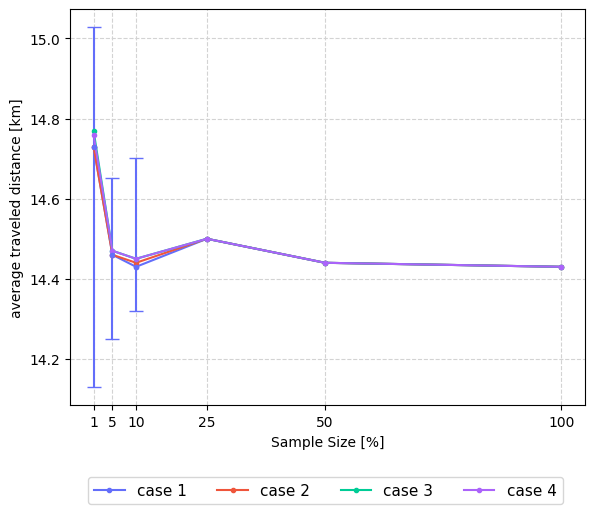

In [ ]:
lower_error =  [aTd1pct_min, aTd5pct_min, aTd10pct_min]
upper_error =  [aTd1pct_max, aTd5pct_max, aTd10pct_max]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

x = [1, 5, 10, 25, 50, 100]

fig, axs = plt.subplots(1, 1, sharey = True)
axs.plot(x, atd_case_1_4_it500['case_1'], '.-', color = "#636EFA", label = "case 1" )
axs.errorbar([1,5,10], atd_case_1_4_it500['case_1'][0:3], yerr= asymmetric_error, fmt= ".k",  color = "#636EFA", capsize=5 )

axs.plot(x, atd_case_1_4_it500['case_2'],'.-',  color = "#EF553B",  label = "case 2")
axs.plot(x, atd_case_1_4_it500['case_3'], '.-',  color = "#00CC96", label = "case 3")
axs.plot(x ,atd_case_1_4_it500['case_4'], '.-',  color = "#AB63FA",  label = "case 4")
#axs.plot([50,100] ,atd_case_5_6_it500['case_6'], '.-',  color = "#FFA15A",  label = "case 6")


fig.set_size_inches(5.85,4.5)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average traveled distance [km]")
plt.xlabel("Sample Size [%]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_distance_it500_pyplot_case_14_6.pdf', format = "pdf",bbox_inches='tight')

#### Table 

In [ ]:
first_column = ['1-pct', '5-pct', '10-pct', '25-pct', '50-pct', '100-pct']
atd_it500_values_as_table = pd.DataFrame({'sample_size': first_column, 'case_1': atd_case_1_4_it500['case_1'], 'case_2': atd_case_1_4_it500['case_2'], 'case_3': atd_case_1_4_it500['case_3'],
                                    'case_4': atd_case_1_4_it500['case_4'], 'case_5': [atd_case_5_6_it500['case_5'][0],atd_case_5_6_it500['case_5'][1], "-", "-", "-", "-"]})

atd_it500_values_as_table = atd_it500_values_as_table.round(2)

atd_it500_values_as_table.to_csv("/home/lola/Nextcloud/Masterarbeit/04b_Tables_corresponding_to_plots/atd_it500_plot_values_as_table.csv", sep = ";", index = False)

#### Boxplot

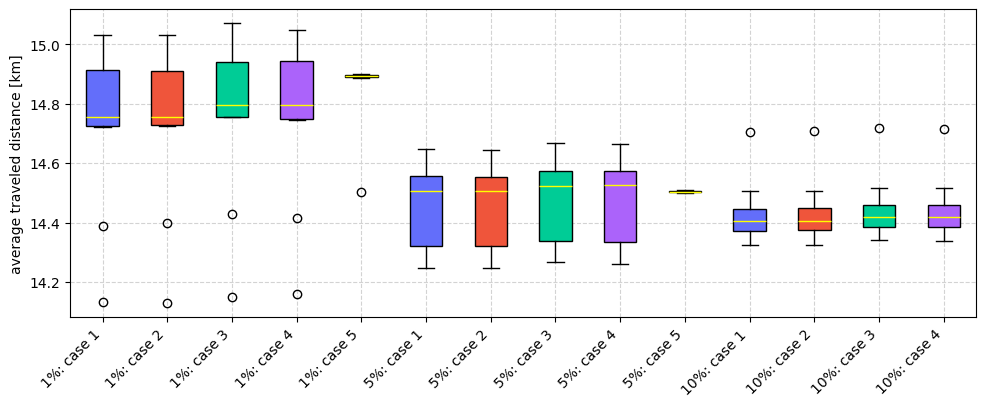

In [ ]:
# Generates grouped aTtta
aTd_bp_1pct = [aTd_it500[(aTd_it500['sample_size']=="1-pct") & (aTd_it500['alpha']== 1)  & (aTd_it500['stuck_time']== 30.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
              aTd_it500[(aTd_it500['sample_size']=="1-pct") & (aTd_it500['alpha']== 0.75)  & (aTd_it500['stuck_time']== 30.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
              aTd_it500[(aTd_it500['sample_size']=="1-pct") & (aTd_it500['alpha']== 1)  & (aTd_it500['stuck_time']== 3000.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
              aTd_it500[(aTd_it500['sample_size']=="1-pct") & (aTd_it500['alpha']== 0.75)  & (aTd_it500['stuck_time']== 3000.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
              aTd_it500[(aTd_it500['sample_size']=="1-pct") & (aTd_it500['global_seed'].str.contains('rnd')) ]['aTd_km']]
      
aTd_bp_5pct = [aTd_it500[(aTd_it500['sample_size']=="5-pct") & (aTd_it500['alpha']== 1)  & (aTd_it500['stuck_time']== 30.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
             aTd_it500[(aTd_it500['sample_size']=="5-pct") & (aTd_it500['alpha']== 0.75)  & (aTd_it500['stuck_time']== 30.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
             aTd_it500[(aTd_it500['sample_size']=="5-pct") & (aTd_it500['alpha']== 1)  & (aTd_it500['stuck_time']== 600.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
              aTd_it500[(aTd_it500['sample_size']=="5-pct") & (aTd_it500['alpha']== 0.75)  & (aTd_it500['stuck_time']== 600.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
              aTd_it500[(aTd_it500['sample_size']=="5-pct") & (aTd_it500['global_seed'].str.contains('rnd')) ]['aTd_km']]

aTd_bp_10pct = [aTd_it500[(aTd_it500['sample_size']=="10-pct") & (aTd_it500['alpha']== 1)  & (aTd_it500['stuck_time']== 30.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
             aTd_it500[(aTd_it500['sample_size']=="10-pct") & (aTd_it500['alpha']== 0.75)  & (aTd_it500['stuck_time']== 30.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
             aTd_it500[(aTd_it500['sample_size']=="10-pct") & (aTd_it500['alpha']== 1)  & (aTd_it500['stuck_time']== 300.0) & (aTd_it500['global_seed']== "default") ]['aTd_km'],
             aTd_it500[(aTd_it500['sample_size']=="10-pct") & (aTd_it500['alpha']== 0.75)  & (aTd_it500['stuck_time']== 300.0) & (aTd_it500['global_seed']== "default") ]['aTd_km']]

# Combines two data groups into a dataset
data = aTd_bp_1pct + aTd_bp_5pct + aTd_bp_10pct 
 
colors = ["#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA"]
labels=["1%: case 1", "1%: case 2","1%: case 3", "1%: case 4","1%: case 5",
                                "5%: case 1", "5%: case 2","5%: case 3", "5%: case 4","5%: case 5",
                                 "10%: case 1", "10%: case 2","10%: case 3", "10%: case 4" ]
fig, ax = plt.subplots()
ax.set_ylabel('average traveled distance [km]')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_distance_boxplot_pyplot_1_10_pct_it500.pdf', format = "pdf",bbox_inches='tight')

#### for mode car 

In [ ]:
# Calculat values for cases 1 - 4

sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

atd_case1_car_it500 = []
atd_case2_car_it500 = []
atd_case3_car_it500 = []
atd_case4_car_it500 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"

    for alpha in alpha_values:
        if (alpha =="0.75"):
            # for sample share 1: 1^(0.75) = 1.0:
            if(sampleSize == '100'):
                #case 2
                atd_case2_car_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==1.0) & (aTd_it500["stuck_time"]==sT_default) & (aTd_it500["global_seed"]=="default")]["aTd_car_km"]))
                # case 4
                atd_case4_car_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==1.0) & (aTd_it500["stuck_time"]==sT_adjusted) & (aTd_it500["global_seed"]=="default")]["aTd_car_km"]))
            else:
                #case 2
                atd_case2_car_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_default) & (aTd_it500["global_seed"]=="default")]["aTd_car_km"]))
                # case 4
                atd_case4_car_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_adjusted) & (aTd_it500["global_seed"]=="default")]["aTd_car_km"]))
        else:
            atd_case1_car_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_default) & (aTd_it500["global_seed"]=="default")]["aTd_car_km"]))
            atd_case3_car_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_adjusted) & (aTd_it500["global_seed"]=="default")]["aTd_car_km"]))

# Calculate values for case 5 
sample_sizes_rGS = ['1-pct', '5-pct']
atd_case5_car_it500 = []
for sampleSize in sample_sizes_rGS:
    atd_case5_car_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sampleSize) & (aTd_it500["alpha"]==1) & (aTd_it500["stuck_time"]==30.0) & (aTd_it500['global_seed'].str.contains("rnd"))]["aTd_car_km"]))

# Calculate values for case 6
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
atd_case6_car_it500 = []
for sampleSize in sample_sizes_dq:
    atd_case6_car_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sampleSize)]["aTd_car_km"]))

In [ ]:
aTd1pct_max = np.max(aTd_it500[((aTd_it500["sample_size"]== "1-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_car_km"]) - atd_case1_car_it500[0]
aTd1pct_min = atd_case1_car_it500[0] - np.min(aTd_it500[((aTd_it500["sample_size"]== "1-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_car_km"])


aTd5pct_max = np.max(aTd_it500[((aTd_it500["sample_size"]== "5-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_car_km"]) - atd_case1_car_it500[1]
aTd5pct_min = atd_case1_car_it500[1] - np.min(aTd_it500[((aTd_it500["sample_size"]== "5-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_car_km"]) 


aTd10pct_max = np.max(aTd_it500[((aTd_it500["sample_size"]== "10-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_car_km"]) - atd_case1_car_it500[2]
aTd10pct_min = atd_case1_car_it500[2] - np.min(aTd_it500[((aTd_it500["sample_size"]== "10-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_car_km"]) 


In [ ]:
atd_case_car_1_4_it500 = pd.DataFrame({'case_1': atd_case1_car_it500, 'case_2': atd_case2_car_it500, 'case_3': atd_case3_car_it500, 'case_4': atd_case4_car_it500})
atd_case_car_1_4_it500 = atd_case_car_1_4_it500.round(2)
atd_case_car_5_6_it500 = pd.DataFrame({'case_5': atd_case5_car_it500, 'case_6': atd_case6_car_it500})
atd_case_car_5_6_it500 = atd_case_car_5_6_it500.round(2)

fig5_aTd_car = go.Figure()
fig5_aTd_car.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= atd_case_car_1_4_it500['case_1'],
                          error_y=dict( type='data', # value of error bar given in data coordinates
                                        symmetric=False,
                    array=[aTd1pct_max, aTd5pct_max,aTd10pct_max, 0 , 0, 0],
                    arrayminus=[aTd1pct_min, aTd5pct_min, aTd10pct_min, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0', 
                    )) 
                    
fig5_aTd_car.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= atd_case_car_1_4_it500['case_2'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))

fig5_aTd_car.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= atd_case_car_1_4_it500['case_3'],
                    mode='lines+markers',
                    name='alpha = 1, sT adjusted', 
                    )
                    )
fig5_aTd_car.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= atd_case_car_1_4_it500['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig5_aTd_car.add_trace(go.Scatter(x=[50, 100], y= atd_case_car_5_6_it500['case_6'],
                    mode='lines+markers',
                    name='alpha = 1.0, agents cloned'))

fig5_aTd_car.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='average traveled distance [km]')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    legend=dict(
    yanchor="top",
    y=1.0,
    xanchor="left",
    x=0.75
    ), 
    font = dict(size = 18)
)
fig5_aTd_car.show()

#### for ride


sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ["1.0", "0.75"]

atd_case1_ride_it500 = []
atd_case2_ride_it500 = []
atd_case3_ride_it500 = []
atd_case4_ride_it500 = []

for sampleSize in sample_sizes:
    sT_default = 30.0
    # calculate adjsuted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"
    for alpha in alpha_values:
        if (alpha =="0.75"):
            if(sampleSize == '100'):
                atd_case2_ride_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==1.0) & (aTd_it500["stuck_time"]==sT_default) & (aTd_it500["global_seed"]=="default")]["aTd_ride_km"]))
                atd_case4_ride_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==1.0) & (aTd_it500["stuck_time"]==sT_adjusted) & (aTd_it500["global_seed"]=="default")]["aTd_ride_km"]))
            else:
                atd_case2_ride_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_default) & (aTd_it500["global_seed"]=="default")]["aTd_ride_km"]))
                atd_case4_ride_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]== sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_adjusted) & (aTd_it500["global_seed"]=="default")]["aTd_ride_km"]))
        else:
            atd_case1_ride_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_default) & (aTd_it500["global_seed"]=="default")]["aTd_ride_km"]))
            atd_case3_ride_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sample_size_string) & (aTd_it500["alpha"]==float(alpha)) & (aTd_it500["stuck_time"]==sT_adjusted) & (aTd_it500["global_seed"]=="default")]["aTd_ride_km"]))
sample_sizes_rGS = ['1-pct', '5-pct']
atd_case5_ride_it500 = []
for sampleSize in sample_sizes_rGS:
    atd_case5_ride_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sampleSize) & (aTd_it500["alpha"]==1) & (aTd_it500["stuck_time"]==30.0) & (aTd_it500['global_seed'].str.contains("rnd"))]["aTd_ride_km"]))
    
sample_sizes_dq = ['25-pct-doubled', '25-pct-quadrupled']
atd_case6_ride_it500 = []
for sampleSize in sample_sizes_dq:
    atd_case6_ride_it500.append(np.mean(aTd_it500[(aTd_it500["sample_size"]==sampleSize)]["aTd_ride_km"]))

aTd1pct_max = np.max(aTd_it500[((aTd_it500["sample_size"]== "1-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_ride_km"]) - atd_case1_ride_it500[0]
aTd1pct_min = atd_case1_ride_it500[0] - np.min(aTd_it500[((aTd_it500["sample_size"]== "1-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_ride_km"])


aTd5pct_max = np.max(aTd_it500[((aTd_it500["sample_size"]== "5-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_ride_km"]) - atd_case1_ride_it500[1]
aTd5pct_min = atd_case1_ride_it500[1] - np.min(aTd_it500[((aTd_it500["sample_size"]== "5-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_ride_km"]) 


aTd10pct_max = np.max(aTd_it500[((aTd_it500["sample_size"]== "10-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_ride_km"]) - atd_case1_ride_it500[2]
aTd10pct_min = atd_case1_ride_it500[2] - np.min(aTd_it500[((aTd_it500["sample_size"]== "10-pct") & (aTd_it500["alpha"] == 1.0) & (aTd_it500["stuck_time"] == 30.0) & (aTd_it500["global_seed"]=="default"))]["aTd_ride_km"]) 


atd_case_ride_1_4_it500 = pd.DataFrame({'case_1': atd_case1_ride_it500, 'case_2': atd_case2_ride_it500, 'case_3': atd_case3_ride_it500, 'case_4': atd_case4_ride_it500})
atd_case_ride_1_4_it500 = atd_case_ride_1_4_it500.round(2)
atd_case_ride_5_6_it500 = pd.DataFrame({'case_5': atd_case5_ride_it500, 'case_6': atd_case6_ride_it500})
atd_case_ride_5_6_it500 = atd_case_ride_5_6_it500.round(2)


fig5_aTd_ride = go.Figure()
fig5_aTd_ride.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= atd_case_ride_1_4_it500['case_1'],
                          error_y=dict( type='data', # value of error bar given in data coordinates
                                        symmetric=False,
                    array=[aTd1pct_max, aTd5pct_max,aTd10pct_max, 0 , 0, 0],
                    arrayminus=[aTd1pct_min, aTd5pct_min, aTd10pct_min, 0, 0 , 0],
                    visible=True),
                    mode='lines+markers',
                    name='alpha = 1, sT = 30.0', 
                    )) 
                    
fig5_aTd_ride.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= atd_case_ride_1_4_it500['case_2'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT = 30.0'))

fig5_aTd_ride.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= atd_case_ride_1_4_it500['case_3'],
                    mode='lines+markers',
                    name='alpha = 1, sT adjusted', 
                    )
                    )
fig5_aTd_ride.add_trace(go.Scatter(x=[1, 5, 10, 25,50, 100], y= atd_case_ride_1_4_it500['case_4'],
                    mode='lines+markers',
                    name='alpha = 0.75, sT adjusted'))
fig5_aTd_ride.add_trace(go.Scatter(x=[50, 100], y= atd_case_ride_5_6_it500['case_6'],
                    mode='lines+markers',
                    name='alpha = 1.0, agents cloned'))
fig5_aTd_ride.update_layout(
    xaxis=dict(
        autorange= True,
        title=dict(text='sample size'),
        tickmode = 'array',
        tickvals = [1,5,10,25, 50, 100]
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='average traveled distance [km]')),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    legend=dict(
    yanchor="top",
    y=1.0,
    xanchor="left",
    x=0.75
    ), 
    font = dict(size = 18)
)
fig5_aTd_ride.show()

#### Boxplot average traveled distance

In [ ]:
avg_trav_dist = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/avg_trav_time_and_dist_1_to_100_pct_samples.csv")

aTd1pct = avg_trav_dist[((avg_trav_dist["sample_size"]== "1-pct") & (avg_trav_dist["alpha"] == 1.0) & (avg_trav_dist["stuck_time"] == 30.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd1pct_sCf = avg_trav_dist[((avg_trav_dist["sample_size"]== "1-pct") & (avg_trav_dist["alpha"] == 0.75) & (avg_trav_dist["stuck_time"] == 30.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd1pct_sT = avg_trav_dist[((avg_trav_dist["sample_size"]== "1-pct") & (avg_trav_dist["alpha"] == 1.0) & (avg_trav_dist["stuck_time"] == 3000.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd1pct_sCf_sT = avg_trav_dist[((avg_trav_dist["sample_size"]== "1-pct") & (avg_trav_dist["alpha"] == 0.75) & (avg_trav_dist["stuck_time"] == 3000.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd1pct_rGs = avg_trav_dist[((avg_trav_dist["sample_size"] == "1-pct") & (avg_trav_dist["alpha"] == 1.0) & (avg_trav_dist["stuck_time"] == 30.0) & (avg_trav_dist['global_seed'].str.contains("rnd")))]["avg_trav_dist_km"]



aTd5pct = avg_trav_dist[((avg_trav_dist["sample_size"]== "5-pct") & (avg_trav_dist["alpha"] == 1.0) & (avg_trav_dist["stuck_time"] == 30.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd5pct_sCf = avg_trav_dist[((avg_trav_dist["sample_size"]== "5-pct") & (avg_trav_dist["alpha"] == 0.75) & (avg_trav_dist["stuck_time"] == 30.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd5pct_sT = avg_trav_dist[((avg_trav_dist["sample_size"]== "5-pct") & (avg_trav_dist["alpha"] == 1.0) & (avg_trav_dist["stuck_time"] == 600.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd5pct_sCf_sT = avg_trav_dist[((avg_trav_dist["sample_size"]== "5-pct") & (avg_trav_dist["alpha"] == 0.75) & (avg_trav_dist["stuck_time"] == 600.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd5pct_rGs = avg_trav_dist[((avg_trav_dist["sample_size"] == "5-pct") & (avg_trav_dist["alpha"] == 1.0) & (avg_trav_dist["stuck_time"] == 30.0) & (avg_trav_dist['global_seed'].str.contains("rnd")))]["avg_trav_dist_km"]


aTd10pct = avg_trav_dist[((avg_trav_dist["sample_size"]== "10-pct") & (avg_trav_dist["alpha"] == 1.0) & (avg_trav_dist["stuck_time"] == 30.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd10pct_sCf = avg_trav_dist[((avg_trav_dist["sample_size"]== "10-pct") & (avg_trav_dist["alpha"] == 0.75) & (avg_trav_dist["stuck_time"] == 30.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd10pct_sT = avg_trav_dist[((avg_trav_dist["sample_size"]== "10-pct") & (avg_trav_dist["alpha"] == 1.0) & (avg_trav_dist["stuck_time"] == 300.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]

aTd10pct_sCf_sT = avg_trav_dist[((avg_trav_dist["sample_size"]== "10-pct") & (avg_trav_dist["alpha"] == 0.75) & (avg_trav_dist["stuck_time"] == 300.0) & (avg_trav_dist["global_seed"]=="default"))]["avg_trav_dist_km"]


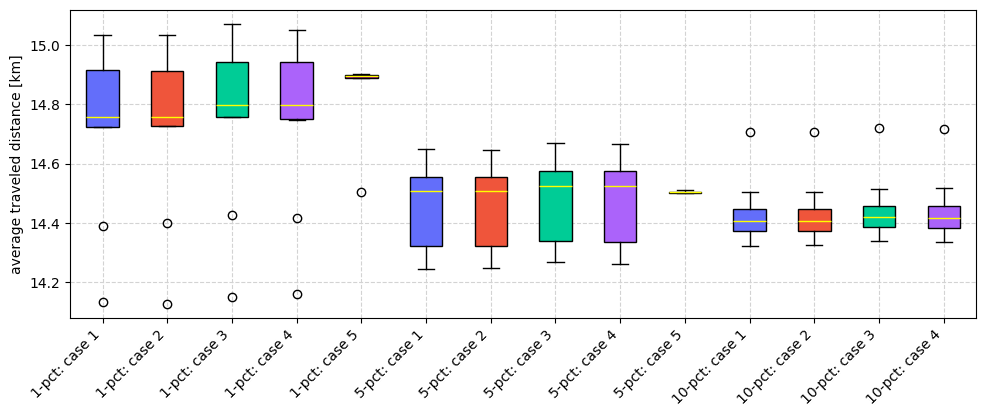

In [ ]:
# Generates grouped aTtta
aTd_bp_1pct = [avg_trav_dist[(avg_trav_dist['sample_size']=="1-pct") & (avg_trav_dist['alpha']== 1)  & (avg_trav_dist['stuck_time']== 30.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist[(avg_trav_dist['sample_size']=="1-pct") & (avg_trav_dist['alpha']== 0.75)  & (avg_trav_dist['stuck_time']== 30.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist[(avg_trav_dist['sample_size']=="1-pct") & (avg_trav_dist['alpha']== 1)  & (avg_trav_dist['stuck_time']== 3000.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist[(avg_trav_dist['sample_size']=="1-pct") & (avg_trav_dist['alpha']== 0.75)  & (avg_trav_dist['stuck_time']== 3000.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist[(avg_trav_dist['sample_size']=="1-pct") & (avg_trav_dist['global_seed'].str.contains('rnd')) ]['aTd_km']]
      
aTd_bp_5pct = [avg_trav_dist[(avg_trav_dist['sample_size']=="5-pct") & (avg_trav_dist['alpha']== 1)  & (avg_trav_dist['stuck_time']== 30.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
             avg_trav_dist[(avg_trav_dist['sample_size']=="5-pct") & (avg_trav_dist['alpha']== 0.75)  & (avg_trav_dist['stuck_time']== 30.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
             avg_trav_dist[(avg_trav_dist['sample_size']=="5-pct") & (avg_trav_dist['alpha']== 1)  & (avg_trav_dist['stuck_time']== 600.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist[(avg_trav_dist['sample_size']=="5-pct") & (avg_trav_dist['alpha']== 0.75)  & (avg_trav_dist['stuck_time']== 600.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
              avg_trav_dist[(avg_trav_dist['sample_size']=="5-pct") & (avg_trav_dist['global_seed'].str.contains('rnd')) ]['aTd_km']]

aTd_bp_10pct = [avg_trav_dist[(avg_trav_dist['sample_size']=="10-pct") & (avg_trav_dist['alpha']== 1)  & (avg_trav_dist['stuck_time']== 30.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
             avg_trav_dist[(avg_trav_dist['sample_size']=="10-pct") & (avg_trav_dist['alpha']== 0.75)  & (avg_trav_dist['stuck_time']== 30.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
             avg_trav_dist[(avg_trav_dist['sample_size']=="10-pct") & (avg_trav_dist['alpha']== 1)  & (avg_trav_dist['stuck_time']== 300.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km'],
             avg_trav_dist[(avg_trav_dist['sample_size']=="10-pct") & (avg_trav_dist['alpha']== 0.75)  & (avg_trav_dist['stuck_time']== 300.0) & (avg_trav_dist['global_seed']== "default") ]['aTd_km']]

# Combines two data groups into a dataset
data = aTd_bp_1pct + aTd_bp_5pct + aTd_bp_10pct 
 
colors = ["#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA","#990099", "#636EFA", "#EF553B" ,"#00CC96", "#AB63FA"]
labels=["1-pct: case 1", "1-pct: case 2","1-pct: case 3", "1-pct: case 4","1-pct: case 5",
                                "5-pct: case 1", "5-pct: case 2","5-pct: case 3", "5-pct: case 4","5-pct: case 5",
                                 "10-pct: case 1", "10-pct: case 2","10-pct: case 3", "10-pct: case 4" ]
fig, ax = plt.subplots()
ax.set_ylabel('average traveled distance [km]')

bplot = ax.boxplot(data, patch_artist=True)
  
ax.set_xticklabels(labels, rotation=45, ha='right')# will be used to label x-ticks
fig.set_size_inches(11.69,4)
ax.xaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray', linestyle='dashed')


# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='yellow',
               linewidth = 1)

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_trav_distance_boxplot_pyplot_1_10_pct_it500.pdf', format = "pdf",bbox_inches='tight')

fig = go.Figure()


fig.add_trace(go.Box( y= aTd1pct, quartilemethod="linear", name="1-pct", marker_color="#3366CC", showlegend= False))
fig.add_trace(go.Box( y= aTd1pct_sCf, quartilemethod="linear", name="1-pct, alpha = 0.75", marker_color="#DC3912", showlegend= False))
fig.add_trace(go.Box( y= aTd1pct_sT, quartilemethod="linear", name="1-pct, sT adjusted", marker_color="#FF9900", showlegend= False))
fig.add_trace(go.Box( y= aTd1pct_sCf_sT, quartilemethod="linear", name="1-pct, sT adjusted, alpha = 0.75", marker_color="#109618", showlegend= False))
fig.add_trace(go.Box( y= aTd1pct_rGs, quartilemethod="linear", name="1-pct, random gS", marker_color="#990099", showlegend= False))

fig.add_trace(go.Box( y= aTd5pct, quartilemethod="linear", name="5-pct, alpha = 1", marker_color="#3366CC", showlegend= False))
fig.add_trace(go.Box( y= aTd5pct_sCf, quartilemethod="linear", name="5-pct, alpha = 0.75",  marker_color="#DC3912", showlegend= False))
fig.add_trace(go.Box( y= aTd5pct_sT, quartilemethod="linear", name="5-pct, sT adjusted", marker_color="#FF9900", showlegend= False))
fig.add_trace(go.Box( y= aTd5pct_sCf_sT, quartilemethod="linear", name="5-pct, sT adjusted, alpha = 0.75", marker_color="#109618", showlegend= False))
fig.add_trace(go.Box( y= aTd5pct_rGs, quartilemethod="linear", name="5-pct, random gS",marker_color="#990099", showlegend= False))

fig.add_trace(go.Box( y= aTd10pct, quartilemethod="linear", name="10-pct, alpha = 1", marker_color="#3366CC", showlegend= False))
fig.add_trace(go.Box( y= aTd10pct_sCf, quartilemethod="linear", name="10-pct, alpha = 0.75",  marker_color="#DC3912", showlegend= False))
fig.add_trace(go.Box( y= aTd10pct_sT, quartilemethod="linear", name="10-pct, sT adjusted", marker_color="#FF9900", showlegend= False))
fig.add_trace(go.Box( y= aTd10pct_sCf_sT, quartilemethod="linear", name="10-pct, sT adjusted, alpha = 0.75", marker_color="#109618", showlegend= False))
fig.update_traces(boxpoints='all', jitter=0)
fig.update_layout(
    xaxis=dict(title=dict(text='Sample-Size')),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        zeroline=True,
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='Average traveled distance [km]')),
        font = dict( size = 14),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    title=dict(text='Average traveled distance of 1 to 10 pct Samples Nr. 1-10'),
    hovermode="x"
)
fig.show()

plotly.io.write_image(fig, "/home/lola/Nextcloud/Masterarbeit/04a_Images/Boxplot_Average_traveled_distance_1_10.pdf",  width= 1296.0, engine = "kaleido")

## 6a. average traveled distances by hour of departure and case

In [ ]:
aTd_pH = pd.read_csv('/home/lola/Nextcloud/Masterarbeit/03_Outputs/avg_trav_time_per_hour_1_to_100_pct.csv')


In [ ]:
sample_sizes = ['1', '5', '10', '25', '50', '100']
alpha_values = ['1.0', '0.75']
sT_default = 30.0

aTd_per_h = pd.DataFrame()

for sampleSize in sample_sizes:
    # calculate adjusted stuck time
    size_in_pct = float(sampleSize)/100.0
    size_inverted = 1/ size_in_pct
    sT_adjusted = 30.0*size_inverted
    if (sampleSize == '100'):
        stuck_times = [sT_default]
    else: 
        stuck_times = [sT_default, sT_adjusted]
    
    # declare sampleSize + "-pct"
    sample_size_string = sampleSize + "-pct"
    factor_scale_to_100 = 100.0 / float(sampleSize)

    for sT in stuck_times:
        for alpha in alpha_values: 
            if((sampleSize == '100') & (alpha == '0.75')):
                continue

            for hour in range(0,36,1):
            
                temp = aTd_pH[(aTd_pH['sample_size'] == sample_size_string) & (aTd_pH['alpha'] == float(alpha)) &  (aTd_pH['stuck_time'] == sT) & (aTd_pH['hour'] == hour) ]['aTd_pH_km']

                if(temp.shape[0] > 0):
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'hour': hour, 'stuck_time': sT, 'aTd': np.mean(temp)}, index = [0])
                    aTd_per_h = pd.concat([aTd_per_h, df], ignore_index= True)
                else:
                    print("temp has shape[0] of 0")
                    df = pd.DataFrame({'sample_size': sample_size_string, 'alpha': float(alpha), 'hour': hour, 'stuck_time': sT, 'aTd': 0}, index = [0])
                    aTd_per_h = pd.concat([aTd_per_h, df], ignore_index= True)  

In [ ]:
df_hour = pd.DataFrame({'hour': aTd_per_h["hour"].unique()})
dict = {'case_3_1pct' : aTd_per_h[(aTd_per_h['sample_size'] == "1-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 3000.0)]['aTd'].reset_index(drop=True), 
        'case_4_1pct': aTd_per_h[(aTd_per_h['sample_size'] == "1-pct") & (aTd_per_h['alpha'] == 0.75)   & (aTd_per_h['stuck_time'] == 3000.0)]['aTd'].reset_index(drop=True),
        'case_3_5pct': aTd_per_h[(aTd_per_h['sample_size'] == "5-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 600.0)]['aTd'].reset_index(drop= True),
        'case_4_5pct':aTd_per_h[(aTd_per_h['sample_size'] == "5-pct") & (aTd_per_h['alpha'] == 0.75)   & (aTd_per_h['stuck_time'] == 600.0)]['aTd'].reset_index(drop = True), 
        'case_3_10pct':  aTd_per_h[(aTd_per_h['sample_size'] == "10-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 300.0)]['aTd'].reset_index(drop=True),
        'case_4_10pct':aTd_per_h[(aTd_per_h['sample_size'] == "10-pct") & (aTd_per_h['alpha'] == 0.75)   & (aTd_per_h['stuck_time'] == 300.0)]['aTd'].reset_index(drop = True), 
        'case_3_25pct':  aTd_per_h[(aTd_per_h['sample_size'] == "25-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 120.0)]['aTd'].reset_index(drop=True),
        'case_4_25pct':aTd_per_h[(aTd_per_h['sample_size'] == "25-pct") & (aTd_per_h['alpha'] == 0.75)   & (aTd_per_h['stuck_time'] == 120.0)]['aTd'].reset_index(drop = True),
        'case_3_50pct':  aTd_per_h[(aTd_per_h['sample_size'] == "50-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 60.0)]['aTd'].reset_index(drop=True),
        'case_4_50pct':aTd_per_h[(aTd_per_h['sample_size'] == "50-pct") & (aTd_per_h['alpha'] == 0.75)   & (aTd_per_h['stuck_time'] == 60.0)]['aTd'].reset_index(drop = True),
        'case_4_100pct':aTd_per_h[(aTd_per_h['sample_size'] == "100-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop = True)}
df_aTdPhc34 = pd.DataFrame(dict)
df_aTdPhc34 = pd.concat([df_aTdPhc34, df_hour], axis = 1)

In [ ]:
df_hour = pd.DataFrame({'hour': aTd_per_h["hour"].unique()})
dict = {'case_1_1pct' : aTd_per_h[(aTd_per_h['sample_size'] == "1-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop=True), 
        'case_2_1pct': aTd_per_h[(aTd_per_h['sample_size'] == "1-pct") & (aTd_per_h['alpha'] == 0.75)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop=True),
        'case_1_5pct': aTd_per_h[(aTd_per_h['sample_size'] == "5-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop= True),
        'case_2_5pct':aTd_per_h[(aTd_per_h['sample_size'] == "5-pct") & (aTd_per_h['alpha'] == 0.75)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop = True), 
        'case_1_10pct':  aTd_per_h[(aTd_per_h['sample_size'] == "10-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop=True),
        'case_2_10pct':aTd_per_h[(aTd_per_h['sample_size'] == "10-pct") & (aTd_per_h['alpha'] == 0.75)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop = True), 
        'case_1_25pct':  aTd_per_h[(aTd_per_h['sample_size'] == "25-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop=True),
        'case_2_25pct':aTd_per_h[(aTd_per_h['sample_size'] == "25-pct") & (aTd_per_h['alpha'] == 0.75)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop = True),
        'case_1_50pct':  aTd_per_h[(aTd_per_h['sample_size'] == "50-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop=True),
        'case_2_50pct':aTd_per_h[(aTd_per_h['sample_size'] == "50-pct") & (aTd_per_h['alpha'] == 0.75)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop = True),
        'case_2_100pct':aTd_per_h[(aTd_per_h['sample_size'] == "100-pct") & (aTd_per_h['alpha'] == 1.0)   & (aTd_per_h['stuck_time'] == 30.0)]['aTd'].reset_index(drop = True)}
df_aTdPhc12 = pd.DataFrame(dict)
df_aTdPhc12 = pd.concat([df_aTdPhc12, df_hour], axis = 1)

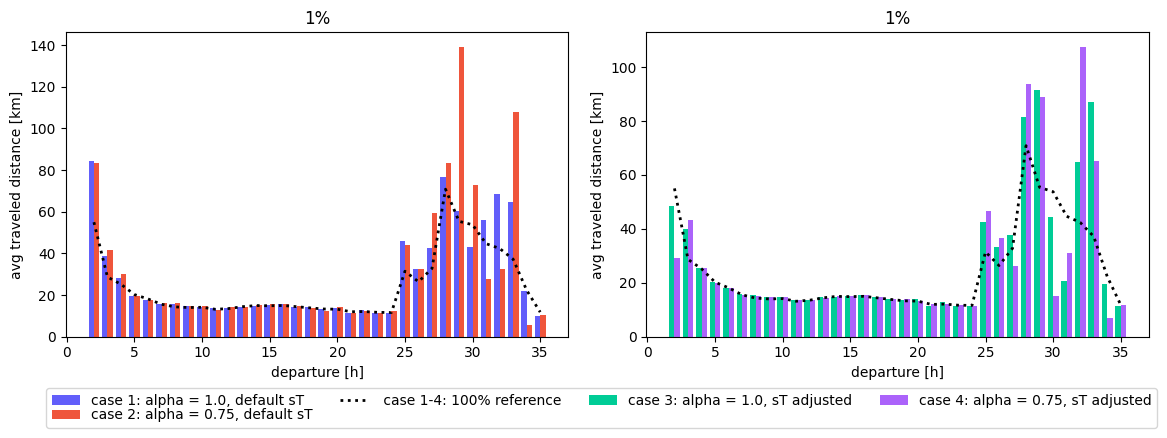

In [ ]:
x = df_aTdPhc12['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2)
axs[0].bar(x-width/2, df_aTdPhc12["case_1_1pct"][2:36], width,label = "case 1: alpha = 1.0, default sT", color = "#625EFA")
axs[0].bar(x+width/2, df_aTdPhc12["case_2_1pct"][2:36], width, label = "case 2: alpha = 0.75, default sT", color = "#EF553B")
axs[0].plot(x, df_aTdPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('1%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg traveled distance [km]')

axs[1].bar(x-width/2, df_aTdPhc34["case_3_1pct"][2:36], width,  label = "case 3: alpha = 1.0, sT adjusted", color = "#00CC96")
axs[1].bar(x+width/2, df_aTdPhc34["case_4_1pct"][2:36], width, label = "case 4: alpha = 0.75, sT adjusted", color = "#AB63FA")
axs[1].plot(x, df_aTdPhc34["case_4_100pct"][2:36], ":", color = "black",  label =" case 1-4: 100% reference",  lw = 2)
axs[1].set_title('1%')


fig.set_size_inches(11.69,4)


plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.05, fontsize=10, bbox_to_anchor=(1.0, -0.1))
plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg traveled distance [km]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_traveled_distance_per_hour_1pct_case_1234.pdf', format = "pdf",bbox_inches='tight')

axs[0,0].bar(x-width/2, df_aTdPhc12["case_1_1pct"][2:36], width,label = "case 1: alpha = 1.0, default sT", color = "#625EFA")
axs[0,0].bar(x+width/2, df_aTdPhc12["case_2_1pct"][2:36], width, label = "case 2: alpha = 0.75, default sT", color = "#EF553B")
axs[0,0].plot(x, df_aTdPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0,0].set_title('1-pct')

axs[0,1].bar(x-width/2, df_aTdPhc34["case_3_1pct"][2:36], width,  label = "case 3: alpha = 1.0, sT adjusted", color = "#00CC96")
axs[0,1].bar(x+width/2, df_aTdPhc34["case_4_1pct"][2:36], width, label = "case 4: alpha = 0.75, sT adjusted", color = "#AB63FA")
axs[0,1].plot(x, df_aTdPhc34["case_4_100pct"][2:36], ":", color = "black", lw = 2)
axs[0,1].set_title('1-pct')

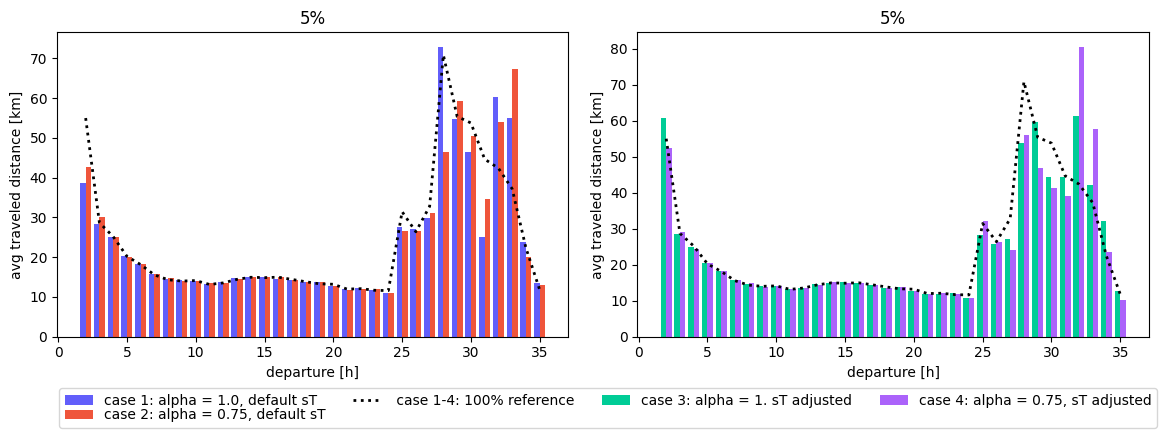

In [ ]:
x = df_aTdPhc12['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2)


axs[0].bar(x-width/2, df_aTdPhc12["case_1_5pct"][2:36], width,label = "case 1: alpha = 1.0, default sT",  color = "#625EFA")
axs[0].bar(x+width/2, df_aTdPhc12["case_2_5pct"][2:36], width, label = "case 2: alpha = 0.75, default sT", color = "#EF553B")
axs[0].plot(x, df_aTdPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('5%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg traveled distance [km]')

axs[1].bar(x-width/2, df_aTdPhc34["case_3_5pct"][2:36], width, label = "case 3: alpha = 1. sT adjusted",  color = "#00CC96")
axs[1].bar(x+width/2, df_aTdPhc34["case_4_5pct"][2:36], width, label = "case 4: alpha = 0.75, sT adjusted", color = "#AB63FA")
axs[1].plot(x, df_aTdPhc34["case_4_100pct"][2:36], ":", color = "black", label =" case 1-4: 100% reference", lw = 2)
axs[1].set_title('5%')



fig.set_size_inches(11.69,4)

#fig.set_size_inches(12,8)


plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.05, fontsize=10, bbox_to_anchor=(1.0, -0.1))
plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg traveled distance [km]")
#plt.yticks(np.arange(10, 140, 10.0))
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_traveled_distance_per_hour_5_pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

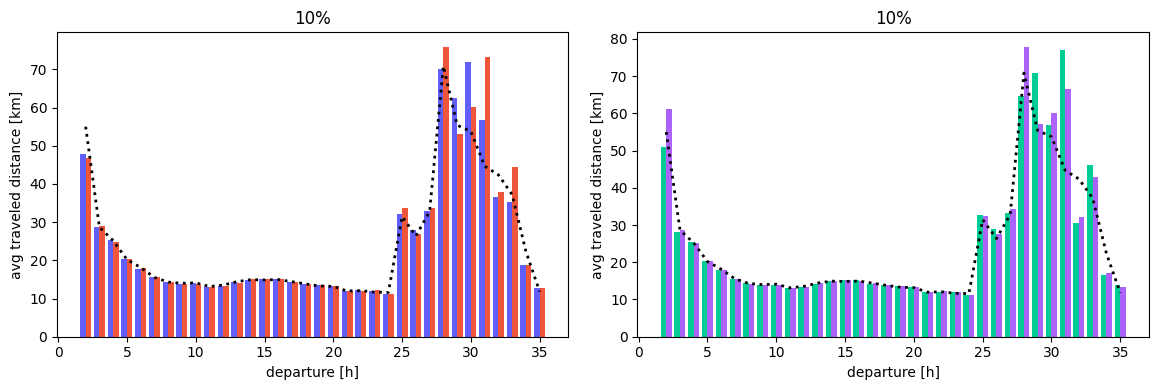

In [ ]:
x = df_aTdPhc12['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2)


axs[0].bar(x-width/2, df_aTdPhc12["case_1_10pct"][2:36], width, color = "#625EFA")
axs[0].bar(x+width/2, df_aTdPhc12["case_2_10pct"][2:36], width , color = "#EF553B")
axs[0].plot(x, df_aTdPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('10%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg traveled distance [km]')


axs[1].bar(x-width/2, df_aTdPhc34["case_3_10pct"][2:36], width, color = "#00CC96")
axs[1].bar(x+width/2, df_aTdPhc34["case_4_10pct"][2:36], width, color = "#AB63FA")
axs[1].plot(x, df_aTdPhc34["case_4_100pct"][2:36], ":", color = "black", lw = 2)
axs[1].set_title('10%')



fig.set_size_inches(11.69,4)

plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg traveled distance [km]")
#plt.yticks(np.arange(10, 140, 10.0))
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_traveled_distance_per_hour_10pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

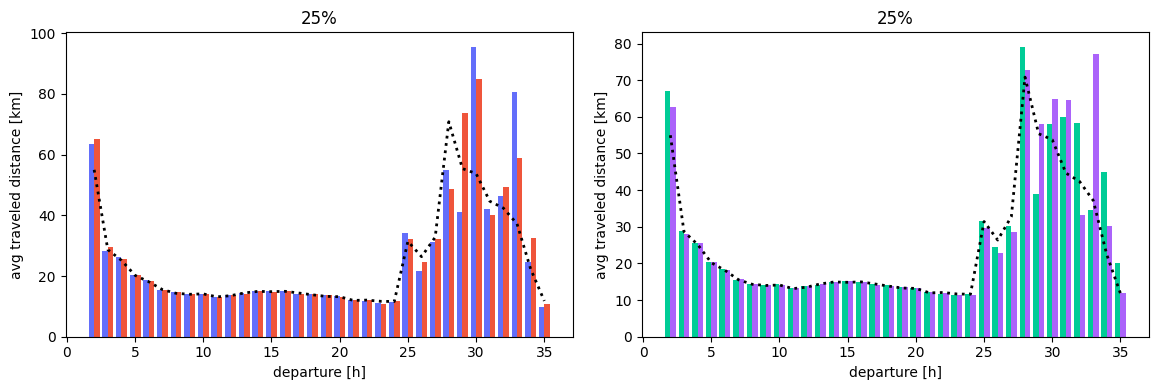

In [ ]:
x = df_aTdPhc12['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2)
axs[0].bar(x-width/2, df_aTdPhc12["case_1_25pct"][2:36], width, color = "#636EFA")
axs[0].bar(x+width/2, df_aTdPhc12["case_2_25pct"][2:36], width,  color = "#EF553B")
axs[0].plot(x, df_aTdPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('25%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg traveled distance [km]')

axs[1].bar(x-width/2, df_aTdPhc34["case_3_25pct"][2:36], width,   color = "#00CC96")
axs[1].bar(x+width/2, df_aTdPhc34["case_4_25pct"][2:36], width,  color = "#AB63FA")
axs[1].plot(x, df_aTdPhc34["case_4_100pct"][2:36], ":", color = "black", lw = 2)
axs[1].set_title('25%')



fig.set_size_inches(11.69,4)

plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg traveled distance [km]")

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_traveled_distance_per_hour_25pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

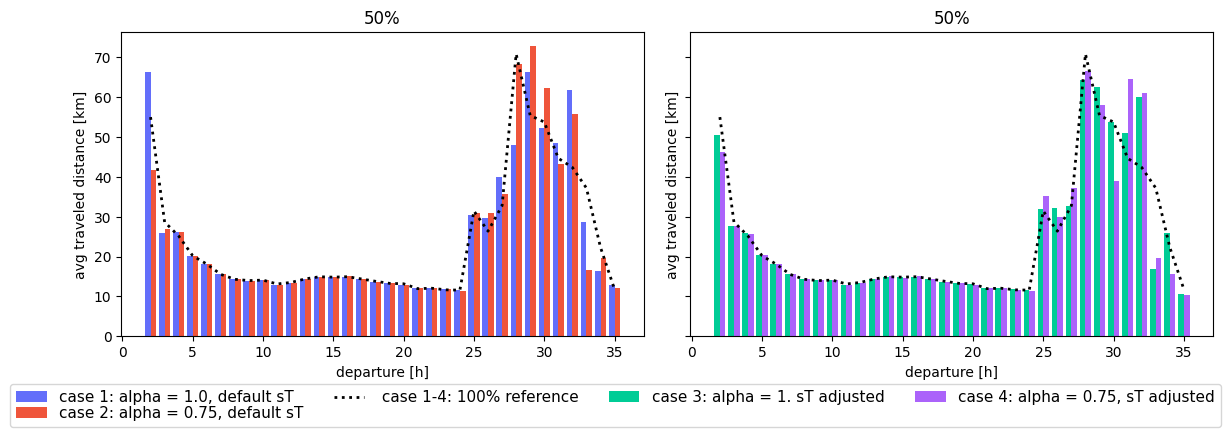

In [ ]:
x = df_aTdPhc12['hour'][2:36]
width = 0.4

fig, axs = plt.subplots(1, 2, sharex=True, sharey = True)

axs[0].bar(x-width/2, df_aTdPhc12["case_1_50pct"][2:36], width,label = "case 1: alpha = 1.0, default sT", color = "#636EFA")
axs[0].bar(x+width/2, df_aTdPhc12["case_2_50pct"][2:36], width, label = "case 2: alpha = 0.75, default sT", color = "#EF553B")
axs[0].plot(x, df_aTdPhc12["case_2_100pct"][2:36], ":", color = "black", lw = 2)
axs[0].set_title('50%')
axs[0].set_xlabel('departure [h]')
axs[0].set_ylabel('avg traveled distance [km]')

axs[1].bar(x-width/2, df_aTdPhc34["case_3_50pct"][2:36], width, label = "case 3: alpha = 1. sT adjusted", color = "#00CC96")
axs[1].bar(x+width/2, df_aTdPhc34["case_4_50pct"][2:36], width, label = "case 4: alpha = 0.75, sT adjusted", color = "#AB63FA")
axs[1].plot(x, df_aTdPhc34["case_4_100pct"][2:36], ":", color = "black", label =" case 1-4: 100% reference", lw = 2)
axs[1].set_title('50%')


fig.set_size_inches(11.69,4)


plt.figlegend(loc='lower right',  ncol=4, labelspacing=0.05, fontsize=11, bbox_to_anchor=(1.0, -0.1))
plt.tight_layout(w_pad=3)
plt.xlabel("departure [h]")
plt.ylabel("avg traveled distance [km]")

plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avg_traveled_distance_per_hour_50pct_case_1234.pdf', format = "pdf",bbox_inches='tight')


plt.show()

## 7a. Number of Links by Road Type

In [ ]:
input = gzip.open('/home/lola/Downloads/lausitz-v2024.2-network-with-pt.xml.gz', 'r')
tree = ET.parse(input)
root = tree.getroot()

In [ ]:
ids = []
length = []
freespeed = []
capacity = []
type_of_link = []

for links in root.findall('links'):
    for link in links:
        #print(link.tag, link.attrib)
        ids.append(link.attrib['id'])
        length.append(float(link.attrib['length']))
        freespeed.append(float(link.attrib['freespeed'])*3.6)
        capacity.append(float(link.attrib['capacity']))
        type_counter = 0
        for child in link:
            for attr in child:
                if (attr.attrib['name'] == "type"):
                    try:
                        type_of_link.append(attr.text)
                        type_counter = 1
                    except:
                        type_of_link.append('NA')
        if(type_counter == 0):
            type_of_link.append('NA')

In [ ]:
network_df = pd.DataFrame({'ID': ids, 'length': length, 'freespeed': freespeed, 'capacity': capacity, 'type': type_of_link })

In [ ]:
type_of_link_unique = []
n_of_links_with_that_type = []
median_length = []
median_capacity = []
median_freespeed = []
for roadType in network_df['type'].unique():
    type_of_link_unique.append(roadType)
    n_of_links_with_that_type.append(network_df[(network_df['type'] == roadType)].shape[0])
    median_length.append(np.median(network_df[(network_df['type'] == roadType)]['length']))
    median_capacity.append(np.median(network_df[(network_df['type'] == roadType)]['capacity']))
    median_freespeed.append(np.median(network_df[(network_df['type'] == roadType)]['freespeed']))




In [ ]:
df_network_summary = pd.DataFrame({'type': type_of_link_unique, 'n_links_of_type': n_of_links_with_that_type, 'median_length': median_length, 'median_capacity': median_capacity, 'median_freespeed': median_freespeed})

In [ ]:
df_network_summary['type'] = df_network_summary['type'].str.replace("highway.", "")

In [ ]:
df_network_summary = df_network_summary.round(2)

In [ ]:
df_network_summary = df_network_summary.sort_values(by='n_links_of_type', ascending= False)

In [ ]:
df_network_summary['type'] = df_network_summary['type'].str.replace('NA', 'pt_link')

In [ ]:
df_network_summary.to_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/network_summary.csv", index = False)

In [ ]:
newdf = df_network_summary.sort_values(by='n_links_of_type', ascending= False).copy()

In [ ]:
newdf['n_links_of_type_in_1000'] = newdf['n_links_of_type']/1000

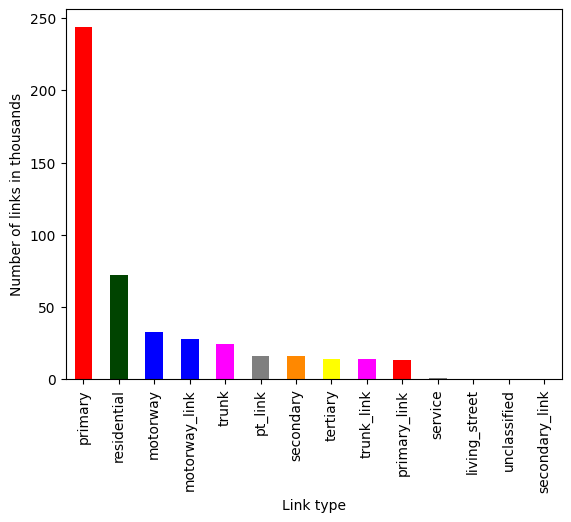

In [ ]:
#newdf
bar_colors = ['#FF0000', '#004400', '#0000FF', '#0000FF', '#FF00FF', 'tab:grey', '#FF8800', '#FFFF00', '#FF00FF', '#FF0000', 'tab:grey', '#00AAFF', '#000000', '#FF8800']
fig = newdf.plot.bar(x = 'type', y = 'n_links_of_type_in_1000', color = bar_colors)
plt.ylabel("Number of links in thousands")
plt.xlabel('Link type')
plt.legend().remove()
# fig.set_size_inches(11.69/2,4.5)
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/Lausitz_network_number_of_links_by_road_type.pdf', format = "pdf",bbox_inches='tight')


## 8. Travel Time Distribution

In [ ]:
cols = plotly.colors.DEFAULT_PLOTLY_COLORS

### Iteration 0 

In [ ]:
aTtCat0 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/trav_time_categories_1_100_it0.csv")

aTtCat0['category'] = aTtCat0['category'].str.replace(">2h", "t_trav > 2hrs")

x = np.arange(len(aTtCat0['category'].unique()))
width =0.9/ 6

fig, axs = plt.subplots(1, 2, sharey = True)

axs[0].bar(x-3*width, (aTtCat0[(aTtCat0["sample_size"]=="1-pct")]["mean"]*100) / 1000, width,label = "1-pct" )
axs[0].bar(x-2*width, (aTtCat0[(aTtCat0["sample_size"]=="5-pct")]["mean"]*20) / 1000, width, label = "5-pct")
axs[0].bar(x-width, (aTtCat0[(aTtCat0["sample_size"]=="10-pct")]["mean"]*10) / 1000, width, label = "10-pct")
axs[0].bar(x , (aTtCat0[(aTtCat0["sample_size"]=="25-pct")]["mean"]*4) / 1000, width, label = "25-pct")
axs[0].bar(x + width, (aTtCat0[(aTtCat0["sample_size"]=="50-pct")]["mean"]*2) / 1000, width, label = "50-pct")
axs[0].bar(x + 2*width, (aTtCat0[(aTtCat0["sample_size"]=="100-pct")]["mean"]) / 1000, width, label = "100-pct")
axs[0].set_xticks(x, aTtCat0['category'].unique(),  rotation=90)
axs[0].set_title('case 1: alpha = 1, default sT')


axs[1].bar(x-3* width, (aTtCat0[(aTtCat0["sample_size"]=="10-pct")]["mean"]*10) / 1000, width, color = "#2ca02c")
axs[1].bar(x-2 * width, (aTtCat0[(aTtCat0["sample_size"]=="25-pct")]["mean"]*4) / 1000, width, color = "#d62728")
axs[1].bar(x- width, (aTtCat0[(aTtCat0["sample_size"]=="25-pct-doubled")]["mean"]*2) / 1000, width, color = "#bcbd22", label = "25-pct-doubled")
axs[1].bar(x , (aTtCat0[(aTtCat0["sample_size"]=="25-pct-quadrupled")]["mean"]) / 1000, width, color = "#17becf",  label= "25-pct quadrupled")
axs[1].bar(x + width , (aTtCat0[(aTtCat0["sample_size"]=="50-pct")]["mean"]*2) / 1000, width, color = "#9467bd")
axs[1].bar(x + 2*width , (aTtCat0[(aTtCat0["sample_size"]=="100-pct")]["mean"]) / 1000, width, color = "#8c564b")
axs[1].set_xticks(x, aTtCat0['category'].unique(),  rotation=90)
axs[1].set_title('case 1 (10 to 100 pct) vs. case 6')



fig.set_size_inches(11.69,4.5)


plt.figlegend(loc='lower right',  ncol=8, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.99, 1.0))
plt.tight_layout(w_pad=3)
plt.yticks(np.arange(0, 475, step=50))
plt.ylabel("frequency in thousands")
plt.xlabel("travel time category")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/freg_trav_time_categories_cases_1_6_it0.pdf', format = "pdf",bbox_inches='tight')

In [ ]:
tTc_c14 = pd.read_csv('/home/lola/Nextcloud/Masterarbeit/03_Outputs/trav_time_categories_1pct_cases_1_4_it0.csv')

#### Plot

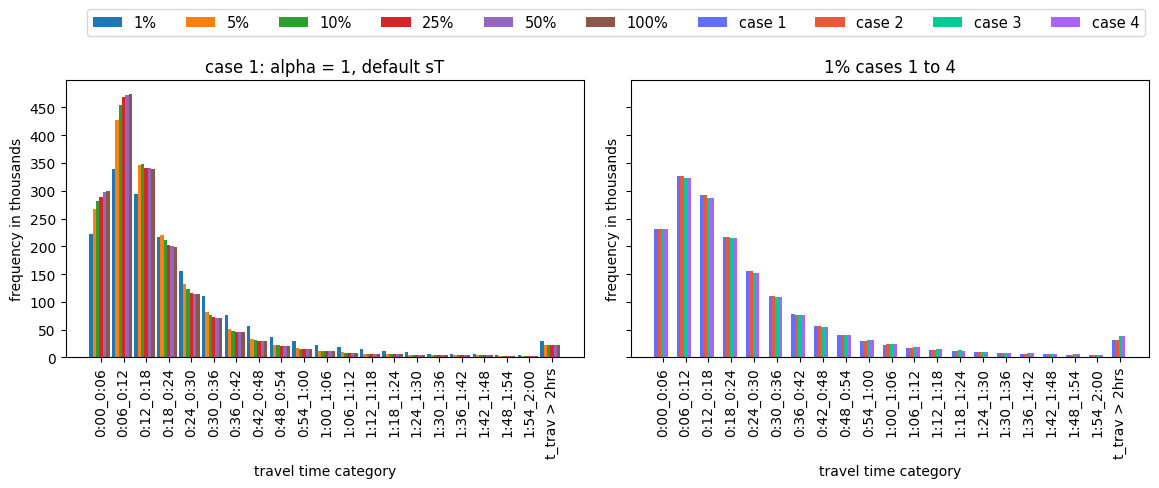

In [ ]:
x = np.arange(len(aTtCat0['category'].unique()))
width =0.9/ 6

fig, axs = plt.subplots(1, 2, sharey = True)

axs[0].bar(x-3*width, (aTtCat0[(aTtCat0["sample_size"]=="1-pct")]["mean"]*100) / 1000, width,label = "1%" )
axs[0].bar(x-2*width, (aTtCat0[(aTtCat0["sample_size"]=="5-pct")]["mean"]*20) / 1000, width, label = "5%")
axs[0].bar(x-width, (aTtCat0[(aTtCat0["sample_size"]=="10-pct")]["mean"]*10) / 1000, width, label = "10%")
axs[0].bar(x , (aTtCat0[(aTtCat0["sample_size"]=="25-pct")]["mean"]*4) / 1000, width, label = "25%")
axs[0].bar(x + width, (aTtCat0[(aTtCat0["sample_size"]=="50-pct")]["mean"]*2) / 1000, width, label = "50%")
axs[0].bar(x + 2*width, (aTtCat0[(aTtCat0["sample_size"]=="100-pct")]["mean"]) / 1000, width, label = "100%")
axs[0].set_xticks(x, aTtCat0['category'].unique(),  rotation=90)
axs[0].set_title('case 1: alpha = 1, default sT')
axs[0].set_ylabel('frequency in thousands')
axs[0].set_xlabel('travel time category')

axs[1].bar(x-2*width, (tTc_c14[(tTc_c14["sample_size"]=="1-pct") & (tTc_c14["alpha"]==1.0) & (tTc_c14["stuck_time"]==30.0)]["mean"]*100) / 1000, width, color = "#636EFA", label = "case 1" )
axs[1].bar(x-width, (tTc_c14[(tTc_c14["sample_size"]=="1-pct") & (tTc_c14["alpha"]==0.75) & (tTc_c14["stuck_time"]==30.0)]["mean"]*100) / 1000, width, color = "#EF553B",  label = "case 2")
axs[1].bar(x, (tTc_c14[(tTc_c14["sample_size"]=="1-pct") & (tTc_c14["alpha"]==1.0) & (tTc_c14["stuck_time"]==3000.0)]["mean"]*100) / 1000, width, color = "#00CC96", label = "case 3")
axs[1].bar(x + width , (tTc_c14[(tTc_c14["sample_size"]=="1-pct") & (tTc_c14["alpha"]==0.75) & (tTc_c14["stuck_time"]==3000.0)]["mean"]*100) / 1000, width, color = "#AB63FA",  label = "case 4")

axs[1].set_xticks(x, aTtCat0['category'].unique(),  rotation=90)
axs[1].set_title('1% cases 1 to 4')



fig.set_size_inches(11.69,4.5)


plt.figlegend(loc='lower right',  ncol=10, labelspacing=0.1, fontsize=10.5, bbox_to_anchor=(0.99, 1.0))
plt.tight_layout(w_pad=3)
plt.yticks(np.arange(0, 475, step=50))
plt.ylabel("frequency in thousands")
plt.xlabel("travel time category")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/freg_trav_time_categories_it0.pdf', format = "pdf",bbox_inches='tight')

aTtCat0 = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/trav_time_categories_1_100_it0.csv")

sizes = [ "10-pct", "25-pct", "50-pct", "25-pct-doubled", "100-pct", "25-pct-quadrupled"]
df = pd.DataFrame(np.c_[ 
               (aTtCat0[(aTtCat0["sample_size"]=="10-pct")]["mean"]*10) / 1000,
               (aTtCat0[(aTtCat0["sample_size"]=="25-pct")]["mean"]*4) / 1000 ,
               (aTtCat0[(aTtCat0["sample_size"]=="50-pct")]["mean"]*2) / 1000,
               (aTtCat0[(aTtCat0["sample_size"]=="100-pct")]["mean"]) / 1000] 
                , index=aTtCat0["category"].unique()
               )
fig = df.plot.bar(width = 0.9)
plt.xlabel("category")
plt.ylabel("frequency [in thousands]")
plt.yticks(np.arange(0, 475, step=50))
plt.legend(sizes)
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/trav_times_distribution_25_pct_doubled_and_quad_vs_10_100pct_it0.pdf', format = "pdf",bbox_inches='tight')

### Iteration 500

In [ ]:
aTtCat = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/trav_time_categories_1_100.csv")
aTtCat['sixMinCategories'] = aTtCat['category'].str.replace(">2h", "t_trav > 2hrs")

x = np.arange(len(aTtCat['sixMinCategories'].dropna().unique()))
width =0.9/ 6

fig, axs = plt.subplots(1, 2, sharey = True)

axs[0].bar(x-3*width, (aTtCat[(aTtCat["sample_size"]=="1-pct") & (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*100) / 1000, width,label = "1-pct" )
axs[0].bar(x-2*width, (aTtCat[(aTtCat["sample_size"]=="5-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*20) / 1000, width, label = "5-pct")
axs[0].bar(x-width, (aTtCat[(aTtCat["sample_size"]=="10-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*10) / 1000, width, label = "10-pct")
axs[0].bar(x , (aTtCat[(aTtCat["sample_size"]=="25-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*4) / 1000, width, label = "25-pct")
axs[0].bar(x + width, (aTtCat[(aTtCat["sample_size"]=="50-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*2) / 1000, width, label = "50-pct")
axs[0].bar(x + 2*width, (aTtCat[(aTtCat["sample_size"]=="100-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]) / 1000, width, label = "100-pct")
axs[0].set_xticks(x, aTtCat['sixMinCategories'].dropna().unique(),  rotation=90)
axs[0].set_title('case 1: alpha = 1, default sT')
axs[0].set_ylabel('frequency in thousands')
axs[0].set_xlabel('travel time category')



axs[1].bar(x-3* width, (aTtCat[(aTtCat["sample_size"]=="10-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*10) / 1000, width, color = "#2ca02c")
axs[1].bar(x-2 * width, (aTtCat[(aTtCat["sample_size"]=="25-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*4) / 1000, width, color = "#d62728")
axs[1].bar(x- width, (aTtCat[(aTtCat["sample_size"]=="25-pct-doubled")]["mean"]*2) / 1000, width, color = "#bcbd22", label = "25-pct-doubled")
axs[1].bar(x , (aTtCat[(aTtCat["sample_size"]=="25-pct-quadrupled")]["mean"]) / 1000, width, color = "#17becf",  label= "25-pct quadrupled")
axs[1].bar(x + width , (aTtCat[(aTtCat["sample_size"]=="50-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*2) / 1000, width, color = "#9467bd")
axs[1].bar(x + 2*width , (aTtCat[(aTtCat["sample_size"]=="100-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]) / 1000, width, color = "#8c564b")
axs[1].set_xticks(x, aTtCat['sixMinCategories'].dropna().unique(),  rotation=90)
axs[1].set_title('case 1 (10 to 100 pct) vs. case 6')



fig.set_size_inches(11.69,4.5)


plt.figlegend(loc='lower right',  ncol=8, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.99, 1.0))
plt.tight_layout(w_pad=3)
plt.yticks(np.arange(0, 475, step=50))
plt.ylabel("frequency in thousands")
plt.xlabel("travel time category")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/freg_trav_time_categories_cases_1_6_it500.pdf', format = "pdf",bbox_inches='tight')


sizes = ["1-pct", "5-pct", "10-pct", "25-pct", "50-pct", "100-pct"]
df = pd.DataFrame(np.c_[(aTtCat[(aTtCat["sample_size"]=="1-pct")]["mean"]*100) / 1000,
               (aTtCat[(aTtCat["sample_size"]=="5-pct")]["mean"]*20) / 1000, 
               (aTtCat[(aTtCat["sample_size"]=="10-pct")]["mean"]*10) / 1000,
               (aTtCat[(aTtCat["sample_size"]=="25-pct")]["mean"]*4) / 1000 ,
               (aTtCat[(aTtCat["sample_size"]=="50-pct")]["mean"]*2) / 1000, 
               (aTtCat[(aTtCat["sample_size"]=="100-pct")]["mean"]) / 1000  ] 
                , index=aTtCat["category"].unique()
               )
fig = df.plot.bar(width = 0.9)
plt.xlabel("category")
plt.ylabel("frequency [in thousands]")
plt.yticks(np.arange(0, 500, step=50))
plt.legend(sizes)
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/trav_times_distribution_categories_averages_for_1_to_5pct_iteration500.pdf', format = "pdf",bbox_inches='tight')

aTtCat = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/trav_time_categories_1_100.csv")

sizes = [ "10-pct", "25-pct", "50-pct", "25-pct-doubled", "100-pct", "25-pct-quadrupled"]
df = pd.DataFrame(np.c_[ 
               (aTtCat[(aTtCat["sample_size"]=="10-pct")]["mean"]*10) / 1000,
               (aTtCat[(aTtCat["sample_size"]=="25-pct")]["mean"]*4) / 1000 ,
               (aTtCat[(aTtCat["sample_size"]=="50-pct")]["mean"]*2) / 1000,
               (aTtCat[(aTtCat["sample_size"]=="25-pct-doubled")]["mean"]*2) / 1000,
               (aTtCat[(aTtCat["sample_size"]=="100-pct")]["mean"]) / 1000,
               (aTtCat[(aTtCat["sample_size"]=="25-pct-quadrupled")]["mean"]) / 1000
                   ] 
                , index=aTtCat0["category"].unique()
               )
fig = df.plot.bar(width = 0.9)
plt.xlabel("category")
plt.ylabel("frequency [in thousands]")
plt.yticks(np.arange(0, 475, step=50))
plt.legend(sizes)
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/trav_times_distribution_25_pct_doubled_and_quad_vs_10_100pct_it500.pdf', format = "pdf",bbox_inches='tight')

#### Plot

In [ ]:
tTd_1pct_it500 = pd.read_csv('/home/lola/Nextcloud/Masterarbeit/03_Outputs/trav_time_categories_1pct_cases_1_4.csv')
tTd_1pct_it500['sixMinCategories'] = tTd_1pct_it500['sixMinCategories'].str.replace(">2h", "t_trav > 2hrs")

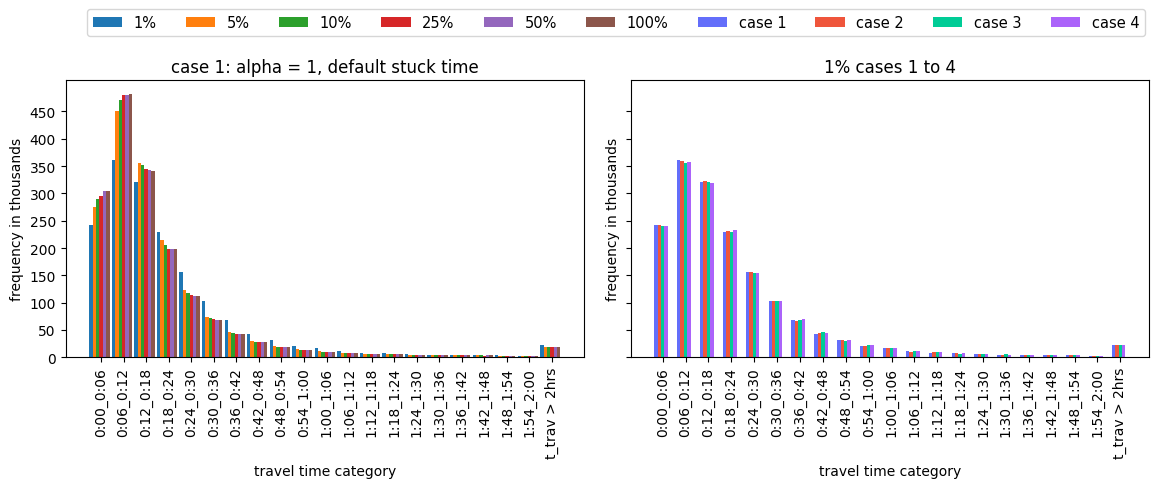

In [ ]:
x = np.arange(len(aTtCat['sixMinCategories'].dropna().unique()))
width =0.9/ 6

fig, axs = plt.subplots(1, 2, sharey = True)

axs[0].bar(x-3*width, (aTtCat[(aTtCat["sample_size"]=="1-pct") & (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*100) / 1000, width,label = "1%" )
axs[0].bar(x-2*width, (aTtCat[(aTtCat["sample_size"]=="5-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*20) / 1000, width, label = "5%")
axs[0].bar(x-width, (aTtCat[(aTtCat["sample_size"]=="10-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*10) / 1000, width, label = "10%")
axs[0].bar(x , (aTtCat[(aTtCat["sample_size"]=="25-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*4) / 1000, width, label = "25%")
axs[0].bar(x + width, (aTtCat[(aTtCat["sample_size"]=="50-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]*2) / 1000, width, label = "50%")
axs[0].bar(x + 2*width, (aTtCat[(aTtCat["sample_size"]=="100-pct")& (aTtCat["alpha"]==1) & (aTtCat["stuck_time"]==30.0)]["mean"]) / 1000, width, label = "100%")
axs[0].set_xticks(x, aTtCat['sixMinCategories'].dropna().unique(),  rotation=90)
axs[0].set_title('case 1: alpha = 1, default stuck time')
axs[0].set_ylabel('frequency in thousands')
axs[0].set_xlabel('travel time category')


axs[1].bar(x-2*width, (tTd_1pct_it500[(tTd_1pct_it500["sample_size"]=="1-pct") & (tTd_1pct_it500["alpha"]==1.0) & (tTd_1pct_it500["stuck_time"]==30.0)]["mean"]*100) / 1000, width, color = "#636EFA", label = "case 1" )
axs[1].bar(x-width, (tTd_1pct_it500[(tTd_1pct_it500["sample_size"]=="1-pct") & (tTd_1pct_it500["alpha"]==0.75) & (tTd_1pct_it500["stuck_time"]==30.0)]["mean"]*100) / 1000, width, color = "#EF553B",  label = "case 2")
axs[1].bar(x, (tTd_1pct_it500[(tTd_1pct_it500["sample_size"]=="1-pct") & (tTd_1pct_it500["alpha"]==1.0) & (tTd_1pct_it500["stuck_time"]==3000.0)]["mean"]*100) / 1000, width, color = "#00CC96", label = "case 3")
axs[1].bar(x + width , (tTd_1pct_it500[(tTd_1pct_it500["sample_size"]=="1-pct") & (tTd_1pct_it500["alpha"]==0.75) & (tTd_1pct_it500["stuck_time"]==3000.0)]["mean"]*100) / 1000, width, color = "#AB63FA",  label = "case 4")

axs[1].set_xticks(x, tTd_1pct_it500['sixMinCategories'].dropna().unique(),  rotation=90)
axs[1].set_title('1% cases 1 to 4')




fig.set_size_inches(11.69,4.5)


plt.figlegend(loc='lower right',  ncol=10, labelspacing=0.1, fontsize=10.5, bbox_to_anchor=(0.99, 1.0))
plt.tight_layout(w_pad=3)
plt.yticks(np.arange(0, 475, step=50))
plt.ylabel("frequency in thousands")
plt.xlabel("travel time category")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/freg_trav_time_categories_it500.pdf', format = "pdf",bbox_inches='tight')

## 10. Number of Departures per Hour

In [ ]:
all_dep = pd.read_csv('/home/lola/Nextcloud/Masterarbeit/03_Outputs/aggregated_departures_1_to_100_pct_samples_already_scaled.csv')


In [ ]:
allDep_1pct = all_dep[(all_dep["sample_size"]=="1-pct") & (all_dep['alpha'] == 1.0) & (all_dep['stuck_time'] == 30.0)].sort_values(by='hour')['avg_dep_scaled']/ 1000
allDep_5pct = all_dep[(all_dep["sample_size"]=="5-pct") & (all_dep['alpha'] == 1.0) & (all_dep['stuck_time'] == 30.0)].sort_values(by='hour')['avg_dep_scaled']/ 1000
allDep_10pct = all_dep[(all_dep["sample_size"]=="10-pct") & (all_dep['alpha'] == 1.0) & (all_dep['stuck_time'] == 30.0)].sort_values(by='hour')['avg_dep_scaled']/ 1000
allDep_25pct = all_dep[(all_dep["sample_size"]=="25-pct") & (all_dep['alpha'] == 1.0) & (all_dep['stuck_time'] == 30.0)].sort_values(by='hour')['avg_dep_scaled']/ 1000
allDep_50pct = all_dep[(all_dep["sample_size"]=="50-pct") & (all_dep['alpha'] == 1.0) & (all_dep['stuck_time'] == 30.0)].sort_values(by='hour')['avg_dep_scaled']/ 1000
allDep_100pct = all_dep[(all_dep["sample_size"]=="100-pct") & (all_dep['alpha'] == 1.0) & (all_dep['stuck_time'] == 30.0)].sort_values(by='hour')['avg_dep_scaled']/ 1000

hours = all_dep.sort_values(by= 'hour')['hour'].unique()


### Plot

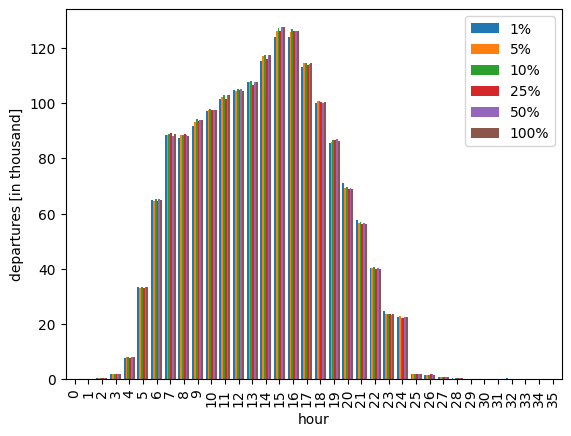

In [ ]:
sizes = ["1%", "5%", "10%", "25%", "50%", "100%"]
df = pd.DataFrame(np.c_[allDep_1pct, allDep_5pct, allDep_10pct, allDep_25pct, allDep_50pct, allDep_100pct  ] 
                , index= hours)
fig = df.plot.bar(width = 0.8)
plt.xlabel("hour")
plt.ylabel("departures [in thousand]")
#fig.set_size_inches(11.69/2,4.5)
plt.legend(sizes)
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/number_of_departures_case1_it500.pdf', format = "pdf",bbox_inches='tight')

## 9. Average speed per road type and hour

In [ ]:
avg_speed_1pct = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/Avg_Speed_per_RoadTypeAndHour_1pct.csv")
avg_speed_5pct = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/Avg_Speed_per_RoadTypeAndHour_5pct.csv")
avg_speed_10pct = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/Avg_Speed_per_RoadTypeAndHour_10pct.csv")
avg_speed_25pct = pd.read_csv("/home/lola/Nextcloud/Masterarbeit/03_Outputs/Avg_Speed_per_RoadTypeAndHour_25pct.csv")
avg_speed_50pct = pd.read_csv('/home/lola/Nextcloud/Masterarbeit/03_Outputs/Avg_Speed_per_RoadTypeAndHour_50pct_from_df_routes.csv')
avg_speed_100pct = pd.read_csv('/home/lola/Nextcloud/Masterarbeit/03_Outputs/Avg_Speed_per_RoadTypeAndHour_100pct_from_df_routes.csv')

In [ ]:
avg_speed = pd.concat([avg_speed_1pct, avg_speed_5pct, avg_speed_10pct, avg_speed_25pct ], axis = 0, ignore_index= True)

In [ ]:
sample_sizes = ['1', '5', '10', '25']

avSp_case1_it500 = []
avSp_case2_it500 = []
avSp_case3_it500 = []
avSp_case4_it500 = []
hour_storage = []
sampleSize_storage = []
roadType_storage = []

for roadType in avg_speed['type'].unique():
    for sampleSize in sample_sizes:
            sT_default = 30.0
            # calculate adjsuted stuck time
            size_in_pct = float(sampleSize)/100.0
            size_inverted = 1/ size_in_pct
            sT_adjusted = 30.0*size_inverted
            # declare sampleSize + "-pct"
            sample_size_string = sampleSize + "-pct"
            
            for hour in range(0, 36, 1):
                sampleSize_storage.append(sample_size_string)
                hour_storage.append(hour)
                roadType_storage.append(roadType)

                temp_case1 = []
                temp_case3 = []
                temp_case2 = []
                temp_case4 = []
                for sampleNr in range(1,11,1):
                    if(sampleSize == '100' and sampleNr > 1):
                         continue
                    alpha = 1.0
                    val_case1 = avg_speed[(avg_speed["sample_size"]==sample_size_string) & (avg_speed["alpha"]==alpha)& (avg_speed["stuck_time"]==sT_default) & 
                                                            (avg_speed["global_seed"]=="default")& (avg_speed["hour"]==hour)  & (avg_speed['type']==roadType) & 
                                                            (avg_speed["sample_nr"]==sampleNr) ]["avg_speed"]
                    if (len(val_case1) > 0):
                        temp_case1.append(val_case1)
                        
                    val_case3 = avg_speed[(avg_speed["sample_size"]==sample_size_string) & (avg_speed["alpha"]==alpha) & (avg_speed["stuck_time"]==sT_adjusted) &
                                                        (avg_speed["global_seed"]=="default") & (avg_speed["hour"]==hour)  & (avg_speed['type']==roadType) &
                                                        (avg_speed["sample_nr"]==sampleNr)]["avg_speed"]
                    if ((len(val_case3) > 0)):
                        temp_case3.append(val_case3)
                    
                    alpha = 0.75
                    val_case2 = avg_speed[(avg_speed["sample_size"]==sample_size_string) & (avg_speed["alpha"]==alpha)& (avg_speed["stuck_time"]==sT_default) & 
                                        (avg_speed["global_seed"]=="default")& (avg_speed["hour"]==hour)  & (avg_speed['type']==roadType) & 
                                        (avg_speed["sample_nr"]==sampleNr) ]["avg_speed"]
                    if (len(val_case2) > 0):
                         temp_case2.append(val_case2)
                            
                    val_case4 = avg_speed[(avg_speed["sample_size"]==sample_size_string) & (avg_speed["alpha"]==alpha) & (avg_speed["stuck_time"]==sT_adjusted) &
                                                            (avg_speed["global_seed"]=="default") & (avg_speed["hour"]==hour)  & (avg_speed['type']==roadType) &
                                                            (avg_speed["sample_nr"]==sampleNr)]["avg_speed"]
                    if ((len(val_case4) > 0)):
                            temp_case4.append(val_case4)
                # only append values if the length of the vector is larger than 0, otherwhise append average speed of road type
                if (len(temp_case1) > 0):      
                    avSp_case1_it500.append(np.mean(np.array(temp_case1))*3.6)
                elif((len(temp_case1) == 0)):
                      if (roadType == "highway.tertiary"):
                           avSp_case1_it500.append(41.3)
                      elif (roadType == "highway.secondary"):
                           avSp_case1_it500.append(45.5)
                      elif (roadType == "highway.residential"):
                           avSp_case1_it500.append(34.56)

                if(len(temp_case2) > 0):
                    avSp_case2_it500.append(np.mean(np.array(temp_case2))*3.6)
                elif((len(temp_case2) == 0)):
                      if (roadType == "highway.tertiary"):
                           # .append(41.3)
                           avSp_case2_it500.append(0)
                      elif (roadType == "highway.secondary"):
                           # .append(45.5)
                           avSp_case2_it500.append(0)
                      elif (roadType == "highway.residential"):
                           # .append(34.56)
                           avSp_case2_it500.append(0)

                if(len(temp_case3) > 0):
                    avSp_case3_it500.append(np.mean(np.array(temp_case3))*3.6)
                elif((len(temp_case3) == 0)):
                      if (roadType == "highway.tertiary"):
                           # append(41.3)
                           avSp_case3_it500.append(0)
                      elif (roadType == "highway.secondary"):
                           # .append(45.5)
                           avSp_case3_it500.append(0)
                      elif (roadType == "highway.residential"):
                           # append(34.56)
                           avSp_case3_it500.append(0)
                
                if(len(temp_case4) > 0):
                    avSp_case4_it500.append(np.mean(np.array(temp_case4))*3.6)
                elif((len(temp_case4) == 0)):
                      if (roadType == "highway.tertiary"):
                           #append(41.3)
                           avSp_case4_it500.append(0)
                      elif (roadType == "highway.secondary"):
                           # .append(45.5)
                           avSp_case4_it500.append(0)
                      elif (roadType == "highway.residential"):
                           # .append(34.56)
                           avSp_case4_it500.append(0) 
            

In [ ]:
df_avgSpeed = pd.DataFrame({'sample_size': sampleSize_storage, 'hour': hour_storage, 'road_type': roadType_storage, 'case1': avSp_case1_it500,
                            'case2': avSp_case2_it500, 'case_3': avSp_case3_it500, 'case_4': avSp_case4_it500 })

In [ ]:
hour = np.arange(0,36, 1)

### highway secondary

#### all sizes of one case

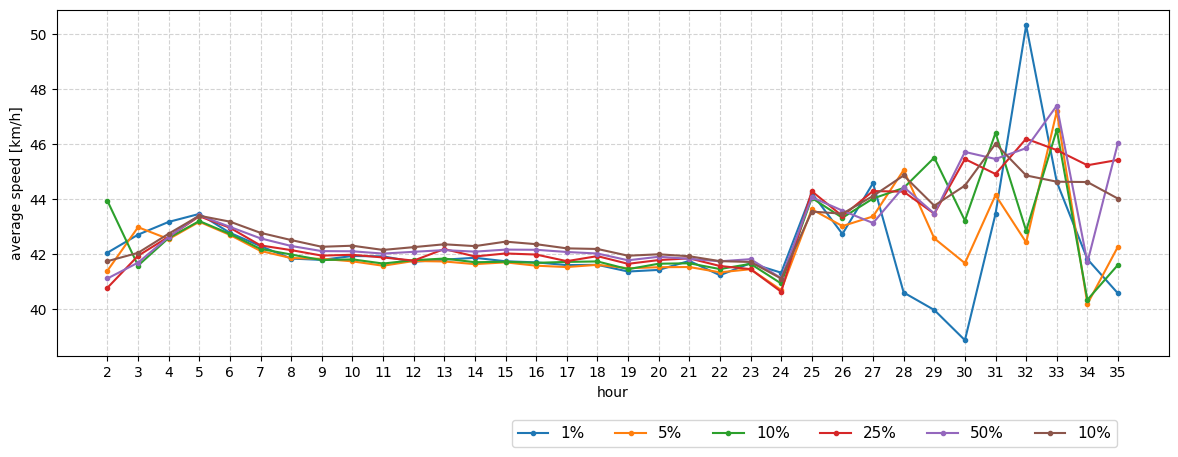

In [ ]:

fig, axs = plt.subplots()
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'][2:36], '.-', label = "1%" )
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'][2:36], '.-',  label = "5%")
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "10-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'][2:36], '.-', label = "10%")
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "25-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'][2:36], '.-',  label = "25%")
axs.plot(hour[2:36],3.6*avg_speed_50pct[avg_speed_50pct['type'] == "highway.secondary"]['avg_speed'][2:36], '.-',  label = "50%")
axs.plot(hour[2:36],3.6*avg_speed_100pct[avg_speed_100pct['type'] == "highway.secondary"]['avg_speed'][2:36], '.-',  label = "10%")

fig.set_size_inches(11.69,4)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=6, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average speed [km/h]")
plt.xlabel("hour")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_secondary_1_100pct_case1_per_hour_pyplot.pdf', format = "pdf",bbox_inches='tight')


fig_avgSpeed_it500_sec_1_100 = go.Figure()
fig_avgSpeed_it500_sec_1_100.add_trace(go.Scatter(x=hour
                                  , y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'],
                    mode='lines+markers',
                    name='1-pct, alpha = 1, default sT', 
                    )
                    )
fig_avgSpeed_it500_sec_1_100.add_trace(go.Scatter(x=hour,
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'],
                    mode='lines+markers',
                    name='5-pct, alpha = 1.0, default sT'))

fig_avgSpeed_it500_sec_1_100.add_trace(go.Scatter(x=hour,
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "10-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'],
                    mode='lines+markers',
                    name='10-pct, alpha = 1.0, default sT'))
fig_avgSpeed_it500_sec_1_100.add_trace(go.Scatter(x=hour,
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "25-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'],
                    mode='lines+markers',
                    name='25-pct, alpha = 1.0, default sT'))

fig_avgSpeed_it500_sec_1_100.add_trace(go.Scatter(x=hour,
                                        y=avg_speed_50pct[avg_speed_50pct['type'] == "highway.secondary"]['avg_speed']*3.6,
                    mode='lines+markers',
                    name='50-pct, alpha = 1.0, default sT'))

fig_avgSpeed_it500_sec_1_100.add_trace(go.Scatter(x=hour,
                                        y=avg_speed_100pct[avg_speed_100pct['type'] == "highway.secondary"]['avg_speed']*3.6,
                    mode='lines+markers',
                    name='100-pct, alpha = 1.0, default sT'))

fig_avgSpeed_it500_sec_1_100.update_layout(
    xaxis=dict(
        autorange= True,
        range = [0,35],
        dtick = 2.0,
        title=dict(text='hour'),
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=5.0,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average speed in km/h')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig_avgSpeed_it500_sec_1_100.show()

plotly.io.write_image(fig_avgSpeed_it500_sec_1_100, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_secondary_1_100pct_case1_per_hour.pdf", width= 1248.0 ,  engine = "kaleido")

#### same size different case

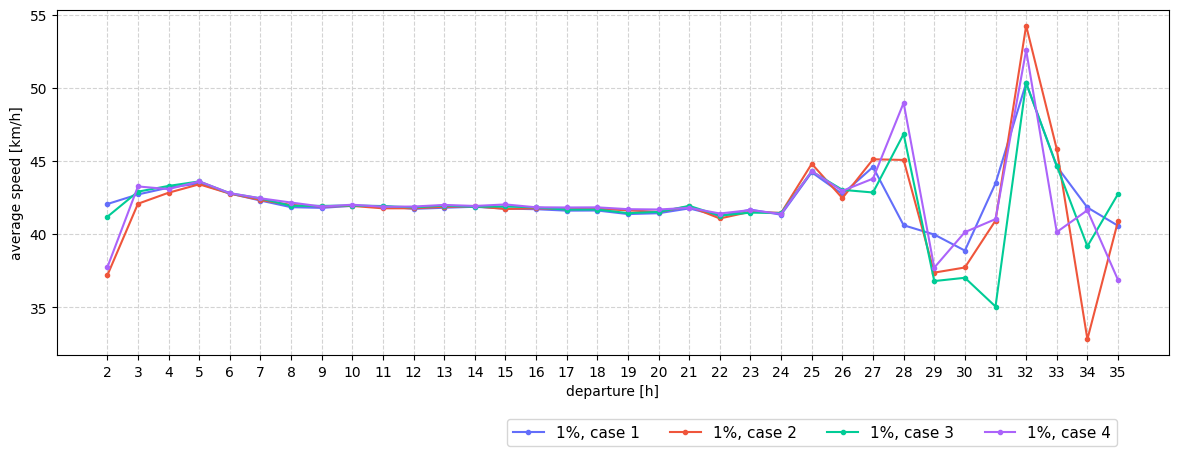

In [ ]:
fig, axs = plt.subplots()
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'][2:36], '.-', color = "#636EFA", label = "1%, case 1" )
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case2'][2:36], '.-', color ="#EF553B" ,  label = "1%, case 2")
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case_3'][2:36], '.-',color = "#00CC96",  label = "1%, case 3")
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case_4'][2:36], '.-', color = "#AB63FA", label = "1%, case 4")


fig.set_size_inches(11.69,4)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=6, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average speed [km/h]")
plt.xlabel("departure [h]")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_secondary_1_100pct_case_1_4_per_hour_pyplot.pdf', format = "pdf",bbox_inches='tight')

fig_avgSpeed_it500_sec_1pct_c1_4 = go.Figure()
fig_avgSpeed_it500_sec_1pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1]
                                  , y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 1, default sT', 
                    )
                    )
fig_avgSpeed_it500_sec_1pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1],
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case2'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 0.75, default sT'))

fig_avgSpeed_it500_sec_1pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1],
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case_3'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 1.0 , sT adjusted'))

fig_avgSpeed_it500_sec_1pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1],
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case_4'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 1.0 , sT adjusted'))
fig_avgSpeed_it500_sec_1pct_c1_4.update_layout(
    xaxis=dict(
        autorange= True,
        range = [0,35],
        dtick = 2.0,
        title=dict(text='hour'),
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=5.0,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average speed in km/h')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig_avgSpeed_it500_sec_1pct_c1_4.show()

plotly.io.write_image(fig_avgSpeed_it500_res_1_25, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_residential_1_25pct_case1_per_hour.pdf", width= 1248.0 ,  engine = "kaleido")

# Plot runtimes 
fig_avgSpeed_it500_sec_1pct_c1_4 = go.Figure()
fig_avgSpeed_it500_sec_1pct_c1_4.add_trace(go.Scatter(x=hour
                                  , y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'],
                    mode='lines+markers',
                    name='5-pct, alpha = 1, default sT', 
                    )
                    )
fig_avgSpeed_it500_sec_1pct_c1_4.add_trace(go.Scatter(x=hour,
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case2'],
                    mode='lines+markers',
                    name='5-pct, alpha = 0.75, default sT'))

fig_avgSpeed_it500_sec_1pct_c1_4.add_trace(go.Scatter(x=hour,
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case_3'],
                    mode='lines+markers',
                    name='5-pct, alpha = 1.0 , sT adjusted'))

fig_avgSpeed_it500_sec_1pct_c1_4.add_trace(go.Scatter(x=hour,
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case_4'],
                    mode='lines+markers',
                    name='5-pct, alpha = 1.0 , sT adjusted'))


fig_avgSpeed_it500_sec_1pct_c1_4.update_layout(
    xaxis=dict(
        autorange= True,
        range = [0,35],
        dtick = 2.0,
        title=dict(text='hour'),
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=5.0,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average speed in km/h')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig_avgSpeed_it500_sec_1pct_c1_4.show()

plotly.io.write_image(fig_avgSpeed_it500_res_1_25, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_residential_1_25pct_case1_per_hour.pdf", width= 1248.0 ,  engine = "kaleido")

fig_avgSpeed_it500_sec_10pct_c1_4 = go.Figure()
fig_avgSpeed_it500_sec_10pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1]
                                  , y=df_avgSpeed[(df_avgSpeed['sample_size'] == "10-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'][1:],
                    mode='lines+markers',
                    name='10-pct, alpha = 1, default sT', 
                    )
                    )
fig_avgSpeed_it500_sec_10pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1],
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "10-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case2'][1:],
                    mode='lines+markers',
                    name='10-pct, alpha = 0.75, default sT'))

fig_avgSpeed_it500_sec_10pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1],
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "10-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case_3'][1:],
                    mode='lines+markers',
                    name='10-pct, alpha = 1.0 , sT adjusted'))

fig_avgSpeed_it500_sec_10pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1],
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "10-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case_4'][1:],
                    mode='lines+markers',
                    name='10-pct, alpha = 1.0 , sT adjusted'))


fig_avgSpeed_it500_sec_10pct_c1_4.update_layout(
    xaxis=dict(
        autorange= True,
        range = [0,35],
        dtick = 2.0,
        title=dict(text='hour'),
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=5.0,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average speed in km/h')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig_avgSpeed_it500_sec_10pct_c1_4.show()

plotly.io.write_image(fig_avgSpeed_it500_res_1_25, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_residential_1_25pct_case1_per_hour.pdf", width= 1248.0 ,  engine = "kaleido")

fig_avgSpeed_it500_sec_25pct_c1_4 = go.Figure()
fig_avgSpeed_it500_sec_25pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1]
                                  , y=df_avgSpeed[(df_avgSpeed['sample_size'] == "25-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case1'][1:],
                    mode='lines+markers',
                    name='25-pct, alpha = 1, default sT', 
                    #fill = dict(color = "#3366CC")
                    )
                    )
fig_avgSpeed_it500_sec_25pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1],
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "25-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case2'][1:],
                    mode='lines+markers',
                    name='25-pct, alpha = 0.75, default sT'))

fig_avgSpeed_it500_sec_25pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1],
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "25-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case_3'][1:],
                    mode='lines+markers',
                    name='25-pct, alpha = 1.0 , sT adjusted'))

fig_avgSpeed_it500_sec_25pct_c1_4.add_trace(go.Scatter(x=hour[1:len(hour)-1],
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "25-pct") & (df_avgSpeed['road_type'] == "highway.secondary")]['case_4'][1:],
                    mode='lines+markers',
                    name='25-pct, alpha = 1.0 , sT adjusted'))
fig_avgSpeed_it500_sec_25pct_c1_4.update_layout(
    xaxis=dict(
        autorange= True,
        range = [0,35],
        dtick = 2.0,
        title=dict(text='hour'),
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=5.0,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average speed in km/h')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig_avgSpeed_it500_sec_25pct_c1_4.show()

### highway residential

### all sizes one case

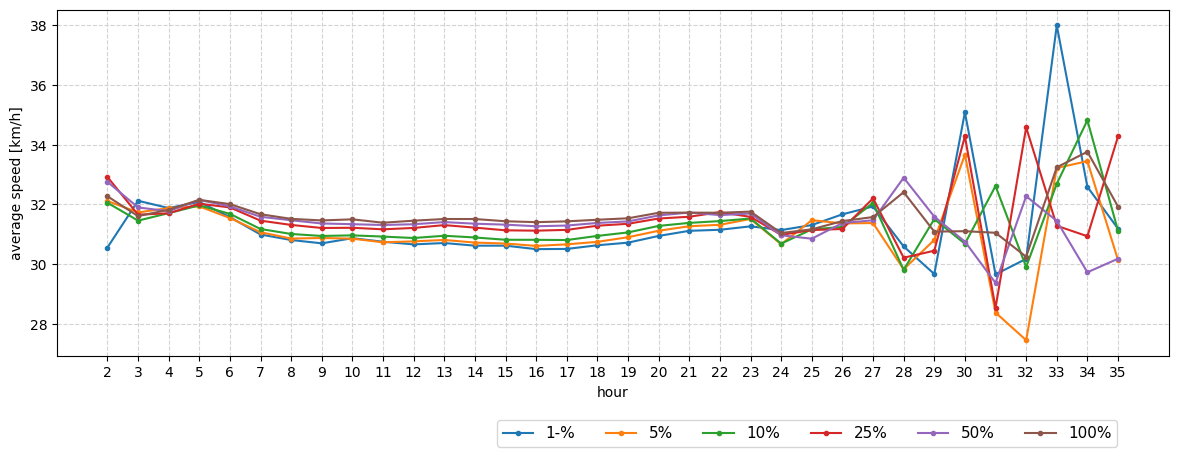

In [ ]:

fig, axs = plt.subplots()
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case1'][2:36], '.-', label = "1-%" )
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case1'][2:36], '.-',  label = "5%")
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "10-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case1'][2:36], '.-', label = "10%")
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "25-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case1'][2:36], '.-',  label = "25%")
axs.plot(hour[2:36],3.6*avg_speed_50pct[avg_speed_50pct['type'] == "highway.residential"]['avg_speed'][2:36], '.-',  label = "50%")
axs.plot(hour[2:36],3.6*avg_speed_100pct[avg_speed_100pct['type'] == "highway.residential"]['avg_speed'][2:36], '.-',  label = "100%")

fig.set_size_inches(11.69,4)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=6, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average speed [km/h]")
plt.xlabel("hour")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_residential_1_100pct_case1_per_hour_pyplot.pdf', format = "pdf",bbox_inches='tight')

fig_avgSpeed_it500_res_1_100 = go.Figure()
fig_avgSpeed_it500_res_1_100.add_trace(go.Scatter(x=hour
                                  , y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case1'],
                    mode='lines+markers',
                    name='1-pct, alpha = 1, default sT', 
                    #fill = dict(color = "#3366CC")
                    )
                    )
fig_avgSpeed_it500_res_1_100.add_trace(go.Scatter(x=hour,
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case1'],
                    mode='lines+markers',
                    name='5-pct, alpha = 1.0, default sT'))

fig_avgSpeed_it500_res_1_100.add_trace(go.Scatter(x=hour,
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "10-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case1'],
                    mode='lines+markers',
                    name='10-pct, alpha = 1.0, default sT'))
fig_avgSpeed_it500_res_1_100.add_trace(go.Scatter(x=hour,
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "25-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case1'],
                    mode='lines+markers',
                    name='25-pct, alpha = 1.0, default sT'))
fig_avgSpeed_it500_res_1_100.add_trace(go.Scatter(x=hour,
                                        y=avg_speed_50pct[avg_speed_50pct['type'] == "highway.residential"]['avg_speed']*3.6,
                    mode='lines+markers',
                    name='50-pct, alpha = 1.0, default sT'))

fig_avgSpeed_it500_res_1_100.add_trace(go.Scatter(x=hour,
                                        y=avg_speed_100pct[avg_speed_100pct['type'] == "highway.residential"]['avg_speed']*3.6,
                    mode='lines+markers',
                    name='100-pct, alpha = 1.0, default sT'))

fig_avgSpeed_it500_res_1_100.update_layout(
    xaxis=dict(
        autorange= True,
        range = [0,35],
        dtick = 2.0,
        title=dict(text='hour'),
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=5.0,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average speed in km/h')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig_avgSpeed_it500_res_1_100.show()

plotly.io.write_image(fig_avgSpeed_it500_res_1_100, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_residential_1_100pct_case1_per_hour.pdf", width= 1248.0 ,  engine = "kaleido")

### same size different case

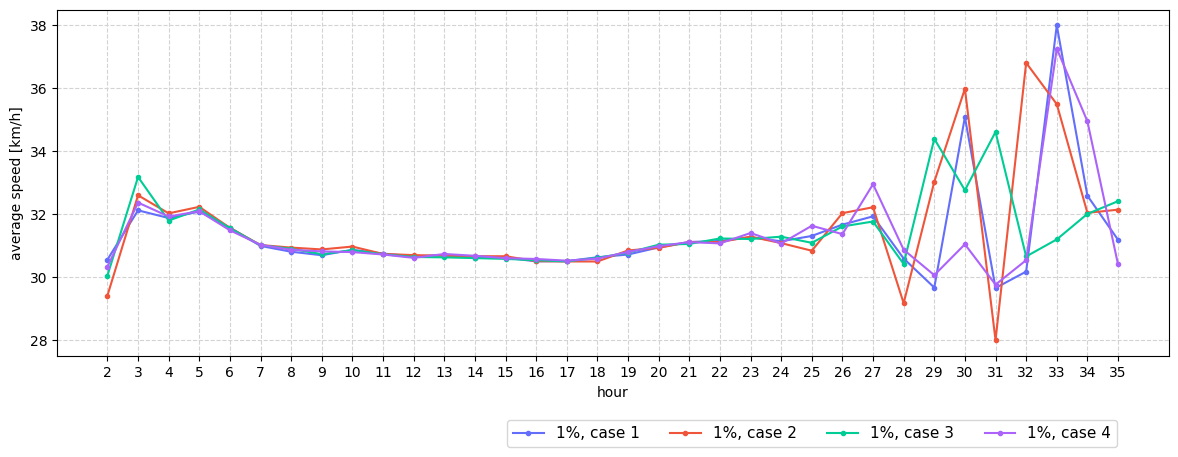

In [ ]:
fig, axs = plt.subplots()
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case1'][2:36], '.-', color = "#636EFA", label = "1%, case 1" )
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case2'][2:36], '.-', color ="#EF553B" ,  label = "1%, case 2")
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case_3'][2:36], '.-',color = "#00CC96",  label = "1%, case 3")
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case_4'][2:36], '.-', color = "#AB63FA", label = "1%, case 4")


fig.set_size_inches(11.69,4)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=6, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average speed [km/h]")
plt.xlabel("hour")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_residential_1_100pct_case_1_4_per_hour_pyplot.pdf', format = "pdf",bbox_inches='tight')

fig_avgSpeed_it500_res_1pct_case_1_4 = go.Figure()
fig_avgSpeed_it500_res_1pct_case_1_4.add_trace(go.Scatter(x=hour[1:]
                                  , y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case1'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 1, default sT', 
                    #fill = dict(color = "#3366CC")
                    )
                    )
fig_avgSpeed_it500_res_1pct_case_1_4.add_trace(go.Scatter(x=hour[1:],
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case2'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 0.75, default sT'))

fig_avgSpeed_it500_res_1pct_case_1_4.add_trace(go.Scatter(x=hour[1:],
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case_3'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 1.0, sT adjusted'))

fig_avgSpeed_it500_res_1pct_case_1_4.add_trace(go.Scatter(x=hour[1:],
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.residential")]['case_4'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 0.75, sT adjusted'))
fig_avgSpeed_it500_res_1pct_case_1_4.update_layout(
    xaxis=dict(
        autorange= True,
        range = [0,35],
        dtick = 2.0,
        title=dict(text='hour'),
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=5.0,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average speed in km/h')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig_avgSpeed_it500_res_1pct_case_1_4.show()

plotly.io.write_image(fig_avgSpeed_it500_res_1pct_case_1_4, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_residential_1_25pct_case1_per_hour.pdf", width= 1248.0 ,  engine = "kaleido")

### highway tertiary

### different sizes same case

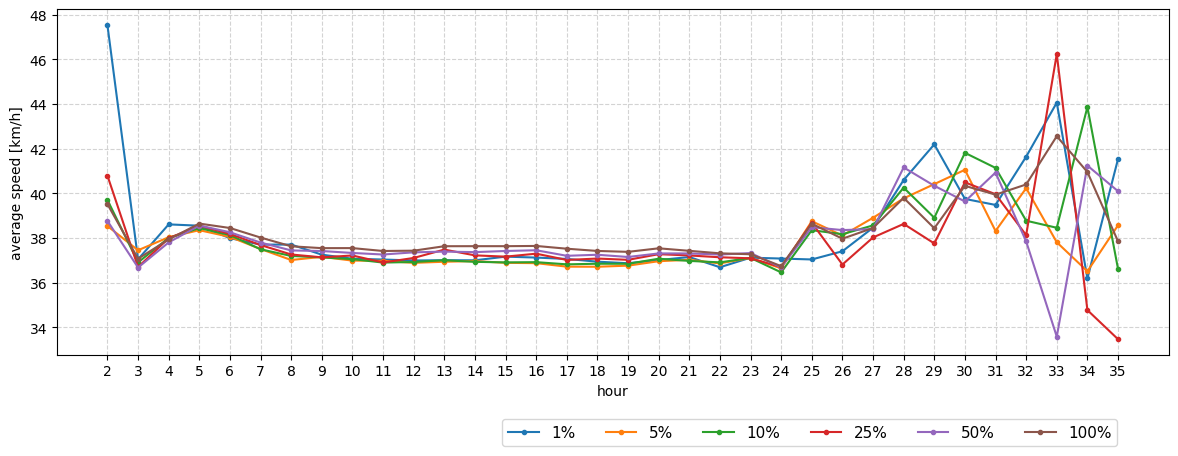

In [ ]:

fig, axs = plt.subplots()
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case1'][2:36], '.-', label = "1%" )
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case1'][2:36], '.-',  label = "5%")
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "10-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case1'][2:36], '.-', label = "10%")
axs.plot(hour[2:36], df_avgSpeed[(df_avgSpeed['sample_size'] == "25-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case1'][2:36], '.-',  label = "25%")
axs.plot(hour[2:36],3.6*avg_speed_50pct[avg_speed_50pct['type'] == "highway.tertiary"]['avg_speed'][2:36], '.-',  label = "50%")
axs.plot(hour[2:36],3.6*avg_speed_100pct[avg_speed_100pct['type'] == "highway.tertiary"]['avg_speed'][2:36], '.-',  label = "100%")

fig.set_size_inches(11.69,4)
axs.xaxis.grid(color='lightgray', linestyle='dashed')
axs.yaxis.grid(color='lightgray', linestyle='dashed')

plt.figlegend(loc='lower right',  ncol=6, labelspacing=0.2, fontsize=11, bbox_to_anchor=(0.95, -0.15))
plt.tight_layout(w_pad=3)
#plt.yticks(np.arange(0, 475, step=50))
plt.xticks(x, x)
plt.ylabel("average speed [km/h]")
plt.xlabel("hour")
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_tertiary_1_100pct_case1_per_hour_pyplot.pdf', format = "pdf",bbox_inches='tight')

fig_avgSpeed_it500_ter_1_100_pct_c1 = go.Figure()
fig_avgSpeed_it500_ter_1_100_pct_c1.add_trace(go.Scatter(x=hour
                                  , y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case1'],
                    mode='lines+markers',
                    name='1-pct, alpha = 1, default sT', 
                    #fill = dict(color = "#3366CC")
                    )
                    )
fig_avgSpeed_it500_ter_1_100_pct_c1.add_trace(go.Scatter(x=hour,
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case1'],
                    mode='lines+markers',
                    name='5-pct, alpha = 1.0, default sT'))

fig_avgSpeed_it500_ter_1_100_pct_c1.add_trace(go.Scatter(x=hour,
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "10-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case1'],
                    mode='lines+markers',
                    name='10-pct, alpha = 1.0, default sT'))

fig_avgSpeed_it500_ter_1_100_pct_c1.add_trace(go.Scatter(x=hour,
                                        y=avg_speed_25pct[(avg_speed_25pct['type'] == "highway.tertiary")]['avg_speed']*3.6,
                    mode='lines+markers',
                    name='25-pct, alpha = 1.0, default sT'))
fig_avgSpeed_it500_ter_1_100_pct_c1.add_trace(go.Scatter(x=hour,
                                        y=avg_speed_50pct[avg_speed_50pct['type'] == "highway.tertiary"]['avg_speed']*3.6,
                    mode='lines+markers',
                    name='50-pct, alpha = 1.0, default sT'))

fig_avgSpeed_it500_ter_1_100_pct_c1.add_trace(go.Scatter(x=hour,
                                        y=avg_speed_100pct[avg_speed_100pct['type'] == "highway.tertiary"]['avg_speed']*3.6,
                    mode='lines+markers',
                    name='100-pct, alpha = 1.0, default sT'))
fig_avgSpeed_it500_ter_1_100_pct_c1.update_layout(
    xaxis=dict(
        autorange= True,
        range = [0,35],
        dtick = 2.0,
        title=dict(text='hour'),
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=5.0,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average speed in km/h')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig_avgSpeed_it500_ter_1_100_pct_c1.show()

plotly.io.write_image(fig_avgSpeed_it500_ter_1_100_pct_c1, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_tertiary_1_100pct_case1_per_hour.pdf", width= 1248.0 ,  engine = "kaleido")

### same size, cases 1-4

fig_avgSpeed_it500_ter_1pct_c14 = go.Figure()
fig_avgSpeed_it500_ter_1pct_c14.add_trace(go.Scatter(x=hour[1:]
                                  , y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case1'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 1, default sT', 
                    #fill = dict(color = "#3366CC")
                    )
                    )
fig_avgSpeed_it500_ter_1pct_c14.add_trace(go.Scatter(x=hour[1:],
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case2'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 0.75, default sT'))

fig_avgSpeed_it500_ter_1pct_c14.add_trace(go.Scatter(x=hour[1:],
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case_3'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 1.0 , sT adjusted'))

fig_avgSpeed_it500_ter_1pct_c14.add_trace(go.Scatter(x=hour[1:],
                                        y=df_avgSpeed[(df_avgSpeed['sample_size'] == "1-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case_4'][1:],
                    mode='lines+markers',
                    name='1-pct, alpha = 1.0 , sT adjusted'))
fig_avgSpeed_it500_ter_1pct_c14.update_layout(
    xaxis=dict(
        autorange= True,
        range = [0,35],
        dtick = 2.0,
        title=dict(text='hour'),
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=5.0,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title=dict(text='average speed in km/h')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig_avgSpeed_it500_ter_1pct_c14.show()

plotly.io.write_image(fig_avgSpeed_it500_ter_1pct_c14, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highway_tertiary_1_1pct_case1_4_per_hour.pdf", width= 1248.0 ,  engine = "kaleido")

fig_avgSpeed_it500_ter_5pct_c_14 = go.Figure()
fig_avgSpeed_it500_ter_5pct_c_14.add_trace(go.Scatter(x=hour
                                  , y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case1'],
                    mode='lines+markers',
                    name='5-pct, alpha = 1, default sT', 
                    )
                    )
fig_avgSpeed_it500_ter_5pct_c_14.add_trace(go.Scatter(x=hour,
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case2'],
                    mode='lines+markers',
                    name='5-pct, alpha = 0.75, default sT'))

fig_avgSpeed_it500_ter_5pct_c_14.add_trace(go.Scatter(x=hour,
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case_3'],
                    mode='lines+markers',
                    name='5-pct, alpha = 1.0, sT adjusted'))

fig_avgSpeed_it500_ter_5pct_c_14.add_trace(go.Scatter(x=hour,
                                         y=df_avgSpeed[(df_avgSpeed['sample_size'] == "5-pct") & (df_avgSpeed['road_type'] == "highway.tertiary")]['case_4'],
                    mode='lines+markers',
                    name='1-pct, alpha = 0.75, sT adjusted'))
fig_avgSpeed_it500_ter_5pct_c_14.update_layout(
    xaxis=dict(
        autorange= True,
        range = [0,35],
        dtick = 2.0,
        title=dict(text='hour'),
        ),
    yaxis=dict(
        autorange= True,
        showgrid= True,
        dtick=2.0,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        title=dict(text='average speed in km/h')),
    font = dict(size = 18),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
)
fig_avgSpeed_it500_ter_5pct_c_14.show()

plotly.io.write_image(fig_avgSpeed_it500_ter_5pct_c_14, "/home/lola/Nextcloud/Masterarbeit/04a_Images/avgSpeed_highwayTertiary_per_hour_5pct_c14.pdf", width= 1248.0 ,  engine = "kaleido")

## Method: Trip share by main mode type of original 100%

In [ ]:
pathToFile = "/home/lola/Downloads/lausitz-v2024.2-100pct-base-case.output_trips.csv.gz"
trips_100pct = temp = pd.read_csv(pathToFile, compression= "gzip", sep=";")

/tmp/ipykernel_8610/1129945999.py:2: DtypeWarning: Columns (0,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  trips_100pct = temp = pd.read_csv(pathToFile, compression= "gzip", sep=";")


In [ ]:
all_trips = trips_100pct.shape[0]
all_trips

3836232

In [ ]:
mode_share = []
mode_storage = []
for mode_type in trips_100pct['main_mode'].unique():
    mode_storage.append(mode_type)
    mode_share.append(trips_100pct[trips_100pct['main_mode'] == mode_type].shape[0] / all_trips)

In [ ]:
df_mode_shares_100pct = pd.DataFrame({'mode': mode_storage, 'mode_share': mode_share})

In [ ]:
df_mode_shares_100pct['mode_share'] = df_mode_shares_100pct['mode_share']*100

In [ ]:
df_mode_shares_100pct = df_mode_shares_100pct.round(2)

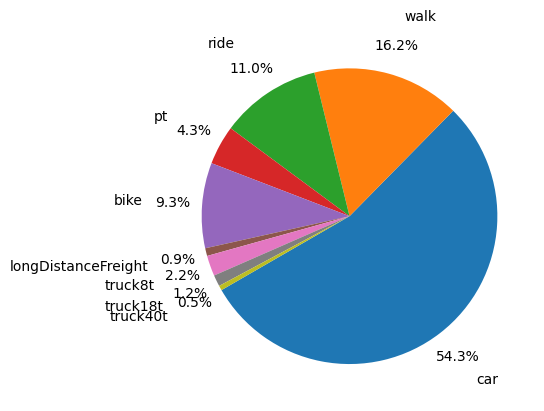

In [ ]:
fig, ax = plt.subplots()
ax.pie(df_mode_shares_100pct['mode_share'], labels=df_mode_shares_100pct['mode'], autopct='%1.1f%%', pctdistance= 1.2, labeldistance=1.4,  startangle= 210)
plt.savefig('/home/lola/Nextcloud/Masterarbeit/04a_Images/mode_share_original_100pct.pdf', format = "pdf",bbox_inches='tight')